In [1]:
import numpy as np
import scaper
import os
import pandas as pd
import seaborn as sns

In [5]:
#General Specification
'''
#original
snr_dist = 'uniform'
snr_min = 6
snr_max = 30

pitch_dist = 'uniform'
pitch_min = -3.0
pitch_max = 3.0

time_stretch_dist = 'uniform'
time_stretch_min = 0.8
time_stretch_max = 1.2


speech_snr_dist = 'uniform'
speech_snr_min = 12
speech_snr_max = 9

nonspeech_snr_dist = 'uniform'
nonspeech_snr_min = 9
nonspeech_snr_max = 6
'''
pitch_dist = 'const'
pitch_val = 0.0

time_stretch_dist = 'const'
time_stretch_val = 1.0

# =============Train================

# Train-Bimodal

In [3]:

# SCAPER SETTINGS
np.random.seed(123)
fg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/foreground/'
bg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/background/'

n_soundscapes = n_train
ref_db = -40
duration = 10.0 

min_events = 1
max_events = 9

event_time_dist = 'truncnorm'
event_time_mean1 = 3.0
event_time_mean2 = 7.0
event_time_std = 2.0
event_time_min = 0.0
event_time_max = 10.0

source_time_dist = 'const'
source_time = 0.0

event_duration_dist = 'uniform'
event_duration_min = 0.5
event_duration_max = 4.0

snr_dist = 'uniform'
snr_min = 0
snr_max = 30


# FILE SETTINGS
outfolder = os.path.join(os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/generated/bimodal')
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

    # Generate 2000 soundscapes using a BIMODAL distribution of start times

for n in range(n_soundscapes):
    
    print('Generating soundscape: {:d}/{:d}'.format(n+1, n_soundscapes))
    
    # create a scaper
    sc = scaper.Scaper(duration, fg_folder, bg_folder)
    sc.protected_labels = []
    sc.ref_db = ref_db
    
    # add background
    sc.add_background(label=('const', 'noise'), 
                      source_file=('choose', []), 
                      source_time=('const', 0))
    
    # add random foreground events
    n_events = np.random.randint(min_events, max_events+1)
    for _ in range(n_events):
        
        coin = np.random.randint(0, 2)
        if coin==0:
            mu = event_time_mean1
        else:
            mu = event_time_mean2
            
        sc.add_event(#label=('choose', ['air_conditioner','car_horn','dog_bark','drilling','engine_idling','jackhammer','siren','gun_shot','street_music']), 
                     label=('choose',[]),
                     source_file=('choose', []), 
                     source_time=(source_time_dist, source_time), 
                     event_time=(event_time_dist, mu, event_time_std, event_time_min, event_time_max), 
                     event_duration=(event_duration_dist, event_duration_min, event_duration_max), 
                     snr=(snr_dist, snr_min, snr_max),  
                     pitch_shift=(pitch_dist, pitch_val),                     
                     time_stretch=(time_stretch_dist, time_stretch_val))  
                     #snr=(snr_dist, snr_min, snr_max),
                     #pitch_shift=(pitch_dist, pitch_min, pitch_max),
                     #time_stretch=(time_stretch_dist, time_stretch_min, time_stretch_max)) 
    
    # generate
    audiofile = os.path.join(outfolder, "soundscape_train_bimodal{:d}.wav".format(n))
    jamsfile = os.path.join(outfolder, "soundscape_train_bimodal{:d}.jams".format(n))
    txtfile = os.path.join(outfolder, "soundscape_train_bimodal{:d}.txt".format(n))
    
    sc.generate(audiofile, jamsfile,
                allow_repeated_label=True,
                allow_repeated_source=False,
                reverb=0.1,
                disable_sox_warnings=True,
                no_audio=False,
                txt_path=txtfile)

Generating soundscape: 1/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 2/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.43) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.74) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)


Generating soundscape: 3/2000
Generating soundscape: 4/2000
Generating soundscape: 5/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.93) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 6/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.99) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 7/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.20) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 8/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.74) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 9/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.55) is too great given stretched event duration (2.46) and soundscape duration (10.00), changed to 7.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.92) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 10/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.92) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 11/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.19) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.14) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.81) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.73) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.93) is 

Generating soundscape: 12/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.62) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 13/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.61) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.32) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 14/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.15) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)


Generating soundscape: 15/2000
Generating soundscape: 16/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.89) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)


Generating soundscape: 17/2000
Generating soundscape: 18/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.34) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.88) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 19/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.68) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.62) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 20/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.42) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.21) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.06) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 21/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.85) is greater that source duration (3.59), changing to 3.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 22/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.85) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)


Generating soundscape: 23/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 24/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.94) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.34) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.23) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.60) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3

Generating soundscape: 25/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 26/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.82) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.97) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 27/2000
Generating soundscape: 28/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.66) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.43) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.37) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 29/2000
Generating soundscape: 30/2000
Generating soundscape: 31/2000
Generating soundscape: 32/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.86) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.79) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)


Generating soundscape: 33/2000
Generating soundscape: 34/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.85) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.84) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.50) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.23) is too great given stretched event duration (0.80) and soundscape duration (10.00), changed to 9.20.
  ScaperWarning)


Generating soundscape: 35/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.90) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.34) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)


Generating soundscape: 36/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.10) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.56) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.45) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 37/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.15) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)


Generating soundscape: 38/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 39/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.88) is greater that source duration (3.20), changing to 3.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.93) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 40/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 41/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.79) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.11) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 42/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.40) is greater that source duration (3.01), changing to 3.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.03) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.49) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 43/2000
Generating soundscape: 44/2000
Generating soundscape: 45/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.21) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.61) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 46/2000
Generating soundscape: 47/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 48/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.83) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)


Generating soundscape: 49/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.82) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.70) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.60) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.89) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 50/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.84) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.11) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 51/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 52/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.16) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.36) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 53/2000
Generating soundscape: 54/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.10) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)


Generating soundscape: 55/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.68) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.05) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.49) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)


Generating soundscape: 56/2000
Generating soundscape: 57/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.44) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.17) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 58/2000
Generating soundscape: 59/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.83) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.10) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.47) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 60/2000
Generating soundscape: 61/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.74) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 62/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.04) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)


Generating soundscape: 63/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.87) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.37) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.31) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)


Generating soundscape: 64/2000
Generating soundscape: 65/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.88) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.85) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.61) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 66/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.60) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 67/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.16) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)


Generating soundscape: 68/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.00) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.61) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 69/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.36) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.61) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 70/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.80) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.83) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 71/2000
Generating soundscape: 72/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.19) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.29) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.90) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 73/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.72) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)


Generating soundscape: 74/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.25) is too great given stretched event duration (1.03) and soundscape duration (10.00), changed to 8.97.
  ScaperWarning)


Generating soundscape: 75/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 76/2000
Generating soundscape: 77/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.35) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)


Generating soundscape: 78/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.30) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 79/2000
Generating soundscape: 80/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.39) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.79) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 81/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.44) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)


Generating soundscape: 82/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.54) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.03) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 83/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.87) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (3.38) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)


Generating soundscape: 84/2000
Generating soundscape: 85/2000
Generating soundscape: 86/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.79) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.83) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 87/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.81) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.66) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.44) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.61) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 88/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.87) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 89/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.84) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 90/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.37) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.06) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 91/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.75) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.98) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.34) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 92/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.55) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 93/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.33) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)


Generating soundscape: 94/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 95/2000
Generating soundscape: 96/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.92) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 97/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.55) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.54) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.98) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)


Generating soundscape: 98/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.25) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 99/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.47) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.99) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.62) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 100/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.05) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 101/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.44) is greater that source duration (2.78), changing to 2.78
  ScaperWarning)


Generating soundscape: 102/2000
Generating soundscape: 103/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.52) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (4.00) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 104/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.23) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 105/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.88) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 106/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.74) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.45) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 107/2000
Generating soundscape: 108/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.42) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.05) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 109/2000
Generating soundscape: 110/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.02) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.01) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.10) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.96) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.p

Generating soundscape: 111/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.51) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.46) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 112/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.66) is greater that source duration (3.22), changing to 3.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.77) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 113/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.16) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.97) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.00) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 114/2000
Generating soundscape: 115/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.74) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.46) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 116/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 117/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.55) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 118/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.82) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 119/2000
Generating soundscape: 120/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.66) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.99) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)


Generating soundscape: 121/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.78) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.79) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.31) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.10) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)


Generating soundscape: 122/2000
Generating soundscape: 123/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.49) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 124/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (3.74), changing to 3.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.63) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 125/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 126/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 127/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.60) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 128/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.74) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)


Generating soundscape: 129/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.79) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)


Generating soundscape: 130/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.24) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.38) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.30) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 131/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 132/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.78) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.96) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 133/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.88) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 134/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (3.19), changing to 3.19
  ScaperWarning)


Generating soundscape: 135/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.96) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 136/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.32) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 137/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.19) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.11) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 138/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.87) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.73) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 139/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.48) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.96) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.91) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.73) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)


Generating soundscape: 140/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.89) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 141/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.22) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.29) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.23) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 142/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.86) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)


Generating soundscape: 143/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.68) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.78) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)


Generating soundscape: 144/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.08) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 145/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.66) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)


Generating soundscape: 146/2000
Generating soundscape: 147/2000
Generating soundscape: 148/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.33) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 149/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.62) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.88) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 150/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.84) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)


Generating soundscape: 151/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.97) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.24) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 152/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.85) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)


Generating soundscape: 153/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.37) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.75) is too great given stretched event duration (0.68) and soundscape duration (10.00), changed to 9.32.
  ScaperWarning)


Generating soundscape: 154/2000
Generating soundscape: 155/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.77) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 156/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.73) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.53) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 157/2000
Generating soundscape: 158/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.60) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.77) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 159/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.30) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 160/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.38) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.17) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)


Generating soundscape: 161/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.21) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.93) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)


Generating soundscape: 162/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.10) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.65) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.99) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)


Generating soundscape: 163/2000
Generating soundscape: 164/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.01) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.40) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.08) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 165/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.32) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 166/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.43) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.58) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.51) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 167/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.70) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.91) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 168/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (2.78), changing to 2.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.73) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.68) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 169/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.33) is too great given stretched event duration (0.72) and soundscape duration (10.00), changed to 9.28.
  ScaperWarning)


Generating soundscape: 170/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.97) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.61) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 171/2000
Generating soundscape: 172/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.75) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 173/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.10) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 174/2000
Generating soundscape: 175/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.92) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 176/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.81) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.56) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.14) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.60) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 177/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.19) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 178/2000
Generating soundscape: 179/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.26) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.36) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.74) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)


Generating soundscape: 180/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.50) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)


Generating soundscape: 181/2000
Generating soundscape: 182/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.93) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 183/2000
Generating soundscape: 184/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.07) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.42) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 185/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.10) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 186/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.23) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.45) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.99) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.81) is greater that source duration (2.29), changing to 2.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.64) is greater that source duration (1.04), cha

Generating soundscape: 187/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 188/2000
Generating soundscape: 189/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.61) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.07) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)


Generating soundscape: 190/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.96) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.74) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 191/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.76) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)


Generating soundscape: 192/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (1.88), changing to 1.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.72) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.88) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 193/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.45) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.63) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.74) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 194/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.92) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 195/2000
Generating soundscape: 196/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.48) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.82) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 197/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.98) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 198/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.88) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.52) is greater that source duration (1.65), changing to 1.65
  ScaperWarning)


Generating soundscape: 199/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.76) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.92) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 200/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.47) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 201/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.70) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 202/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.13) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 203/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.00) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.05) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 204/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.13) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 205/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.86) is too great given stretched event duration (1.62) and soundscape duration (10.00), changed to 8.38.
  ScaperWarning)


Generating soundscape: 206/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.49) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.08) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.83) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.46) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)


Generating soundscape: 207/2000
Generating soundscape: 208/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)


Generating soundscape: 209/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 210/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.12) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.69) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.10) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 211/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.21) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.62) is too great given stretched event duration (0.68) and soundscape duration (10.00), changed to 9.32.
  ScaperWarning)


Generating soundscape: 212/2000
Generating soundscape: 213/2000
Generating soundscape: 214/2000
Generating soundscape: 215/2000
Generating soundscape: 216/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.77) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.49) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 217/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.82) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.52) is too great given stretched event duration (0.55) and soundscape duration (10.00), changed to 9.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.35) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)


Generating soundscape: 218/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.57) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.85) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.65) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.65) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 219/2000
Generating soundscape: 220/2000
Generating soundscape: 221/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.60) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.61) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)


Generating soundscape: 222/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.64) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.24) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.72) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 223/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.92) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 224/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.84) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 225/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.83) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 226/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.26) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.52) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 227/2000
Generating soundscape: 228/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.36) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.70) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.52) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 229/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.34) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.49) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 230/2000
Generating soundscape: 231/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.72) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.89) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 232/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 233/2000
Generating soundscape: 234/2000
Generating soundscape: 235/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.94) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 236/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.49) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 237/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.40) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.06) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 238/2000
Generating soundscape: 239/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 240/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.04) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)


Generating soundscape: 241/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.39) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 242/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.65) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 243/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.10) is greater that source duration (2.99), changing to 2.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.48) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 244/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.78) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.48) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 245/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.92) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.37) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 246/2000
Generating soundscape: 247/2000
Generating soundscape: 248/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.36) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)


Generating soundscape: 249/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.45) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)


Generating soundscape: 250/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)


Generating soundscape: 251/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.31) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 252/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.91) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 253/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.08) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.62) is greater that source duration (3.18), changing to 3.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (6.98) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.62) is greater that source duration (1.75), c

Generating soundscape: 254/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.70) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 255/2000
Generating soundscape: 256/2000
Generating soundscape: 257/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.75) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 258/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.99) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.44) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.95) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 259/2000
Generating soundscape: 260/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.71) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.77) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 261/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.91) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.27) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.65) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.49) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 262/2000
Generating soundscape: 263/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.88) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 264/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 265/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.80) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 266/2000
Generating soundscape: 267/2000
Generating soundscape: 268/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.78) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 269/2000
Generating soundscape: 270/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.00) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)


Generating soundscape: 271/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.42) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 272/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.86) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)


Generating soundscape: 273/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.29) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)


Generating soundscape: 274/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.69) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.17) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.45) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.

Generating soundscape: 275/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.42) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.87) is too great given stretched event duration (0.65) and soundscape duration (10.00), changed to 9.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 276/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.49) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 277/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.92) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 278/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 279/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.42) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.95) is greater that source duration (3.62), changing to 3.62
  ScaperWarning)


Generating soundscape: 280/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.60) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.32) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)


Generating soundscape: 281/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.07) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 282/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.13) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.59) is too great given stretched event duration (1.48) and soundscape duration (10.00), changed to 8.52.
  ScaperWarning)


Generating soundscape: 283/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.66) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 284/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.48) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.73) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 285/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.90) is too great given stretched event duration (0.56) and soundscape duration (10.00), changed to 9.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.79) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.26) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3

Generating soundscape: 286/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.73) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)


Generating soundscape: 287/2000
Generating soundscape: 288/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.28) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 289/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.00) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.23) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.97) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)


Generating soundscape: 290/2000
Generating soundscape: 291/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.08) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 292/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)


Generating soundscape: 293/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.78) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.22) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 294/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.71) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 295/2000
Generating soundscape: 296/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.21) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 297/2000
Generating soundscape: 298/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.99) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 299/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.39) is greater that source duration (3.15), changing to 3.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.70) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.42) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 300/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.72) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.46) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 301/2000
Generating soundscape: 302/2000
Generating soundscape: 303/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.43) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.13) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 304/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 305/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.60) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.33) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)


Generating soundscape: 306/2000
Generating soundscape: 307/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.41) is greater that source duration (1.47), changing to 1.47
  ScaperWarning)


Generating soundscape: 308/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.53) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 309/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.76) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.17) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 310/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.88) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (3.50), changing to 3.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.70) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 311/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.33) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.03) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)


Generating soundscape: 312/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.02) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 313/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.89) is greater that source duration (3.89), changing to 3.89
  ScaperWarning)


Generating soundscape: 314/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 315/2000
Generating soundscape: 316/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 317/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.28) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 318/2000
Generating soundscape: 319/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.60) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.01) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)


Generating soundscape: 320/2000
Generating soundscape: 321/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.31) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.78) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 322/2000
Generating soundscape: 323/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.69) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)


Generating soundscape: 324/2000
Generating soundscape: 325/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (4.00) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 326/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.84) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.60) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 327/2000
Generating soundscape: 328/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.14) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.32) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)


Generating soundscape: 329/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.61) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 330/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.69) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.99) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 331/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.42) is greater that source duration (3.01), changing to 3.01
  ScaperWarning)


Generating soundscape: 332/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.88) is greater that source duration (3.00), changing to 3.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.54) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 333/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.25) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.46) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.76) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 334/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.28) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.54) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 335/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.71) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.29) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 336/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.30) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.72) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 337/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)


Generating soundscape: 338/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.45) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 339/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.73) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 340/2000
Generating soundscape: 341/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.52) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.81) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.89) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 342/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.25) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 343/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.43) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.07) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 344/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.41) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.52) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 345/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.49) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.46) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 346/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.39) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.51) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 347/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.30) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 348/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.15) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.86) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 349/2000
Generating soundscape: 350/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.62) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.62) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.97) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 351/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.84) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 352/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.68) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 353/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.67) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)


Generating soundscape: 354/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.49) is greater that source duration (2.82), changing to 2.82
  ScaperWarning)


Generating soundscape: 355/2000
Generating soundscape: 356/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 357/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.25) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.73) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.08) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.03) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.61) is too great given stretched event durati

Generating soundscape: 358/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.01) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)


Generating soundscape: 359/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.92) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 360/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 361/2000
Generating soundscape: 362/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.56) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.88) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 363/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.12) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 364/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.07) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.52) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.91) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.75) is t

Generating soundscape: 365/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.40) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.46) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 366/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.36) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 367/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.15) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.12) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)


Generating soundscape: 368/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.75) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.05) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 369/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.10) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.72) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.62) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.51) i

Generating soundscape: 370/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (4.00) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 371/2000
Generating soundscape: 372/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.59) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 373/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.47) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.98) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.69) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.94) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (0.82

Generating soundscape: 374/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.40) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.29) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 375/2000
Generating soundscape: 376/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.18) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 377/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.73) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 378/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.26) is too great given stretched event duration (0.74) and soundscape duration (10.00), changed to 9.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.10) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 379/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.15) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)


Generating soundscape: 380/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.33) is greater that source duration (2.29), changing to 2.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.75) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.42) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.63) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)


Generating soundscape: 381/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.67) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 382/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.24) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.60) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 383/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.56) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.16) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.54) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.14) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 384/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.55) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 385/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (1.71), changing to 1.71
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.25) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 386/2000
Generating soundscape: 387/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.45) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.02) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 388/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 389/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.63) is too great given stretched event duration (1.11) and soundscape duration (10.00), changed to 8.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.25) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) i

Generating soundscape: 390/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.14) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.17) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.92) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)


Generating soundscape: 391/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.19) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.82) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.10) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 392/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.30) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 393/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.34) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 394/2000
Generating soundscape: 395/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.43) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.63) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)


Generating soundscape: 396/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.81) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.27) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 397/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.70) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)


Generating soundscape: 398/2000
Generating soundscape: 399/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.41) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.70) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 400/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.15) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 401/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.30) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)


Generating soundscape: 402/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.46) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.94) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.40) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)


Generating soundscape: 403/2000
Generating soundscape: 404/2000
Generating soundscape: 405/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.51) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.97) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 406/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.31) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 407/2000
Generating soundscape: 408/2000
Generating soundscape: 409/2000
Generating soundscape: 410/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.22) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 411/2000
Generating soundscape: 412/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.73) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)


Generating soundscape: 413/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.86) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 414/2000
Generating soundscape: 415/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 416/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.55) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.77) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 417/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.18) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.61) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.80) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.23) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 418/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.98) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 419/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.86) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 420/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 421/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.62) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 422/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.72) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.70) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 423/2000
Generating soundscape: 424/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.44) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.49) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.22) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)


Generating soundscape: 425/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.17) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.48) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.70) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.73) is greater that source duration (2.77),

Generating soundscape: 426/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.97) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 427/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.13) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 428/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.24) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 429/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.28) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)


Generating soundscape: 430/2000
Generating soundscape: 431/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.69) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.83) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 432/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.49) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)


Generating soundscape: 433/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.58) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.65) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.18) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 434/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.86) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 435/2000
Generating soundscape: 436/2000
Generating soundscape: 437/2000
Generating soundscape: 438/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 439/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.41) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 440/2000
Generating soundscape: 441/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.89) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.67) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.55) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 442/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.71) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.24) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.58) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)


Generating soundscape: 443/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.42) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.48) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 444/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.06) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.44) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.04) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.90) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.37) is t

Generating soundscape: 445/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 446/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.45) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.61) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)


Generating soundscape: 447/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.75) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.46) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.38) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)


Generating soundscape: 448/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.89) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 449/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.52) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (3.07), changing to 3.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.49) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.56) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 450/2000
Generating soundscape: 451/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.72) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 452/2000
Generating soundscape: 453/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.97) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.82) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 454/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.88) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 455/2000
Generating soundscape: 456/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.73) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)


Generating soundscape: 457/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.25) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.98) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 458/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.65) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.70) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 459/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.73) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 460/2000
Generating soundscape: 461/2000
Generating soundscape: 462/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.60) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.58) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 463/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.76) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.14) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 464/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.46) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 465/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.75) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.17) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 466/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.81) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 467/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.55) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 468/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.09) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.61) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)


Generating soundscape: 469/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.58) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.65) is greater that source duration (0.29), changing to 0.29
  ScaperWarning)


Generating soundscape: 470/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.48) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.73) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)


Generating soundscape: 471/2000
Generating soundscape: 472/2000
Generating soundscape: 473/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.83) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 474/2000
Generating soundscape: 475/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.06) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 476/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.29) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (2.47), changing to 2.47
  ScaperWarning)


Generating soundscape: 477/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.13) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.79) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 478/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.66) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 479/2000
Generating soundscape: 480/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.71) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.38) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.62) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 481/2000
Generating soundscape: 482/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.97) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.99) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.11) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.81) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)


Generating soundscape: 483/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.66) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.11) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.19) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.10) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 484/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.87) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.00) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 485/2000
Generating soundscape: 486/2000
Generating soundscape: 487/2000
Generating soundscape: 488/2000
Generating soundscape: 489/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.48) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 490/2000
Generating soundscape: 491/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.12) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.59) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.54) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 492/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.20) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.39) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 493/2000
Generating soundscape: 494/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.52) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)


Generating soundscape: 495/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.37) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.29) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 496/2000
Generating soundscape: 497/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.37) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)


Generating soundscape: 498/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.66) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 499/2000
Generating soundscape: 500/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.86) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.54) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 501/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (3.24), changing to 3.24
  ScaperWarning)


Generating soundscape: 502/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.71) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 503/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.31) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 504/2000
Generating soundscape: 505/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.58) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.26) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 506/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.94) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 507/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.45) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 508/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.56) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 509/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.25) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 510/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.36) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.51) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 511/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.32) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.54) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 512/2000
Generating soundscape: 513/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 514/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.93) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.87) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 515/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.11) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 516/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.01) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.01) is greater that source duration (1.65), changing to 1.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.14) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 517/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.12) is greater that source duration (2.88), changing to 2.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.46) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.91) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.97) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 518/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.27) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.95) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.09) is greater that source duration (2.90), changing to 2.90
  ScaperWarning)


Generating soundscape: 519/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.12) is too great given stretched event duration (0.95) and soundscape duration (10.00), changed to 9.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.89) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 520/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.33) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.58) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.47) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)


Generating soundscape: 521/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.98) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 522/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.96) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)


Generating soundscape: 523/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.81) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 524/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.76) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)


Generating soundscape: 525/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.83) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)


Generating soundscape: 526/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.75) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.87) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 527/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.77) is too great given stretched event duration (0.56) and soundscape duration (10.00), changed to 9.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.81) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.78) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)


Generating soundscape: 528/2000
Generating soundscape: 529/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.16) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.37) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 530/2000
Generating soundscape: 531/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.84) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.35) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 532/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.00) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.54) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 533/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (2.34), changing to 2.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.66) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)


Generating soundscape: 534/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.96) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 535/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.84) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 536/2000
Generating soundscape: 537/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.01) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 538/2000
Generating soundscape: 539/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.59) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.77) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)


Generating soundscape: 540/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.13) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 541/2000
Generating soundscape: 542/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.72) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 543/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.54) is too great given stretched event duration (1.27) and soundscape duration (10.00), changed to 8.73.
  ScaperWarning)


Generating soundscape: 544/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.53) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 545/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.74) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.68) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 546/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.49) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 547/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.42) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.79) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.16) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.43) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scape

Generating soundscape: 548/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.61) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 549/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.53) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.06) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.35) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.82) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed 

Generating soundscape: 550/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (10.00) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.23) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 551/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.12) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)


Generating soundscape: 552/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 553/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.02) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.30) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 554/2000
Generating soundscape: 555/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.05) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 556/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.74) is greater that source duration (2.47), changing to 2.47
  ScaperWarning)


Generating soundscape: 557/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.17) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 558/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.09) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.69) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.22) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 559/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.14) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.60) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)


Generating soundscape: 560/2000
Generating soundscape: 561/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.62) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.29) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.38) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.23) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 562/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.23) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 563/2000
Generating soundscape: 564/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.41) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.40) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.38) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.96) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: Sca

Generating soundscape: 565/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.40) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)


Generating soundscape: 566/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.66) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 567/2000
Generating soundscape: 568/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.50) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.56) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.04) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 569/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.14) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 570/2000
Generating soundscape: 571/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.16) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.34) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.92) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event dur

Generating soundscape: 572/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.22) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 573/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.09) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)


Generating soundscape: 574/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.58) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.92) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.15) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 575/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.85) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 576/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (2.63), changing to 2.63
  ScaperWarning)


Generating soundscape: 577/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.92) is greater that source duration (2.60), changing to 2.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.29) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.44) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 578/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.57) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.12) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)


Generating soundscape: 579/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.59) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 580/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.42) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.44) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.68) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 581/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.10) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.29) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.66) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 582/2000
Generating soundscape: 583/2000
Generating soundscape: 584/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.00) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)


Generating soundscape: 585/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.76) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.01) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 586/2000
Generating soundscape: 587/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.73) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 588/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.41) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 589/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.85) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 590/2000
Generating soundscape: 591/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.40) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.34) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.88) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.35) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 592/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.33) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.51) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.84) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 593/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.89) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)


Generating soundscape: 594/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.79) is too great given stretched event duration (0.57) and soundscape duration (10.00), changed to 9.43.
  ScaperWarning)


Generating soundscape: 595/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.38) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 596/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.13) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.05) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.30) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 597/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.81) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 598/2000
Generating soundscape: 599/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.72) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 600/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.83) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)


Generating soundscape: 601/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.73) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 602/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.52) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 603/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.17) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.79) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 604/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.97) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.59) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)


Generating soundscape: 605/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.49) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 606/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.86) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)


Generating soundscape: 607/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 608/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.68) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 609/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.63) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.22) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 610/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.27) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.97) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 611/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)


Generating soundscape: 612/2000
Generating soundscape: 613/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.75) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)


Generating soundscape: 614/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.92) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.23) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.54) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 615/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.44) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.94) is too great given stretched event duration (1.72) and soundscape duration (10.00), changed to 8.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 616/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.26) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.55) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.16) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 617/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.55) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.88) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.10) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 618/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.82) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 619/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.02) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 620/2000
Generating soundscape: 621/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.68) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 622/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.17) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)


Generating soundscape: 623/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.55) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.82) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 624/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.33) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.09) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 625/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 626/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.62) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.13) is too great given stretched event duration (1.59) and soundscape duration (10.00), changed to 8.41.
  ScaperWarning)


Generating soundscape: 627/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.92) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.60) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 628/2000
Generating soundscape: 629/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.95) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.02) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.89) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.66) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: Scaper

Generating soundscape: 630/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.92) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (2.88), changing to 2.88
  ScaperWarning)


Generating soundscape: 631/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 632/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)


Generating soundscape: 633/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.91) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)


Generating soundscape: 634/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.55) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 635/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.88) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.33) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.41) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 636/2000
Generating soundscape: 637/2000
Generating soundscape: 638/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.73) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 639/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 640/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)


Generating soundscape: 641/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.91) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.22) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.21) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 642/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.42) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.05) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.92) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:126

Generating soundscape: 643/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.54) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 644/2000
Generating soundscape: 645/2000
Generating soundscape: 646/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.71) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.82) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.56) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)


Generating soundscape: 647/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.43) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 648/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.00) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.81) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.84) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)


Generating soundscape: 649/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.59) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)


Generating soundscape: 650/2000
Generating soundscape: 651/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.62) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.24) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 652/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.03) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.66) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.57) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.04) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 653/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.81) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 654/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.24) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.81) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 655/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.92) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)


Generating soundscape: 656/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.00) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 657/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.14) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.63) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.57) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.39) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.50) is too great given stretched event durati

Generating soundscape: 658/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.72) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.27) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 659/2000
Generating soundscape: 660/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.62) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 661/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.56) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.08) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 662/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.63) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 663/2000
Generating soundscape: 664/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.73) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.18) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.61) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 665/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 666/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.81) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 667/2000
Generating soundscape: 668/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.38) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.74) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.43) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 669/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (3.23) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.06) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 670/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.36) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 671/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.08) is too great given stretched event duration (1.43) and soundscape duration (10.00), changed to 8.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (3.18), changing to 3.18
  ScaperWarning)


Generating soundscape: 672/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.90) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.44) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.25) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 673/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.66) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 674/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.10) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 675/2000
Generating soundscape: 676/2000
Generating soundscape: 677/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.21) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 678/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.66) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (10.00) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.78) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.50) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 679/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.55) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)


Generating soundscape: 680/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.98) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 681/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.00) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.19) is greater that source duration (1.47), changing to 1.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.94) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)


Generating soundscape: 682/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.39) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.83) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.55) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.00) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 683/2000
Generating soundscape: 684/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.85) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 685/2000
Generating soundscape: 686/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.57) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 687/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.66) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.91) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.95) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 688/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.48) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.85) is too great given stretched event duration (0.90) and soundscape duration (10.00), changed to 9.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.76) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.27) is 

Generating soundscape: 689/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.74) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.51) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)


Generating soundscape: 690/2000
Generating soundscape: 691/2000
Generating soundscape: 692/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.12) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)


Generating soundscape: 693/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.14) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 694/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.22) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.22) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 695/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.80) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.97) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.96) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 696/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.22) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.03) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 697/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.52) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.85) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.02) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 698/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.20) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 699/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 700/2000
Generating soundscape: 701/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.64) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.97) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.08) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 702/2000
Generating soundscape: 703/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.71) is greater that source duration (2.99), changing to 2.99
  ScaperWarning)


Generating soundscape: 704/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.26) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.31) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 705/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.66) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 706/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.88) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.55) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.69) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 707/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.48) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.43) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 708/2000
Generating soundscape: 709/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.77) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.40) is too great given stretched event duration (0.64) and soundscape duration (10.00), changed to 9.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.31) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.92) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 710/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.68) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 711/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.27) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.87) is too great given stretched event duration (0.61) and soundscape duration (10.00), changed to 9.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.37) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.44) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 712/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.06) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 713/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 714/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.25) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 715/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.25) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)


Generating soundscape: 716/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.13) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)


Generating soundscape: 717/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.88) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.55) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.64) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.69) is greater that source duration (2.78), changing to 2.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.24) is too 

Generating soundscape: 718/2000
Generating soundscape: 719/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.74) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 720/2000
Generating soundscape: 721/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.57) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)


Generating soundscape: 722/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.29) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.30) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 723/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.84) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.93) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.07) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 724/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.47) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.84) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 725/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.82) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.75) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.10) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 726/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.53) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.77) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.10) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.53) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (

Generating soundscape: 727/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.24) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.14) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (2.31), changing to 2.31
  ScaperWarning)


Generating soundscape: 728/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.94) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.28) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.24) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)


Generating soundscape: 729/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.75) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)


Generating soundscape: 730/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.81) is greater that source duration (3.45), changing to 3.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.08) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.55) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 731/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.39) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.21) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)


Generating soundscape: 732/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.34) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)


Generating soundscape: 733/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.38) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.48) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.13) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.13) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (

Generating soundscape: 734/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.31) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 735/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.48) is greater that source duration (1.47), changing to 1.47
  ScaperWarning)


Generating soundscape: 736/2000
Generating soundscape: 737/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.63) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.98) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)


Generating soundscape: 738/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.52) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.54) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 739/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.81) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.69) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.04) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.68) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.19) is too great given stretched event durati

Generating soundscape: 740/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.69) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 741/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.48) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.07) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.82) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 742/2000
Generating soundscape: 743/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.85) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.19) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 744/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.81) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)


Generating soundscape: 745/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.81) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.25) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.01) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.48) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 746/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.92) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.77) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)


Generating soundscape: 747/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.58) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 748/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.95) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)


Generating soundscape: 749/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.58) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)


Generating soundscape: 750/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.57) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.16) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 751/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.62) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.99) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.34) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.17) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 752/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.57) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 753/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.83) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.18) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)


Generating soundscape: 754/2000
Generating soundscape: 755/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.58) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.98) is too great given stretched event duration (0.55) and soundscape duration (10.00), changed to 9.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.24) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 756/2000
Generating soundscape: 757/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.78) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.49) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 758/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.92) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.88) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 759/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.82) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.57) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 760/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.19) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.57) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 761/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.63) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 762/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.65) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 763/2000
Generating soundscape: 764/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.31) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.47) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 765/2000
Generating soundscape: 766/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.18) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 767/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.01) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.45) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 768/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.96) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.97) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.63) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.55) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.22) is greater that source duration (0.66), chan

Generating soundscape: 769/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.77) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.17) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 770/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 771/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.15) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.41) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 772/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.37) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.45) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 773/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.81) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.36) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.15) is greater that source duration (1.07), changing to 1.07
  ScaperWarning)


Generating soundscape: 774/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.61) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 775/2000
Generating soundscape: 776/2000
Generating soundscape: 777/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.75) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 778/2000
Generating soundscape: 779/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.01) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.35) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 780/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.05) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.46) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (2.54) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 781/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.66) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.30) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.52) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)


Generating soundscape: 782/2000
Generating soundscape: 783/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (0.79) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 784/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.64) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)


Generating soundscape: 785/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.02) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 786/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.13) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 787/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.44) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)


Generating soundscape: 788/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.17) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.02) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.85) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 789/2000
Generating soundscape: 790/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.56) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.47) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)


Generating soundscape: 791/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.67) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.94) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 792/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.51) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.78) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.66) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)


Generating soundscape: 793/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.98) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 794/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 795/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.94) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.78) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 796/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.65) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 797/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.60) is too great given stretched event duration (1.98) and soundscape duration (10.00), changed to 8.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.46) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 798/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.13) is too great given stretched event duration (0.93) and soundscape duration (10.00), changed to 9.07.
  ScaperWarning)


Generating soundscape: 799/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.67) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.34) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 800/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (2.27), changing to 2.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.80) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 801/2000
Generating soundscape: 802/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.00) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.82) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.70) is too great given stretched event duration (1.43) and soundscape duration (10.00), changed to 8.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.61) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 803/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.91) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.65) is too great given stretched event duration (1.48) and soundscape duration (10.00), changed to 8.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.10) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 804/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.05) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 805/2000
Generating soundscape: 806/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.75) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 807/2000
Generating soundscape: 808/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.76) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 809/2000
Generating soundscape: 810/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.71) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)


Generating soundscape: 811/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.24) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 812/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.70) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 813/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.42) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.83) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.73) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 814/2000
Generating soundscape: 815/2000
Generating soundscape: 816/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.98) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)


Generating soundscape: 817/2000
Generating soundscape: 818/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.72) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.56) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.28) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 819/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)


Generating soundscape: 820/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.40) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.37) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 821/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.48) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 822/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.35) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.31) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)


Generating soundscape: 823/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.50) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 824/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.31) is too great given stretched event duration (1.06) and soundscape duration (10.00), changed to 8.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 825/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.63) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.48) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.09) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 826/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.38) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.66) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.24) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 827/2000
Generating soundscape: 828/2000
Generating soundscape: 829/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.03) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.45) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 830/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.31) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.94) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 831/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.70) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 832/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.13) is too great given stretched event duration (0.96) and soundscape duration (10.00), changed to 9.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.22) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 833/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.42) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.45) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.33) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.84) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.60)

Generating soundscape: 834/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.88) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.65) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.98) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.69) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 835/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.78) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 836/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.69) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.56) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 837/2000
Generating soundscape: 838/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.55) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)


Generating soundscape: 839/2000
Generating soundscape: 840/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.24) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 841/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.46) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 842/2000
Generating soundscape: 843/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.81) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.83) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 844/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 845/2000
Generating soundscape: 846/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.10) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 847/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.50) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.32) is greater that source duration (0.15), changing to 0.15
  ScaperWarning)


Generating soundscape: 848/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.40) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 849/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 850/2000
Generating soundscape: 851/2000
Generating soundscape: 852/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.59) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.16) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.58) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)


Generating soundscape: 853/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.32) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.29) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 854/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.25) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 855/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.67) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.85) is greater that source duration (2.60), changing to 2.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.94) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 856/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.28) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)


Generating soundscape: 857/2000
Generating soundscape: 858/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 859/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.89) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (3.15), changing to 3.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.27) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 860/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.64) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.30) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.26) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)


Generating soundscape: 861/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.78) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.47) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.41) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 862/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.33) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.90) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 863/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.26) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.62) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.75) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 864/2000
Generating soundscape: 865/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.95) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.64) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.80) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 866/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.25) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 867/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 868/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.92) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.88) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.47) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 869/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.48) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.01) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 870/2000
Generating soundscape: 871/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.89) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.98) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)


Generating soundscape: 872/2000
Generating soundscape: 873/2000
Generating soundscape: 874/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.30) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 875/2000
Generating soundscape: 876/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.97) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.47) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.59) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.65) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.09) is too great given stretched event duration (1.

Generating soundscape: 877/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.04) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.10) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 878/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 879/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.27) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.59) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.81) is greater that source duration (2.31), changing to 2.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.68) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.88) is greater that source duration (0.23

Generating soundscape: 880/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.80) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.02) is too great given stretched event duration (1.75) and soundscape duration (10.00), changed to 8.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.45) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 881/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.41) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.92) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 882/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 883/2000
Generating soundscape: 884/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.54) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 885/2000
Generating soundscape: 886/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.28) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.17) is too great given stretched event duration (1.02) and soundscape duration (10.00), changed to 8.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.95) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.64) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11)

Generating soundscape: 887/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.89) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 888/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.54) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.27) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 889/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.97) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.82) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 890/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.64) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)


Generating soundscape: 891/2000
Generating soundscape: 892/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.40) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 893/2000
Generating soundscape: 894/2000
Generating soundscape: 895/2000
Generating soundscape: 896/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.79) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 897/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.21) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.92) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 898/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.58) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.29) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 899/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.52) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.11) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.33) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 900/2000
Generating soundscape: 901/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.67) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 902/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.00) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 903/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 904/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (2.88), changing to 2.88
  ScaperWarning)


Generating soundscape: 905/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.51) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)


Generating soundscape: 906/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.13) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.32) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 907/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.87) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 908/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.55) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.72) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 909/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 910/2000
Generating soundscape: 911/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.56) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.01) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 912/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.40) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)


Generating soundscape: 913/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.04) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 914/2000
Generating soundscape: 915/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.71) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (0.98) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 916/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.97) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)


Generating soundscape: 917/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.10) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.69) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.12) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 918/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.04) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)


Generating soundscape: 919/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.35) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.52) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.82) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 920/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.55) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.61) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)


Generating soundscape: 921/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.52) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)


Generating soundscape: 922/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.56) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 923/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.27) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 924/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.68) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)


Generating soundscape: 925/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.69) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)


Generating soundscape: 926/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.55) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.72) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 927/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.54) is greater that source duration (2.71), changing to 2.71
  ScaperWarning)


Generating soundscape: 928/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)


Generating soundscape: 929/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.56) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 930/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.64) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.41) is greater that source duration (2.27), changing to 2.27
  ScaperWarning)


Generating soundscape: 931/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.70) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.64) is too great given stretched event duration (0.62) and soundscape duration (10.00), changed to 9.38.
  ScaperWarning)


Generating soundscape: 932/2000
Generating soundscape: 933/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.62) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 934/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.52) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.22) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.51) is greater that source duration (0.38), changing to 0.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.73) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/

Generating soundscape: 935/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.04) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)


Generating soundscape: 936/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.86) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.53) is greater that source duration (1.40), changing to 1.40
  ScaperWarning)


Generating soundscape: 937/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.35) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.20) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.40) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 938/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.48) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 939/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.69) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)


Generating soundscape: 940/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.97) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.29) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.79) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration

Generating soundscape: 941/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.64) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.28) is too great given stretched event duration (1.34) and soundscape duration (10.00), changed to 8.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.80) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 942/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.08) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 943/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.84) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.22) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 944/2000
Generating soundscape: 945/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.00) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 946/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 947/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.58) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.62) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 948/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.58) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.33) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.67) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 949/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.87) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)


Generating soundscape: 950/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.29) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 951/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.82) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)


Generating soundscape: 952/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.21) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)


Generating soundscape: 953/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.04) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.22) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 954/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.71) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 955/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (2.12), changing to 2.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.41) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 956/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.19) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 957/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.24) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.23) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 958/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.17) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.17) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.30) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 959/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.92) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 960/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.39) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)


Generating soundscape: 961/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.80) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 962/2000
Generating soundscape: 963/2000
Generating soundscape: 964/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.49) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.55) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.51) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)


Generating soundscape: 965/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.79) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.25) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.84) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)


Generating soundscape: 966/2000
Generating soundscape: 967/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.86) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.42) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 968/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.11) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.13) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.86) is too great given stretched event duration (0.96) and soundscape duration (10.00), changed to 9.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.4

Generating soundscape: 969/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 970/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.12) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 971/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.56) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 972/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.49) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 973/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)


Generating soundscape: 974/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.96) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.49) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 975/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.17) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.58) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.09) is too great given stretched event duration (3.3

Generating soundscape: 976/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.29) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.38) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 977/2000
Generating soundscape: 978/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.06) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 979/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.63) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.65) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.27) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.32) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 980/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.68) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 981/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.32) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.37) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.04) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 982/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.02) is too great given stretched event duration (1.12) and soundscape duration (10.00), changed to 8.88.
  ScaperWarning)


Generating soundscape: 983/2000
Generating soundscape: 984/2000
Generating soundscape: 985/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.80) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.43) is too great given stretched event duration (0.58) and soundscape duration (10.00), changed to 9.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.68) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.0

Generating soundscape: 986/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.16) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 987/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.12) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.67) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 988/2000
Generating soundscape: 989/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.27) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.70) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.35) is greater that source duration (2.74), changing to 2.74
  ScaperWarning)


Generating soundscape: 990/2000
Generating soundscape: 991/2000
Generating soundscape: 992/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.45) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.99) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 993/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.56) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 994/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.56) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 995/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 996/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.91) is greater that source duration (3.39), changing to 3.39
  ScaperWarning)


Generating soundscape: 997/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.07) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.61) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.68) is 

Generating soundscape: 998/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.84) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.24) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.07) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 999/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.37) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)


Generating soundscape: 1000/2000
Generating soundscape: 1001/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.20) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 1002/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.75) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.27) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)


Generating soundscape: 1003/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.49) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.01) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 1004/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.60) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.76) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 1005/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.01) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.34) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 1006/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.74) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.64) is too great given stretched event duration (0.59) and soundscape duration (10.00), changed to 9.41.
  ScaperWarning)


Generating soundscape: 1007/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.68) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1008/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.71) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 1009/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (3.31), changing to 3.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.84) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.42) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.61) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63

Generating soundscape: 1010/2000
Generating soundscape: 1011/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.80) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 1012/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.94) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)


Generating soundscape: 1013/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.97) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1014/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.52) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.40) is greater that source duration (3.12), changing to 3.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.80) is too great given stretched event duration (0.99) and soundscape duration (10.00), changed to 9.01.
  ScaperWarning)


Generating soundscape: 1015/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.07) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.41) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 1016/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.73) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1017/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.48) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.17) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1018/2000
Generating soundscape: 1019/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.51) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 1020/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.33) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 1021/2000
Generating soundscape: 1022/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.05) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 1023/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.49) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 1024/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.52) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 1025/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.38) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1026/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.11) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.45) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1027/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.15) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.28) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.56) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.23) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)


Generating soundscape: 1028/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.47) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.82) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.62) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 1029/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.93) is too great given stretched event duration (0.71) and soundscape duration (10.00), changed to 9.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 1030/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.00) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)


Generating soundscape: 1031/2000
Generating soundscape: 1032/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.81) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 1033/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.84) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)


Generating soundscape: 1034/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.63) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.94) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 1035/2000
Generating soundscape: 1036/2000
Generating soundscape: 1037/2000
Generating soundscape: 1038/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.73) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1039/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.47) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.72) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1040/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.96) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1041/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.56) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 1042/2000
Generating soundscape: 1043/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.67) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.82) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1044/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.97) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1045/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.39) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1046/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.52) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 1047/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 1048/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.74) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.15) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 1049/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.61) is greater that source duration (2.65), changing to 2.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.89) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.42) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.77) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 1050/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.65) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.77) is too great given stretched event duration (0.27) and soundscape duration (10.00), changed to 9.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.53) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.20) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.30) is too great given stretched event du

Generating soundscape: 1051/2000
Generating soundscape: 1052/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.82) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)


Generating soundscape: 1053/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.38) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 1054/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.13) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.17) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.88) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.13) is too great given stretched event duration (1.06) and soundscape duration (10.00), changed to 8.94.
  ScaperWarning)


Generating soundscape: 1055/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.94) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.66) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 1056/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.13) is greater that source duration (2.60), changing to 2.60
  ScaperWarning)


Generating soundscape: 1057/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.16) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1058/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.20) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.59) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)


Generating soundscape: 1059/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.95) is greater that source duration (2.77), changing to 2.77
  ScaperWarning)


Generating soundscape: 1060/2000
Generating soundscape: 1061/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)


Generating soundscape: 1062/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.70) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)


Generating soundscape: 1063/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.22) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.76) is too great given stretched event duration (0.66) and soundscape duration (10.00), changed to 9.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.21) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.26) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 1064/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.80) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.81) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)


Generating soundscape: 1065/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1066/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.15) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 1067/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.15) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.62) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)


Generating soundscape: 1068/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.81) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 1069/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.13) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.42) is too great given stretched event duration (1.62) and soundscape duration (10.00), changed to 8.38.
  ScaperWarning)


Generating soundscape: 1070/2000
Generating soundscape: 1071/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.44) is greater that source duration (1.71), changing to 1.71
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.20) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.77) is greater that source duration (1.59), changing to 1.59
  ScaperWarning)


Generating soundscape: 1072/2000
Generating soundscape: 1073/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.32) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 1074/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.96) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.04) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 1075/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.07) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.03) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 1076/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.82) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.46) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.62) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.85) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 1077/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.76) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.29) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.78) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.65) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 1078/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.82) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 1079/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.41) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.48) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.78) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1080/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.81) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.77) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)


Generating soundscape: 1081/2000
Generating soundscape: 1082/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.95) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.90) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 1083/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.50) is too great given stretched event duration (1.11) and soundscape duration (10.00), changed to 8.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1084/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.40) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.77) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.35) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1085/2000
Generating soundscape: 1086/2000
Generating soundscape: 1087/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.66) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.01) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.57) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 1088/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.88) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 1089/2000
Generating soundscape: 1090/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.09) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.60) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 1091/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.81) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.59) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.59) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 1092/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.83) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)


Generating soundscape: 1093/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.22) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1094/2000
Generating soundscape: 1095/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.80) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 1096/2000
Generating soundscape: 1097/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.90) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 1098/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.96) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.23) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1099/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.45) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1100/2000
Generating soundscape: 1101/2000
Generating soundscape: 1102/2000
Generating soundscape: 1103/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.50) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 1104/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.45) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 1105/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.13) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1106/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.53) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.15) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.27) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 1107/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.84) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1108/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.48) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.32) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1109/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.60) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 1110/2000
Generating soundscape: 1111/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.48) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 1112/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.23) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1113/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.86) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)


Generating soundscape: 1114/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.54) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)


Generating soundscape: 1115/2000
Generating soundscape: 1116/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.32) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1117/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.90) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1118/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.08) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.99) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)


Generating soundscape: 1119/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.24) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 1120/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.88) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)


Generating soundscape: 1121/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.21) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 1122/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.72) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1123/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.87) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.68) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.90) is too great given stretched event duration (1.27) and soundscape duration (10.00), changed to 8.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.17) is greater that source duration (0.05),

Generating soundscape: 1124/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)


Generating soundscape: 1125/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1126/2000
Generating soundscape: 1127/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1128/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.11) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.33) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)


Generating soundscape: 1129/2000
Generating soundscape: 1130/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.02) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.94) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 1131/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.66) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.08) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.19) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.44) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1132/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 1133/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.86) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 1134/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.18) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.28) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.63) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1135/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.92) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.43) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 1136/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.11) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.28) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 1137/2000
Generating soundscape: 1138/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1139/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.28) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)


Generating soundscape: 1140/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.09) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 1141/2000
Generating soundscape: 1142/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.03) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 1143/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.21) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.86) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 1144/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.40) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1145/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.63) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1146/2000
Generating soundscape: 1147/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.39) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 1148/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.18) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.75) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.26) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1149/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.78) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.21) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 1150/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.22) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1151/2000
Generating soundscape: 1152/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.90) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)


Generating soundscape: 1153/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.68) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.70) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 1154/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (3.41), changing to 3.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.08) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.43) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 1155/2000
Generating soundscape: 1156/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.57) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.83) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1157/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.25) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)


Generating soundscape: 1158/2000
Generating soundscape: 1159/2000
Generating soundscape: 1160/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.55) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 1161/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.46) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.19) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)


Generating soundscape: 1162/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.20) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.78) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.76) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.40) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.84) is too great given stretched event duration (1.31) and soundscape duration (10.00

Generating soundscape: 1163/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.99) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.20) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1164/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.24) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1165/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.53) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 1166/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.82) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.63) is too great given stretched event duration (0.67) and soundscape duration (10.00), changed to 9.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.93) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.40) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1167/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.73) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1168/2000
Generating soundscape: 1169/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.09) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 1170/2000
Generating soundscape: 1171/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.84) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.34) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 1172/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.81) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.94) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.92) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 1173/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.65) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)


Generating soundscape: 1174/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.87) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.45) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.05) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.68) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)


Generating soundscape: 1175/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.30) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 1176/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.47) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.37) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.28) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.66) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 1177/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1178/2000
Generating soundscape: 1179/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 1180/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.80) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 1181/2000
Generating soundscape: 1182/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.77) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 1183/2000
Generating soundscape: 1184/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.30) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.65) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.45) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.01) is to

Generating soundscape: 1185/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.77) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.04) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 1186/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.45) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 1187/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.47) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1188/2000
Generating soundscape: 1189/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.47) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.24) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1190/2000
Generating soundscape: 1191/2000
Generating soundscape: 1192/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.42) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.25) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1193/2000
Generating soundscape: 1194/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.48) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)


Generating soundscape: 1195/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.60) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 1196/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.47) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)


Generating soundscape: 1197/2000
Generating soundscape: 1198/2000
Generating soundscape: 1199/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.74) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1200/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.26) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.50) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.98) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1201/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.19) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.83) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 1202/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.82) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.90) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.52) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.58) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 1203/2000
Generating soundscape: 1204/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.87) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)


Generating soundscape: 1205/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.65) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.00) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 1206/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (3.84), changing to 3.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.56) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 1207/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.60) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)


Generating soundscape: 1208/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.96) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.95) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.22) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.80) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1209/2000
Generating soundscape: 1210/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.87) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1211/2000
Generating soundscape: 1212/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.80) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.61) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 1213/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.64) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1214/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.58) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1215/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.73) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)


Generating soundscape: 1216/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.08) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.95) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.16) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1217/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.04) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.70) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.01) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1218/2000
Generating soundscape: 1219/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.41) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.87) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.78) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.33) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.03) is greater that source duration (0.07

Generating soundscape: 1220/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.38) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)


Generating soundscape: 1221/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.94) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)


Generating soundscape: 1222/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.86) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.81) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 1223/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.04) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.48) is too great given stretched event duration (0.55) and soundscape duration (10.00), changed to 9.45.
  ScaperWarning)


Generating soundscape: 1224/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.09) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.30) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)


Generating soundscape: 1225/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.41) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.85) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 1226/2000
Generating soundscape: 1227/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.77) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 1228/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.76) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 1229/2000
Generating soundscape: 1230/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.50) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)


Generating soundscape: 1231/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.28) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.49) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 1232/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 1233/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.90) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.31) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1234/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.30) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1235/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.48) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.87) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1236/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.02) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.69) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.00) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) i

Generating soundscape: 1237/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.54) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (3.26) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1238/2000
Generating soundscape: 1239/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.72) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.94) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1240/2000
Generating soundscape: 1241/2000
Generating soundscape: 1242/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.18) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.84) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.40) is too great given stretched event duration (1.32) and soundscape duration (10.00), changed to 8.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.85) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 1243/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.26) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1244/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.22) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1245/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.00) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.23) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)


Generating soundscape: 1246/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.82) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 1247/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.58) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.86) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.14) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)


Generating soundscape: 1248/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.39) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 1249/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.11) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.98) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1250/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.20) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.21) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.98) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.94) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1251/2000
Generating soundscape: 1252/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.65) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 1253/2000
Generating soundscape: 1254/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.28) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.87) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1255/2000
Generating soundscape: 1256/2000
Generating soundscape: 1257/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.70) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 1258/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.46) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.74) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.27) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 1259/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (2.34), changing to 2.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.56) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 1260/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.91) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)


Generating soundscape: 1261/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.37) is greater that source duration (1.47), changing to 1.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.90) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1262/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.83) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 1263/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.20) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.66) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.32) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3

Generating soundscape: 1264/2000
Generating soundscape: 1265/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.32) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.30) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 1266/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.18) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.69) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.85) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.29) is greater that source duration (1

Generating soundscape: 1267/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.81) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.04) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.76) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)


Generating soundscape: 1268/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.73) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 1269/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.56) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.79) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.91) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.43) is greater that source duration (0.29), changing to 0.29
  ScaperWarning)


Generating soundscape: 1270/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.34) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.36) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.67) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)


Generating soundscape: 1271/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.54) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 1272/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.55) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.90) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 1273/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.15) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.57) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.19) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.20) is too great given stretched 

Generating soundscape: 1274/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.92) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)


Generating soundscape: 1275/2000
Generating soundscape: 1276/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.85) is greater that source duration (2.65), changing to 2.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.61) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.96) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.97) is too great given stretched event d

Generating soundscape: 1277/2000
Generating soundscape: 1278/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.84) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 1279/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.59) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.54) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.01) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)


Generating soundscape: 1280/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.49) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 1281/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.79) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 1282/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.83) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.13) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1283/2000
Generating soundscape: 1284/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.03) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1285/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.81) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.05) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.45) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.54) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172:

Generating soundscape: 1286/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 1287/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.32) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.86) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 1288/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.12) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.23) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1289/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.49) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.53) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1290/2000
Generating soundscape: 1291/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.04) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1292/2000
Generating soundscape: 1293/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.61) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)


Generating soundscape: 1294/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.90) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 1295/2000
Generating soundscape: 1296/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.37) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 1297/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.82) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 1298/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.24) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.97) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 1299/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.26) is greater that source duration (2.90), changing to 2.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.51) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.30) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 1300/2000
Generating soundscape: 1301/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.06) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.83) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.89) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.91) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 1302/2000
Generating soundscape: 1303/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.24) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.95) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.85) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 1304/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.96) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.49) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.95) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 1305/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.89) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.29) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.17) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.67) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 1306/2000
Generating soundscape: 1307/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.34) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.14) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.37) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 1308/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.75) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 1309/2000
Generating soundscape: 1310/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.74) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 1311/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.38) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.72) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.82) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)


Generating soundscape: 1312/2000
Generating soundscape: 1313/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.18) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.63) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 1314/2000
Generating soundscape: 1315/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.67) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 1316/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.90) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)


Generating soundscape: 1317/2000
Generating soundscape: 1318/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.72) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.53) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 1319/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.07) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.72) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.65) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.20) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:12

Generating soundscape: 1320/2000
Generating soundscape: 1321/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.98) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.20) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1322/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.25) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)


Generating soundscape: 1323/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.40) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)


Generating soundscape: 1324/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.42) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.73) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1325/2000
Generating soundscape: 1326/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.47) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 1327/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.33) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.67) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)


Generating soundscape: 1328/2000
Generating soundscape: 1329/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.84) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 1330/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.79) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.71) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 1331/2000
Generating soundscape: 1332/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.82) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.99) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.30) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1333/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.44) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1334/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.48) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 1335/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.44) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 1336/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.79) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.55) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.82) is too great given stretched event duration (1.12) and soundscape duration (10.00), changed to 8.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.69) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)


Generating soundscape: 1337/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.99) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 1338/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.78) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 1339/2000
Generating soundscape: 1340/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.61) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)


Generating soundscape: 1341/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.50) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1342/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.72) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 1343/2000
Generating soundscape: 1344/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)


Generating soundscape: 1345/2000
Generating soundscape: 1346/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.89) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.65) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1347/2000
Generating soundscape: 1348/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.29) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)


Generating soundscape: 1349/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.60) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.52) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.75) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)


Generating soundscape: 1350/2000
Generating soundscape: 1351/2000
Generating soundscape: 1352/2000
Generating soundscape: 1353/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.45) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1354/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.89) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.50) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.67) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1355/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.23) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1356/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.06) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.45) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1357/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.18) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.91) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.62) is greater that source duration (3.03), changing to 3.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.08) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 1358/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.58) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1359/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.17) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 1360/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.65) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 1361/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 1362/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (0.93) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.41) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.86) is too great given stretched event duration (0.88) and soundscape duration (10.00), changed to 9.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.25) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) i

Generating soundscape: 1363/2000
Generating soundscape: 1364/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.97) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.45) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 1365/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1366/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.00) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (2.63), changing to 2.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.79) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.11) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 1367/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.28) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1368/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.75) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1369/2000
Generating soundscape: 1370/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.67) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.02) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.98) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.84) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1371/2000
Generating soundscape: 1372/2000
Generating soundscape: 1373/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.32) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.83) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1374/2000
Generating soundscape: 1375/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.80) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.51) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)


Generating soundscape: 1376/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.51) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.44) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)


Generating soundscape: 1377/2000
Generating soundscape: 1378/2000
Generating soundscape: 1379/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.70) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1380/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.51) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)


Generating soundscape: 1381/2000
Generating soundscape: 1382/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.70) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.92) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1383/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.02) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.73) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)


Generating soundscape: 1384/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)


Generating soundscape: 1385/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.64) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 1386/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.46) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 1387/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.72) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.56) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.94) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)


Generating soundscape: 1388/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.65) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.95) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 1389/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 1390/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.94) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.54) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1391/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.05) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.70) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.41) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.25) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)


Generating soundscape: 1392/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.65) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1393/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.01) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 1394/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.67) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.01) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 1395/2000
Generating soundscape: 1396/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 1397/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.70) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.01) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.20) is too great given stretched event duration (0.91) and soundscape duration (10.00), changed to 9.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.64) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 1398/2000
Generating soundscape: 1399/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.08) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.38) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.11) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1400/2000
Generating soundscape: 1401/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.80) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.38) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.23) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.26) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 1402/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.92) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 1403/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.16) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.02) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.21) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1404/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.81) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.61) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.46) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1405/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1406/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.49) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1407/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.99) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 1408/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.83) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.73) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)


Generating soundscape: 1409/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.88) is greater that source duration (2.80), changing to 2.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.70) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.83) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)


Generating soundscape: 1410/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1411/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (2.78), changing to 2.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.79) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 1412/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.45) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1413/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)


Generating soundscape: 1414/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.48) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.99) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.56) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1415/2000
Generating soundscape: 1416/2000
Generating soundscape: 1417/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.58) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.19) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.68) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1418/2000
Generating soundscape: 1419/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.85) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 1420/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.62) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.22) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.94) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)


Generating soundscape: 1421/2000
Generating soundscape: 1422/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.82) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)


Generating soundscape: 1423/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.62) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.82) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 1424/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.24) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.31) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.89) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.92) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.46) is too great given stretched event durati

Generating soundscape: 1425/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.37) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1426/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.32) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1427/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.64) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 1428/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.92) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.97) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)


Generating soundscape: 1429/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.74) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.97) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)


Generating soundscape: 1430/2000
Generating soundscape: 1431/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1432/2000
Generating soundscape: 1433/2000
Generating soundscape: 1434/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.69) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.57) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.76) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 1435/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.74) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 1436/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.15) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1437/2000
Generating soundscape: 1438/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.15) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 1439/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.60) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 1440/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.97) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 1441/2000
Generating soundscape: 1442/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.61) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.76) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.18) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1443/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.95) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)


Generating soundscape: 1444/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.24) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.23) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 1445/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.51) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.95) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 1446/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (3.38), changing to 3.38
  ScaperWarning)


Generating soundscape: 1447/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)


Generating soundscape: 1448/2000
Generating soundscape: 1449/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.17) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1450/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1451/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.67) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 1452/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.79) is greater that source duration (3.19), changing to 3.19
  ScaperWarning)


Generating soundscape: 1453/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.37) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)


Generating soundscape: 1454/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.75) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1455/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.60) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1456/2000
Generating soundscape: 1457/2000
Generating soundscape: 1458/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.89) is greater that source duration (3.46), changing to 3.46
  ScaperWarning)


Generating soundscape: 1459/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1460/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.65) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.97) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 1461/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.06) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.43) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 1462/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.99) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.04) is too great given stretched event duration (0.97) and soundscape duration (10.00), changed to 9.03.
  ScaperWarning)


Generating soundscape: 1463/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.72) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1464/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.56) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.10) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1465/2000
Generating soundscape: 1466/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.19) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.07) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.62) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.13) is too great given stretched event duration (1.11) and soundscape duration (10.00), changed to 8.89.
  ScaperWarning)


Generating soundscape: 1467/2000
Generating soundscape: 1468/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.49) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 1469/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.84) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.99) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1470/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.65) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)


Generating soundscape: 1471/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.86) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 1472/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.29) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1473/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.69) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.41) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 1474/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.32) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.93) is greater that source duration (3.03), changing to 3.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.67) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)


Generating soundscape: 1475/2000
Generating soundscape: 1476/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.71) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.41) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)


Generating soundscape: 1477/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.03) is greater that source duration (2.77), changing to 2.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.92) is greater that source duration (1.71), changing to 1.71
  ScaperWarning)


Generating soundscape: 1478/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.33) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 1479/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.92) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.50) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)


Generating soundscape: 1480/2000
Generating soundscape: 1481/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.59) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.42) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 1482/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.82) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1483/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.13) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.15) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 1484/2000
Generating soundscape: 1485/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.85) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 1486/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.72) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.21) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 1487/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.43) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.91) is greater that source duration (2.77), changing to 2.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.30) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.88) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1488/2000
Generating soundscape: 1489/2000
Generating soundscape: 1490/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.45) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.04) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.00) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.15) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1491/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.53) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.33) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 1492/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.76) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.86) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.40) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.43) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 1493/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.33) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 1494/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.86) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.18) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.70) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.20) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1495/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.80) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 1496/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.77) is greater that source duration (3.01), changing to 3.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.79) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1497/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.54) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 1498/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.24) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.46) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 1499/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.68) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.95) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 1500/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.10) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.78) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.51) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 1501/2000
Generating soundscape: 1502/2000
Generating soundscape: 1503/2000
Generating soundscape: 1504/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.16) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 1505/2000
Generating soundscape: 1506/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.84) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)


Generating soundscape: 1507/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.40) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)


Generating soundscape: 1508/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.24) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.67) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)


Generating soundscape: 1509/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.97) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 1510/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.20) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.08) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)


Generating soundscape: 1511/2000
Generating soundscape: 1512/2000
Generating soundscape: 1513/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.79) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.53) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.85) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)


Generating soundscape: 1514/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.77) is greater that source duration (0.13), changing to 0.13
  ScaperWarning)


Generating soundscape: 1515/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.33) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.63) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)


Generating soundscape: 1516/2000
Generating soundscape: 1517/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 1518/2000
Generating soundscape: 1519/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1520/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.83) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1521/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.78) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.49) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 1522/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.23) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 1523/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.24) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 1524/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.41) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.40) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 1525/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.41) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.51) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.72) is too great given stretched event duration (0.93) and soundscape duration (10.00), changed to 9.07.
  ScaperWarning)


Generating soundscape: 1526/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.36) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.68) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.33) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.62) is greater that source duration (1.32), c

Generating soundscape: 1527/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.91) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.81) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)


Generating soundscape: 1528/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.63) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.22) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 1529/2000
Generating soundscape: 1530/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.00) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 1531/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.71) is greater that source duration (3.57), changing to 3.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1532/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.99) is too great given stretched event duration (0.47) and soundscape duration (10.00), changed to 9.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.14) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)


Generating soundscape: 1533/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.90) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.97) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)


Generating soundscape: 1534/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.63) is too great given stretched event duration (1.48) and soundscape duration (10.00), changed to 8.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.74) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.03) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)


Generating soundscape: 1535/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.36) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.32) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 1536/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.79) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.24) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)


Generating soundscape: 1537/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.98) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)


Generating soundscape: 1538/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.80) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 1539/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.12) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.56) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 1540/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.41) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)


Generating soundscape: 1541/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.65) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1542/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.59) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)


Generating soundscape: 1543/2000
Generating soundscape: 1544/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.81) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 1545/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.41) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.47) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)


Generating soundscape: 1546/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.70) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 1547/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.07) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)


Generating soundscape: 1548/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.27) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.25) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.63) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.08) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 1549/2000
Generating soundscape: 1550/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.13) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.55) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.83) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.87) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 1551/2000
Generating soundscape: 1552/2000
Generating soundscape: 1553/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.66) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.14) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)


Generating soundscape: 1554/2000
Generating soundscape: 1555/2000
Generating soundscape: 1556/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1557/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.42) is greater that source duration (3.07), changing to 3.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.82) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 1558/2000
Generating soundscape: 1559/2000
Generating soundscape: 1560/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.37) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.55) is too great given stretched event duration (1.43) and soundscape duration (10.00), changed to 8.57.
  ScaperWarning)


Generating soundscape: 1561/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.83) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1562/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 1563/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.02) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 1564/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.91) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.18) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)


Generating soundscape: 1565/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.83) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.42) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1566/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.67) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.44) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.85) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1567/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.11) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1568/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.76) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.45) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1569/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.15) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.19) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 1570/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.08) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)


Generating soundscape: 1571/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)


Generating soundscape: 1572/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.41) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 1573/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.79) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.15) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1574/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.94) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.97) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1575/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.95) is greater that source duration (3.01), changing to 3.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.13) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 1576/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.37) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.71) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)


Generating soundscape: 1577/2000
Generating soundscape: 1578/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.94) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 1579/2000
Generating soundscape: 1580/2000
Generating soundscape: 1581/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1582/2000
Generating soundscape: 1583/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.28) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1584/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.48) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 1585/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.20) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1586/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.69) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.61) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 1587/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.14) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 1588/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.88) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.52) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.11) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.30) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 1589/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.56) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.77) is too great given stretched event duration (0.83) and soundscape duration (10.00), changed to 9.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.37) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 1590/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.99) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 1591/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.32) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)


Generating soundscape: 1592/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.82) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1593/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.70) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.41) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 1594/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.55) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 1595/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.80) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.67) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.82) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 1596/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.54) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.53) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1597/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.11) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 1598/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.11) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)


Generating soundscape: 1599/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.74) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.99) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.66) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1600/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.78) is greater that source duration (3.65), changing to 3.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.04) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.95) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1601/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.02) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 1602/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1603/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.72) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.04) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 1604/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.74) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.83) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)


Generating soundscape: 1605/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.03) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 1606/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.57) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.80) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.60) is greater that source duration (2.34), changing to 2.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.37) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 1607/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.15) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.98) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1608/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.25) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.50) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.52) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1609/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.01) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)


Generating soundscape: 1610/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.91) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1611/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.44) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.71) is too great given stretched event duration (1.04) and soundscape duration (10

Generating soundscape: 1612/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1613/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.58) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.57) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)


Generating soundscape: 1614/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.86) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.33) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.06) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:12

Generating soundscape: 1615/2000
Generating soundscape: 1616/2000
Generating soundscape: 1617/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (2.52) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.03) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)


Generating soundscape: 1618/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.31) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.31) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.60) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.63) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1619/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 1620/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.26) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 1621/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.65) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.87) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.74) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 1622/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.65) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)


Generating soundscape: 1623/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.64) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.60) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.22) is greater that source duration (2.32), changing to 2.32
  ScaperWarning)


Generating soundscape: 1624/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.56) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.50) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.21) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.82) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268

Generating soundscape: 1625/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.09) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.07) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 1626/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.14) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1627/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.13) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.34) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.92) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.77) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 1628/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.37) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 1629/2000
Generating soundscape: 1630/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.35) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)


Generating soundscape: 1631/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.43) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.43) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.09) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)


Generating soundscape: 1632/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.93) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 1633/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.50) is too great given stretched event duration (0.83) and soundscape duration (10.00), changed to 9.17.
  ScaperWarning)


Generating soundscape: 1634/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.90) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1635/2000
Generating soundscape: 1636/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.86) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.22) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)


Generating soundscape: 1637/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.59) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1638/2000
Generating soundscape: 1639/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.89) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1640/2000
Generating soundscape: 1641/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.05) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.72) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.94) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.47) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)


Generating soundscape: 1642/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.55) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.38) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.72) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.54) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)


Generating soundscape: 1643/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.26) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)


Generating soundscape: 1644/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.03) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.42) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.41) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1645/2000
Generating soundscape: 1646/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.02) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.43) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)


Generating soundscape: 1647/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.49) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.33) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 1648/2000
Generating soundscape: 1649/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.97) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)


Generating soundscape: 1650/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.24) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.01) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.40) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.89) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1651/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.87) is too great given stretched event duration (0.51) and soundscape duration (10.00), changed to 9.49.
  ScaperWarning)


Generating soundscape: 1652/2000
Generating soundscape: 1653/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.61) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 1654/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.78) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.93) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)


Generating soundscape: 1655/2000
Generating soundscape: 1656/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.44) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.24) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.78) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 1657/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.83) is too great given stretched event duration (1.57) and soundscape duration (10.00), changed to 8.43.
  ScaperWarning)


Generating soundscape: 1658/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.38) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.62) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 1659/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.09) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 1660/2000
Generating soundscape: 1661/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.96) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.54) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.96) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 1662/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.63) is too great given stretched event duration (0.75) and soundscape duration (10.00), changed to 9.25.
  ScaperWarning)


Generating soundscape: 1663/2000
Generating soundscape: 1664/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)


Generating soundscape: 1665/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)


Generating soundscape: 1666/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.23) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 1667/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.28) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.45) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 1668/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.30) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.52) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1669/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.07) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)


Generating soundscape: 1670/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.27) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 1671/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.81) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.59) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 1672/2000
Generating soundscape: 1673/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.35) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.87) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.80) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.27) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 1674/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.69) is greater that source duration (2.32), changing to 2.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.86) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.74) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 1675/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.17) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.65) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.78) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.30) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1676/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.15) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.54) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.63) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.22) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.0

Generating soundscape: 1677/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.27) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.00) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 1678/2000
Generating soundscape: 1679/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.64) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.03) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.54) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.72) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)


Generating soundscape: 1680/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.64) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1681/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.63) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 1682/2000
Generating soundscape: 1683/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.30) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.00) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.63) is greater that source duration (3.58), changing to 3.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.83) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.60)

Generating soundscape: 1684/2000
Generating soundscape: 1685/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.48) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1686/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.45) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 1687/2000
Generating soundscape: 1688/2000
Generating soundscape: 1689/2000
Generating soundscape: 1690/2000
Generating soundscape: 1691/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.63) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.32) is too great given stretched event duration (1.05) and soundscape duration (10.00), changed to 8.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.88) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 1692/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.71) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.85) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1693/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.66) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1694/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.75) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 1695/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.11) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1696/2000
Generating soundscape: 1697/2000
Generating soundscape: 1698/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.76) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 1699/2000
Generating soundscape: 1700/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.35) is too great given stretched event duration (1.72) and soundscape duration (10.00), changed to 8.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.05) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.79) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.99) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:126

Generating soundscape: 1701/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.85) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.91) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)


Generating soundscape: 1702/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (0.64) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.83) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.92) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)


Generating soundscape: 1703/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.77) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.98) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 1704/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.26) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.74) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)


Generating soundscape: 1705/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.57) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.86) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.73) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 1706/2000
Generating soundscape: 1707/2000
Generating soundscape: 1708/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.77) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.13) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.33) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)


Generating soundscape: 1709/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.36) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (0.99) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 1710/2000
Generating soundscape: 1711/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.13) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 1712/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.68) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 1713/2000
Generating soundscape: 1714/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.70) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1715/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.17) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1716/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.59) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 1717/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.35) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.09) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1718/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.66) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.74) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.67) is greater that source duration (0.13), changing to 0.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.02) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 1719/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.37) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 1720/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.62) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1721/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.66) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)


Generating soundscape: 1722/2000
Generating soundscape: 1723/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (2.12), changing to 2.12
  ScaperWarning)


Generating soundscape: 1724/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.31) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1725/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.99) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.98) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.84) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.66

Generating soundscape: 1726/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.58) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.10) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 1727/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.14) is greater that source duration (2.99), changing to 2.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (4.00) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.95) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1728/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.90) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)


Generating soundscape: 1729/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.69) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 1730/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.36) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.61) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.78) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.51) is greater that source duration (2.55), changing to 2.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.95) is to

Generating soundscape: 1731/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.72) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.29) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1732/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.61) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.39) is greater that source duration (3.31), changing to 3.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.62) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1733/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1734/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1735/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.66) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)


Generating soundscape: 1736/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.22) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.71), changing to 1.71
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.39) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1737/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.77) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.80) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.15) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 1738/2000
Generating soundscape: 1739/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.21) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)


Generating soundscape: 1740/2000
Generating soundscape: 1741/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 1742/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.78) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.77) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.07) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.51) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1743/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 1744/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.69) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 1745/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.12) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.83) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1746/2000
Generating soundscape: 1747/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.24) is greater that source duration (0.15), changing to 0.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (2.31), changing to 2.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.71) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)


Generating soundscape: 1748/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.76) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.36) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 1749/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.67) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.65) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.36) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.96) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1750/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.45) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.59) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.62) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 1751/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.51) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 1752/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.89) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.67) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.83) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 1753/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.09) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.20) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.83) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)


Generating soundscape: 1754/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.10) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.64) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.36) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.70) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: 

Generating soundscape: 1755/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.31) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 1756/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1757/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.56) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.26) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1758/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.96) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)


Generating soundscape: 1759/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.91) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.24) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 1760/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.02) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.09) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.33) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)


Generating soundscape: 1761/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.49) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1762/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.71) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)


Generating soundscape: 1763/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.70) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.97) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.61) is too great given stretched event duration (0.55) and soundscape duration (10.00), changed to 9.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration

Generating soundscape: 1764/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.74) is too great given stretched event duration (0.78) and soundscape duration (10.00), changed to 9.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1765/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.80) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.72) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.82) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1766/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.98) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)


Generating soundscape: 1767/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.11) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.59) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.75) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 1768/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.79) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.47) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.27) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.74) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2

Generating soundscape: 1769/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.35) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.36) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 1770/2000
Generating soundscape: 1771/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.12) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.90) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1772/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.48) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)


Generating soundscape: 1773/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.41) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 1774/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.87) is too great given stretched event duration (1.32) and soundscape duration (10.00), changed to 8.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.97) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 1775/2000
Generating soundscape: 1776/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.47) is too great given stretched event duration (0.95) and soundscape duration (10.00), changed to 9.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.35) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1777/2000
Generating soundscape: 1778/2000
Generating soundscape: 1779/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.77) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.79) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.10) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.53) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 1780/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.69) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 1781/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 1782/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.55) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1783/2000
Generating soundscape: 1784/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.35) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.25) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 1785/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.99) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.49) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 1786/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.72) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.89) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.55) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.96) is greater that source duration (0.15), changing to 0.15
  ScaperWarning)


Generating soundscape: 1787/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.68) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.48) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1788/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.06) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.73) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (0.79) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.56) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1789/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.43) is greater that source duration (3.17), changing to 3.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.61) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)


Generating soundscape: 1790/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.40) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.44) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 1791/2000
Generating soundscape: 1792/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.33) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)


Generating soundscape: 1793/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.34) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.08) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1794/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.39) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1795/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.86) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)


Generating soundscape: 1796/2000
Generating soundscape: 1797/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.90) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.63) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)


Generating soundscape: 1798/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.05) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.82) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 1799/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.71) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.64) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 1800/2000
Generating soundscape: 1801/2000
Generating soundscape: 1802/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.23) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.24) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 1803/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.33) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)


Generating soundscape: 1804/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.46) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.03) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.46) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 1805/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.21) is too great given stretched event duration (1.32) and soundscape duration (10.00), changed to 8.68.
  ScaperWarning)


Generating soundscape: 1806/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.40) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.56) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.76) is greater that source duration (0.23), cha

Generating soundscape: 1807/2000
Generating soundscape: 1808/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.81) is too great given stretched event duration (1.02) and soundscape duration (10.00), changed to 8.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.46) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.84) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 1809/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.44) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.25) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.25) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 1810/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.57) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1811/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.16) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1812/2000
Generating soundscape: 1813/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.65) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.02) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.79) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)


Generating soundscape: 1814/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.86) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 1815/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.18) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.93) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)


Generating soundscape: 1816/2000
Generating soundscape: 1817/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.39) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.06) is too great given stretched event duration (2.46) and soundscape duration (10.00), changed to 7.54.
  ScaperWarning)


Generating soundscape: 1818/2000
Generating soundscape: 1819/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 1820/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.63) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)


Generating soundscape: 1821/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.20) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.74) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1822/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.58) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.03) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.05) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1823/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.09) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.60) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.76) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1824/2000
Generating soundscape: 1825/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.61) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.83) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.72) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1826/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.08) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.98) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)


Generating soundscape: 1827/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.38) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.30) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.22) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1828/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.46) is too great given stretched event duration (2.46) and soundscape duration (10.00), changed to 7.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1829/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.05) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.02) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1830/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.98) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.24) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)


Generating soundscape: 1831/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.48) is too great given stretched event duration (0.63) and soundscape duration (10.00), changed to 9.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.75) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 1832/2000
Generating soundscape: 1833/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.77) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.74) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.88),

Generating soundscape: 1834/2000
Generating soundscape: 1835/2000
Generating soundscape: 1836/2000
Generating soundscape: 1837/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.89) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.82) is too great given stretched event duration (0.41) and soundscape duration (10.00), changed to 9.59.
  ScaperWarning)


Generating soundscape: 1838/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.77) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 1839/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.69) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.22) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 1840/2000
Generating soundscape: 1841/2000
Generating soundscape: 1842/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.39) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1843/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.16) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1844/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)


Generating soundscape: 1845/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.80) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)


Generating soundscape: 1846/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.18) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.35) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (3.31), changing to 3.31
  ScaperWarning)


Generating soundscape: 1847/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.83) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.30) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 1848/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.79) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.25) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)


Generating soundscape: 1849/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.97) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.34) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1850/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.19) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.34) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.59) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 1851/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.42) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 1852/2000
Generating soundscape: 1853/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.04) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.51) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1854/2000
Generating soundscape: 1855/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.06) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1856/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.96) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1857/2000
Generating soundscape: 1858/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.59) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1859/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.04) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.23) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.13) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.42)

Generating soundscape: 1860/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.46) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1861/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.56) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.14) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)


Generating soundscape: 1862/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.71) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.60) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.93) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 1863/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.88) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1864/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.14) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.08) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.65) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1865/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.39) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1866/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.50) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.33) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1867/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1868/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.84) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.21) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1869/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.61) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 1870/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.87) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.90) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.34) is too great given stretched event duration (0.74) and soundscape duration (10.00), changed to 9.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.23) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.

Generating soundscape: 1871/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.15) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.64) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 1872/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.90) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.96) is greater that source duration (0.43), changing to 0.43
  ScaperWarning)


Generating soundscape: 1873/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.61) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.79) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 1874/2000
Generating soundscape: 1875/2000
Generating soundscape: 1876/2000
Generating soundscape: 1877/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.36) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1878/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.46) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1879/2000
Generating soundscape: 1880/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.14) is too great given stretched event duration (0.95) and soundscape duration (10.00), changed to 9.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.04) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.85) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.01) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1881/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.93) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1882/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.43) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.93) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)


Generating soundscape: 1883/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.92) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 1884/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.02) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.77) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.79) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)


Generating soundscape: 1885/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.34) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.89) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1886/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.52) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.07) is too great given stretched event duration (1.34) and soundscape duration (10.00), changed to 8.66.
  ScaperWarning)


Generating soundscape: 1887/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1888/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1889/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.53) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.61) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)


Generating soundscape: 1890/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.36) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1891/2000
Generating soundscape: 1892/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.27) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.18) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 1893/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.49) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 1894/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.95) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)


Generating soundscape: 1895/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.65) is greater that source duration (2.60), changing to 2.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 1896/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.73) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 1897/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.75) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.08) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.62) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 1898/2000
Generating soundscape: 1899/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.10) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.12) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1900/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.16) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.49) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1901/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.15) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1902/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.28) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1903/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.18) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.07) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1904/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.05) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1905/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.92) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.32) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.08) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1906/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.37) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 1907/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.63) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 1908/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.08) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1909/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.94) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 1910/2000
Generating soundscape: 1911/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.62) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.99) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1912/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.88) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.13) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 1913/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.96) is too great given stretched event duration (0.53) and soundscape duration (10.00), changed to 9.47.
  ScaperWarning)


Generating soundscape: 1914/2000
Generating soundscape: 1915/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.36) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 1916/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.58) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 1917/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.54) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.48) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 1918/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.44) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 1919/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.53) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.54) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.40) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.00) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 1920/2000
Generating soundscape: 1921/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.07) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.86) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)


Generating soundscape: 1922/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.58) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.50) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.88) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.60

Generating soundscape: 1923/2000
Generating soundscape: 1924/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.47) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 1925/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.68) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1926/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.65) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 1927/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.79) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.02) is greater that source duration (0.12), changing to 0.12
  ScaperWarning)


Generating soundscape: 1928/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1929/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.88) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.27) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 1930/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.42) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1931/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.42) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1932/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.35) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.72) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.98) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 1933/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.44) is greater that source duration (3.24), changing to 3.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.22) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.39) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1934/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.30) is greater that source duration (1.07), changing to 1.07
  ScaperWarning)


Generating soundscape: 1935/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.33) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)


Generating soundscape: 1936/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.78) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.86) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1937/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.44) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.28) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.22) is too great given stretched event duration (0.81) and soundscape duration (10.00), changed to 9.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 1938/2000
Generating soundscape: 1939/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.92) is greater that source duration (2.78), changing to 2.78
  ScaperWarning)


Generating soundscape: 1940/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (3.18), changing to 3.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.77) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 1941/2000
Generating soundscape: 1942/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.08) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.57) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.40) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event t

Generating soundscape: 1943/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.43) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.19) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 1944/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.45) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.21) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 1945/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 1946/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.46) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1947/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.06) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 1948/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.97) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 1949/2000
Generating soundscape: 1950/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.60) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)


Generating soundscape: 1951/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.55) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.86) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1952/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.82) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.11) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 1953/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.89) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.77) is greater that source duration (2.19), changing to 2.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.57) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.17) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 1954/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.58) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.96) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.53) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time

Generating soundscape: 1955/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.06) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.27) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 1956/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.98) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 1957/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.23) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.01) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 1958/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.12) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.76) is greater that source duration (3.22), changing to 3.22
  ScaperWarning)


Generating soundscape: 1959/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.49) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 1960/2000
Generating soundscape: 1961/2000
Generating soundscape: 1962/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.28) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.97) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.22) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 1963/2000
Generating soundscape: 1964/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 1965/2000
Generating soundscape: 1966/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.47) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.94) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.76) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 1967/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.64) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 1968/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1969/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.76) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.97) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.05) is t

Generating soundscape: 1970/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.88) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.97) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.75) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.64) is too great given stretched event durat

Generating soundscape: 1971/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.61) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1972/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.39) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 1973/2000
Generating soundscape: 1974/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.72) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)


Generating soundscape: 1975/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.97) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 1976/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.48) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.02) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1977/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.04) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.51) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1978/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.07) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.41) is greater that source duration (3.10), changing to 3.10
  ScaperWarning)


Generating soundscape: 1979/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.85) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)


Generating soundscape: 1980/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.09) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.36) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)


Generating soundscape: 1981/2000
Generating soundscape: 1982/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.28) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)


Generating soundscape: 1983/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.76) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.46) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 1984/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.47) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.45) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 1985/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.61) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.40) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.12) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1986/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.26) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)


Generating soundscape: 1987/2000
Generating soundscape: 1988/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.72) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 1989/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.85) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)


Generating soundscape: 1990/2000
Generating soundscape: 1991/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.45) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.74) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1992/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.27) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.71) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)


Generating soundscape: 1993/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.68) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.28) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 1994/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.82) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.57) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 1995/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.33) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 1996/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.74) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1997/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.19) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.69) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.21) is greater that source duration (3.01), changing to 3.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.

Generating soundscape: 1998/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.74) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.59) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.42) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)


Generating soundscape: 1999/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.45) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.85) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.49) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 2000/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.74) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.89) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


# Train-Uniform

In [4]:

# SCAPER SETTINGS
np.random.seed(123)
fg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/foreground/'
bg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/background/'

n_soundscapes = n_train
ref_db = -40
duration = 10.0 

min_events = 1
max_events = 9

event_time_dist = 'uniform'
event_time_min = 0.0
event_time_max = 10.0

source_time_dist = 'const'
source_time = 0.0

event_duration_dist = 'uniform'
event_duration_min = 0.5
event_duration_max = 4.0

snr_dist = 'uniform'
snr_min = 0
snr_max = 30
'''
pitch_dist = 'uniform'
pitch_min = -3.0
pitch_max = 3.0

time_stretch_dist = 'uniform'
time_stretch_min = 0.8
time_stretch_max = 1.2
'''

# FILE SETTINGS
outfolder = os.path.join(os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/generated/uniform')
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)
    
for n in range(n_soundscapes):
    
    print('Generating soundscape: {:d}/{:d}'.format(n+1, n_soundscapes))
    
    # create a scaper
    sc = scaper.Scaper(duration, fg_folder, bg_folder)
    sc.protected_labels = []
    sc.ref_db = ref_db

    # add random foreground events
    n_events = np.random.randint(min_events, max_events+1)
    for _ in range(n_events):
        sc.add_event(#label=('choose', ['air_conditioner','car_horn','dog_bark','drilling','engine_idling','jackhammer','siren','gun_shot','street_music']), 
                     label=('choose',[]),
                     source_file=('choose', []), 
                     source_time=(source_time_dist, source_time), 
                     event_time=(event_time_dist, event_time_min, event_time_max), 
                     event_duration=(event_duration_dist, event_duration_min, event_duration_max), 
                     snr=(snr_dist, snr_min, snr_max),  
                     pitch_shift=(pitch_dist, pitch_val),                     
                     time_stretch=(time_stretch_dist, time_stretch_val))  
                     #snr=(snr_dist, snr_min, snr_max),
                     #pitch_shift=(pitch_dist, pitch_min, pitch_max),
                     #time_stretch=(time_stretch_dist, time_stretch_min, time_stretch_max)) 
    
    # generate
    audiofile = os.path.join(outfolder, "soundscape_train_uniform{:d}.wav".format(n))
    jamsfile = os.path.join(outfolder, "soundscape_train_uniform{:d}.jams".format(n))
    txtfile = os.path.join(outfolder, "soundscape_train_uniform{:d}.txt".format(n))
    
    sc.generate(audiofile, jamsfile,
                allow_repeated_label=True,
                allow_repeated_source=False,
                reverb=0.1,
                disable_sox_warnings=True,
                no_audio=False,
                txt_path=txtfile)

Generating soundscape: 1/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.53) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 2/2000
Generating soundscape: 3/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.03) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.61) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.59) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)


Generating soundscape: 4/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.92) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.51) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 5/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.92) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 6/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.20) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.42) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.57) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 7/2000
Generating soundscape: 8/2000
Generating soundscape: 9/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.99) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.28) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 10/2000
Generating soundscape: 11/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.50) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.94) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)


Generating soundscape: 12/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.98) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.57) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.98) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 13/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.88) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.07) is greater that source duration (0.38), changing to 0.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.74) is too great given stretched event duration (0.38) and soundscape duration (10.00), changed to 9.62.
  ScaperWarning)


Generating soundscape: 14/2000
Generating soundscape: 15/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.65) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 16/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.76) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.97) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)


Generating soundscape: 17/2000
Generating soundscape: 18/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.37) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.34) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 19/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 20/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.02) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.82) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)


Generating soundscape: 21/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.76) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)


Generating soundscape: 22/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.21) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.56) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 23/2000
Generating soundscape: 24/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 25/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.61) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.38) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.07) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.92) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.88) is too great given stretched event d

Generating soundscape: 26/2000
Generating soundscape: 27/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.66) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.73) is too great given stretched event duration (1.00) and soundscape duration (10.00), changed to 9.00.
  ScaperWarning)


Generating soundscape: 28/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.32) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 29/2000
Generating soundscape: 30/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.21) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 31/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.87) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.87) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 32/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.75) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 33/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.26) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.06) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.14) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)


Generating soundscape: 34/2000
Generating soundscape: 35/2000
Generating soundscape: 36/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.78) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.24) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 37/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.12) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.52) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 38/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.46) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 39/2000
Generating soundscape: 40/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.78) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.07) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 41/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.47) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 42/2000
Generating soundscape: 43/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.48) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 44/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.58) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)


Generating soundscape: 45/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.91) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 46/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.18) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.83) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 47/2000
Generating soundscape: 48/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.98) is too great given stretched event duration (1.01) and soundscape duration (10.00), changed to 8.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.67) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 49/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.59) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)


Generating soundscape: 50/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.71) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.50) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.24) is too great given stretched event d

Generating soundscape: 51/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.58) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.18) is too great given stretched event duration (1.34) and soundscape duration (10.00), changed to 8.66.
  ScaperWarning)


Generating soundscape: 52/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.64) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 53/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.76) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 54/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.70) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 55/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 56/2000
Generating soundscape: 57/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.75) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 58/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.59) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.94) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.66) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.22) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 59/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 60/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.92) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)


Generating soundscape: 61/2000
Generating soundscape: 62/2000
Generating soundscape: 63/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.68) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.33) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)


Generating soundscape: 64/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.29) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.84) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.53) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 65/2000
Generating soundscape: 66/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.77) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.82) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.67) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)


Generating soundscape: 67/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.43) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.01) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)


Generating soundscape: 68/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.98) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.04) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.68) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)


Generating soundscape: 69/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.81) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.68) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.03) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)


Generating soundscape: 70/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.61) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 71/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.04) is greater that source duration (2.48), changing to 2.48
  ScaperWarning)


Generating soundscape: 72/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.96) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.23) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.80) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)


Generating soundscape: 73/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.36) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)


Generating soundscape: 74/2000
Generating soundscape: 75/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 76/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.03) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 77/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.55) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.63) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.38) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.35) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)


Generating soundscape: 78/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.91) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.65) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 79/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.27) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.35) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.38) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.00) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 80/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.70) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.44) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.52) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 81/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.63) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 82/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.67) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.61) is too great given stretched event duration (0.55) and soundscape duration (10.00), changed to 9.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.79) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 83/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.41) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.28) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.93) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.60) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.47) is too great given stretched event duration (

Generating soundscape: 84/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.95) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 85/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.40) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 86/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 87/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.51) is too great given stretched event duration (1.72) and soundscape duration (10.00), changed to 8.28.
  ScaperWarning)


Generating soundscape: 88/2000
Generating soundscape: 89/2000
Generating soundscape: 90/2000
Generating soundscape: 91/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.84) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.41) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.41) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)


Generating soundscape: 92/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.17) is too great given stretched event duration (1.03) and soundscape duration (10.00), changed to 8.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.61) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.82) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.72) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/cor

Generating soundscape: 93/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.11) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.86) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.77) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)


Generating soundscape: 94/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.74) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.32) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.41) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)


Generating soundscape: 95/2000
Generating soundscape: 96/2000
Generating soundscape: 97/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.79) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.23) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.61) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)


Generating soundscape: 98/2000
Generating soundscape: 99/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.61) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)


Generating soundscape: 100/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.77) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.10) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.61) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.89)

Generating soundscape: 101/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.73) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.92) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.72) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.62) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/li

Generating soundscape: 102/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 103/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.50) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.77) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 104/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.28) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 105/2000
Generating soundscape: 106/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.01) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.41) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 107/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.61) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.12) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 108/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.51) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.06) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)


Generating soundscape: 109/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.96) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.50) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.76) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)


Generating soundscape: 110/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.39) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 111/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.00) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.68) is too great given stretched event duration (0.44) and soundscape duration (10.00), changed to 9.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.72) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.90) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:11

Generating soundscape: 112/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.94) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.69) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)


Generating soundscape: 113/2000
Generating soundscape: 114/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 115/2000
Generating soundscape: 116/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.49) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.52) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.75) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 117/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.83) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.87) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.11) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.96) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration 

Generating soundscape: 118/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.65) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.88) is too great given stretched event duration (1.57) and soundscape duration (10.00), changed to 8.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.72) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 119/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.89) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.28) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.70) is too great given stretched event duration (1.01) and soundscape duration (10.00),

Generating soundscape: 120/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.23) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.85) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.18) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.68) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 121/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.70) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 122/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.78) is too great given stretched event duration (0.80) and soundscape duration (10.00), changed to 9.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.15) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.76) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.74) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)


Generating soundscape: 123/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.71) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.25) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.50) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.38) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 124/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.02) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.58) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 125/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.36) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 126/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.13) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.09) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.01) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.29) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)


Generating soundscape: 127/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.55) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 128/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.16) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 129/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.91) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.96) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.68) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 130/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.69) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.67) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 131/2000
Generating soundscape: 132/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.65) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 133/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.86) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.45) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 134/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.34) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.11) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.04) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.66) is too great given stretched event dura

Generating soundscape: 135/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.92) is too great given stretched event duration (1.24) and soundscape duration (10.00), changed to 8.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.84) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 136/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.92) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.59) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.69) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.62) i

Generating soundscape: 137/2000
Generating soundscape: 138/2000
Generating soundscape: 139/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.88) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)


Generating soundscape: 140/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.09) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.01) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 141/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 142/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.51) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.68) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 143/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.63) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.71) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.18) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 144/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.14) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.73) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.00) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 145/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.22) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.86) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.51) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.11) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (1

Generating soundscape: 146/2000
Generating soundscape: 147/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.27) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)


Generating soundscape: 148/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.72) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.75) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 149/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.29) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.54) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.45) is gr

Generating soundscape: 150/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.57) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.97) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)


Generating soundscape: 151/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.33) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.78) is greater that source duration (2.19), changing to 2.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.67) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 152/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.52) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 153/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.32) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.76) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.43) is too great given stretched event duration (0.94) and soundscape duration (10.00), changed to 9.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.08) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)


Generating soundscape: 154/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.73) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 155/2000
Generating soundscape: 156/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.89) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.15) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.92) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)


Generating soundscape: 157/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.37) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.84) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.54) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.65) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 158/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.70) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.93) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.25) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)


Generating soundscape: 159/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.09) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.09) is greater that source duration (2.32), changing to 2.32
  ScaperWarning)


Generating soundscape: 160/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.12) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.31) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 161/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.58) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 162/2000
Generating soundscape: 163/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.09) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.66) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2

Generating soundscape: 164/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.86) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)


Generating soundscape: 165/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.97) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.24) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 166/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.70) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 167/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.16) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.41) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)


Generating soundscape: 168/2000
Generating soundscape: 169/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.75) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.13) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)


Generating soundscape: 170/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.62) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 171/2000
Generating soundscape: 172/2000
Generating soundscape: 173/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.30) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.44) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)


Generating soundscape: 174/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.79) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (3.02), changing to 3.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 175/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.35) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)


Generating soundscape: 176/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.72) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.48) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.47) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 177/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.13) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)


Generating soundscape: 178/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.71) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.88) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 179/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.58) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 180/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.68) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 181/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.48) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 182/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.73) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.18) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.52) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.28) 

Generating soundscape: 183/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.66) is greater that source duration (2.74), changing to 2.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.48) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.41) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.31) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.19

Generating soundscape: 184/2000
Generating soundscape: 185/2000
Generating soundscape: 186/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.89) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.40) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 187/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.44) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 188/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.34) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)


Generating soundscape: 189/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 190/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.23) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.74) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.81) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)


Generating soundscape: 191/2000
Generating soundscape: 192/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.53) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)


Generating soundscape: 193/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.09) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.53) is greater that source duration (2.55), changing to 2.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.31) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.77) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:

Generating soundscape: 194/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.73) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.36) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)


Generating soundscape: 195/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.84) is greater that source duration (3.24), changing to 3.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.10) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.89) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)


Generating soundscape: 196/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.93) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.93) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event durati

Generating soundscape: 197/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.89) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.50) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.69) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)


Generating soundscape: 198/2000
Generating soundscape: 199/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (10.00) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.25) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.53) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 200/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.19) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.61) is too great given stretched event duration (1.26) and soundscape duration (10.00), changed to 8.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.35) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.55) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 201/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.49) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.58) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.21) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.87) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 202/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.13) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.33) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)


Generating soundscape: 203/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.51) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 204/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 205/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.97) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.76) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)


Generating soundscape: 206/2000
Generating soundscape: 207/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.49) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.67) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.74) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.98) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 208/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.09) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 209/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.37) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.78) is too great given stretched event duration (0.52) and soundscape duration (10.00), changed to 9.48.
  ScaperWarning)


Generating soundscape: 210/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.48) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.07) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.38) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)


Generating soundscape: 211/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.81) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.18) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)


Generating soundscape: 212/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.82) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.50) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 213/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 214/2000
Generating soundscape: 215/2000
Generating soundscape: 216/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.35) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.57) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 217/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.48) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 218/2000
Generating soundscape: 219/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.20) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.42) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 220/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.08) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.45) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 221/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.11) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.78) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)


Generating soundscape: 222/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.92) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 223/2000
Generating soundscape: 224/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.87) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.75) is too great given stretched event duration (0.70) and soundscape duration (10.00), changed to 9.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.15) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.35) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: Scap

Generating soundscape: 225/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.94) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.64) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.23) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 226/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 227/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.73) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 228/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.96) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.20) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.73) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 229/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.05) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.42) is too great given stretched event duration (0.88) and soundscape duration (10.00), changed to 9.12.
  ScaperWarning)


Generating soundscape: 230/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.92) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.68) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 231/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.78) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.43) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.72) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 232/2000
Generating soundscape: 233/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.96) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.40) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.26) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.90) is greater that source duration (2.29), changing to 2.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.23) is

Generating soundscape: 234/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.26) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.03) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.52) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 235/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (2.79) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 236/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.75) is too great given stretched event duration (1.04) and soundscape duration (10.00), changed to 8.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)


Generating soundscape: 237/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.83) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 238/2000
Generating soundscape: 239/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.94) is too great given stretched event duration (0.59) and soundscape duration (10.00), changed to 9.41.
  ScaperWarning)


Generating soundscape: 240/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.79) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 241/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.85) is too great given stretched event duration (1.24) and soundscape duration (10.00), changed to 8.76.
  ScaperWarning)


Generating soundscape: 242/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.85) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.43) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.79) is

Generating soundscape: 243/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.18) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.07) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.92) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 244/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.90) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.10) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.23) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 245/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.22) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 246/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.42) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 247/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.75) is too great given stretched event duration (1.27) and soundscape duration (10.00), changed to 8.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.78) is greater that source duration (3.50), changing to 3.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.55) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 248/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.02) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 249/2000
Generating soundscape: 250/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.14) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 251/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.83) is too great given stretched event duration (1.05) and soundscape duration (10.00), changed to 8.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.09) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.53) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 252/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.35) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)


Generating soundscape: 253/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.59) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.24) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 254/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 255/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.92) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 256/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.44) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.48) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 257/2000
Generating soundscape: 258/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.69) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.21) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.11) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.83) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.1

Generating soundscape: 259/2000
Generating soundscape: 260/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.48) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.66) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.25) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.91) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)


Generating soundscape: 261/2000
Generating soundscape: 262/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.55) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.73) is too great given stretched event duration (0.53) and soundscape duration (10.00), changed to 9.47.
  ScaperWarning)


Generating soundscape: 263/2000
Generating soundscape: 264/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.17) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.84) is too great given stretched event duration (0.18) and soundscape duration (10.00), changed to 9.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.96) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 265/2000
Generating soundscape: 266/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.24) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 267/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.07) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 268/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.79) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)


Generating soundscape: 269/2000
Generating soundscape: 270/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.12) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 271/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.35) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 272/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.83) is too great given stretched event duration (0.97) and soundscape duration (10.00), changed to 9.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.16) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 273/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.25) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.67) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 274/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.10) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 275/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.59) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.41) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.95) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.06) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 276/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.73) is too great given stretched event duration (0.88) and soundscape duration (10.00), changed to 9.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.90) is too great given stretched event duration (0.67) and soundscape duration (10.00), changed to 9.33.
  ScaperWarning)


Generating soundscape: 277/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.33) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.03) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 278/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.72) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 279/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.17) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.29) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.94) is too great given stretched event dura

Generating soundscape: 280/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)


Generating soundscape: 281/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.69) is too great given stretched event duration (1.12) and soundscape duration (10.00), changed to 8.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.91) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.05) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 282/2000
Generating soundscape: 283/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.51) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.90) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 284/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.52) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 285/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.01) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.14) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 286/2000
Generating soundscape: 287/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.40) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.59) is greater that source duration (3.38), changing to 3.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.43) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 288/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.86) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.27) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 289/2000
Generating soundscape: 290/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.96) is greater that source duration (2.22), changing to 2.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.51) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.00) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.26) is to

Generating soundscape: 291/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.37) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.05) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 292/2000
Generating soundscape: 293/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.86) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 294/2000
Generating soundscape: 295/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.52) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 296/2000
Generating soundscape: 297/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.58) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.67) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.48) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 298/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.25) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 299/2000
Generating soundscape: 300/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.78) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)


Generating soundscape: 301/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.35) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.54) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.09) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.54) is too 

Generating soundscape: 302/2000
Generating soundscape: 303/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.19) is too great given stretched event duration (0.90) and soundscape duration (10.00), changed to 9.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.54) is greater that source duration (3.08), changing to 3.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.81) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 304/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.42) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 305/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.81) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.90) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.55) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)


Generating soundscape: 306/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.78) is too great given stretched event duration (1.34) and soundscape duration (10.00), changed to 8.66.
  ScaperWarning)


Generating soundscape: 307/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 308/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.43) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.88) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.74) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.61) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 309/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.83) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 310/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.21) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 311/2000
Generating soundscape: 312/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.51) is too great given stretched event duration (0.91) and soundscape duration (10.00), changed to 9.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.58) is greater that source duration (3.53), changing to 3.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.64) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 313/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.63) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.21) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 314/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.52) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.80) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.89) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 315/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.07) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 316/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.58) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 317/2000
Generating soundscape: 318/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.70) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.61) is too great given stretched event duration (0.63) and soundscape duration (10.00), changed to 9.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.51) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.40) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 319/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.12) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.76) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.53) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)


Generating soundscape: 320/2000
Generating soundscape: 321/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)


Generating soundscape: 322/2000
Generating soundscape: 323/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.73) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.93) is greater that source duration (1.43), changing to 1.43
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.16) is greater that source duration (0.13), changing to 0.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.69) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 324/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.89) is greater that source duration (3.58), changing to 3.58
  ScaperWarning)


Generating soundscape: 325/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.79) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 326/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.42) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.70) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)


Generating soundscape: 327/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.47) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.40) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.72) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 328/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.32) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.98) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.83) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)


Generating soundscape: 329/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.78) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.01) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 330/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.64) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.98) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.93) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 331/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.25) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.77) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)


Generating soundscape: 332/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.05) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.24) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 333/2000
Generating soundscape: 334/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 335/2000
Generating soundscape: 336/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.82) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.91) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.96) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)


Generating soundscape: 337/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.87) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 338/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.88) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 339/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.56) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.54) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.84) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.88) is too great given stretched event dur

Generating soundscape: 340/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)


Generating soundscape: 341/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.65) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.92) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 342/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.77) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.85) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.96) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.39) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)


Generating soundscape: 343/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.91) is too great given stretched event duration (0.78) and soundscape duration (10.00), changed to 9.22.
  ScaperWarning)


Generating soundscape: 344/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.50) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.58) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 345/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.70) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.42) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)


Generating soundscape: 346/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.85) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 347/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.84) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.88) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 348/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.71) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 349/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.19) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.80) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 350/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.47) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)


Generating soundscape: 351/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.92) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.99) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.72) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.06) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.04)

Generating soundscape: 352/2000
Generating soundscape: 353/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.20) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.11) is too great given stretched event duration (1.32) and soundscape duration (10.00), changed to 8.68.
  ScaperWarning)


Generating soundscape: 354/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.47) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 355/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.23) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.65) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 356/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.27) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 357/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.93) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.61) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 358/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.96) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.76) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.13) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.75) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/p

Generating soundscape: 359/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.85) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.44) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 360/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.03) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.81) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)


Generating soundscape: 361/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.83) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.70) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 362/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.67) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.75) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.54) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)


Generating soundscape: 363/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.10) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.07) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 364/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.47) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.83) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.14) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.67) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)


Generating soundscape: 365/2000
Generating soundscape: 366/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.26) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.32) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 367/2000
Generating soundscape: 368/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.37) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.76) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.25) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 369/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.68) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 370/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.60) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.99) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.26) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.95) is 

Generating soundscape: 371/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.70) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.20) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.80) is greater that source duration (2.44), changing to 2.44
  ScaperWarning)


Generating soundscape: 372/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.61) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 373/2000
Generating soundscape: 374/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.81) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.04) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.71) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.88) is too great given stretched event duration (0.65) and soundscape duration (10.00), changed to 9.35.
  ScaperWarning)


Generating soundscape: 375/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.63) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.12) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.69) is too great given stretched event duration (0.44) and soundscape duration (10.00),

Generating soundscape: 376/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.04) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.32) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 377/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.15), changing to 0.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.14) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 378/2000
Generating soundscape: 379/2000
Generating soundscape: 380/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.92) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.63) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 381/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.12) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)


Generating soundscape: 382/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.39) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.47) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 383/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.57) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.00) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)


Generating soundscape: 384/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.69) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.35) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 385/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.78) is too great given stretched event duration (0.86) and soundscape duration (10.00), changed to 9.14.
  ScaperWarning)


Generating soundscape: 386/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.67) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 387/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.48) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.35) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 388/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.68) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.54) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (2.27), changing to 2.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.75) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 389/2000
Generating soundscape: 390/2000
Generating soundscape: 391/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.36) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.46) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 392/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.78) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.41) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.09) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 393/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.89) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.80) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)


Generating soundscape: 394/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.64) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.86) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 395/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.21) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.76) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.46) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)


Generating soundscape: 396/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.88) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.75) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 397/2000
Generating soundscape: 398/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.50) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.86) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.93) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 399/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.33) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)


Generating soundscape: 400/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.64) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 401/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.82) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.05) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 402/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.94) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.02) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 403/2000
Generating soundscape: 404/2000
Generating soundscape: 405/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.83) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.75) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 406/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.98) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 407/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.95) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)


Generating soundscape: 408/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.78) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.92) is too great given stretched event duration (0.51) and soundscape duration (10.00), changed to 9.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.48) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)


Generating soundscape: 409/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.01) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)


Generating soundscape: 410/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.89) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 411/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.57) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.79) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.74) is too great given stretched event duration (0.71) and soundscape duration (10.00), changed to 9.29.
  ScaperWarning)


Generating soundscape: 412/2000
Generating soundscape: 413/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.94) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)


Generating soundscape: 414/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.40) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.88) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 415/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.40) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.89) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)


Generating soundscape: 416/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.46) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.19) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 417/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.39) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 418/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.41) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.68) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.86) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.35) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 419/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.03) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.17) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.40) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.68) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 420/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 421/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 422/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.52) is too great given stretched event duration (0.64) and soundscape duration (10.00), changed to 9.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.32) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.03) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.95) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 423/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.42) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.83) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)


Generating soundscape: 424/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.74) is too great given stretched event duration (0.94) and soundscape duration (10.00), changed to 9.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (4.00) is greater that source duration (3.74), changing to 3.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.35) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 425/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.52) is greater that source duration (3.09), changing to 3.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.16) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.49) is too great given stretched event duration (0.88) and soundscape duration (10.00), changed to 9.12.
  ScaperWarning)


Generating soundscape: 426/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.99) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 427/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.53) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.96) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.19) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.55)

Generating soundscape: 428/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.61) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 429/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.39) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 430/2000
Generating soundscape: 431/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.57) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.80) is too great given stretched event duration (0.72) and soundscape duration (10.00), changed to 9.28.
  ScaperWarning)


Generating soundscape: 432/2000
Generating soundscape: 433/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.38) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.08) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.86) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 434/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.83) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.60) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.60) is too great given stretched event duration (1.75) and soundscape duration (10.00), changed to 8.25.
  ScaperWarning)


Generating soundscape: 435/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.64) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.51) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.19) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 436/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)


Generating soundscape: 437/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.54) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 438/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.96) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.82) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.76) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 439/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.63) is greater that source duration (3.55), changing to 3.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.09) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.65) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)


Generating soundscape: 440/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.27) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 441/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.76) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 442/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.96) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 443/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.58) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.32) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.17) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 444/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.88) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 445/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.27) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 446/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 447/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.41) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)


Generating soundscape: 448/2000
Generating soundscape: 449/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.54) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.31) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.63) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.37) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 450/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.16) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.63) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.91) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.64) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)


Generating soundscape: 451/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.06) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)


Generating soundscape: 452/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.23) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)


Generating soundscape: 453/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.75) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.14) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.13) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 454/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.34) is too great given stretched event duration (1.00) and soundscape duration (10.00), changed to 9.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.19) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.99) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.68) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 455/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.09) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.57) is too great given stretched event duration (1.98) and soundscape duration (10.00), changed to 8.02.
  ScaperWarning)


Generating soundscape: 456/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.22) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 457/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.32) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.39) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)


Generating soundscape: 458/2000
Generating soundscape: 459/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.02) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.10) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 460/2000
Generating soundscape: 461/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.74) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.14) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.27) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)


Generating soundscape: 462/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.92) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.61) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event t

Generating soundscape: 463/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.62) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.48) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.98) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.69) is to

Generating soundscape: 464/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.83) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.54) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)


Generating soundscape: 465/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.83) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.83) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.56) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.00) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 466/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.28) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)


Generating soundscape: 467/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.68) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)


Generating soundscape: 468/2000
Generating soundscape: 469/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.95) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 470/2000
Generating soundscape: 471/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 472/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.91) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.10) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 473/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.98) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.79) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 474/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.97) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.01) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.47) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 475/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.69) is greater that source duration (1.47), changing to 1.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.32) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)


Generating soundscape: 476/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.58) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)


Generating soundscape: 477/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.92) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.88) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.79) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 478/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.84) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 479/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.34) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)


Generating soundscape: 480/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.16) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.35) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 481/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.84) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.16) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.71) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)


Generating soundscape: 482/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.94) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.73) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 483/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.93) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.36) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.33) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 484/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.36) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.42) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.21) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)


Generating soundscape: 485/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.77) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.81) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 486/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.75) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.39) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.74) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 487/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.53) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 488/2000
Generating soundscape: 489/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.75) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.71) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 490/2000
Generating soundscape: 491/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.39) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.75) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)


Generating soundscape: 492/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.26) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.46) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)


Generating soundscape: 493/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.94) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.22) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 494/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.59) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 495/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.68) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 496/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.91) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.88) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)


Generating soundscape: 497/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.83) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 498/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.02) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.35) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.33) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)


Generating soundscape: 499/2000
Generating soundscape: 500/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.11) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 501/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.52) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 502/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.12) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 503/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.56) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.50) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 504/2000
Generating soundscape: 505/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.25) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 506/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.18) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 507/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.30) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.31) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 508/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.59) is too great given stretched event duration (0.57) and soundscape duration (10.00), changed to 9.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.53) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)


Generating soundscape: 509/2000
Generating soundscape: 510/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.07) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.40) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 511/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.77) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.73) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.43) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.47) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)


Generating soundscape: 512/2000
Generating soundscape: 513/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.79) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 514/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.80) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.07) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.66) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.54) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 515/2000
Generating soundscape: 516/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.98) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.87) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)


Generating soundscape: 517/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.50) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 518/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.28) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.81) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 519/2000
Generating soundscape: 520/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.79) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 521/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.34) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 522/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.43) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.51) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.45) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.88) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)


Generating soundscape: 523/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.02) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)


Generating soundscape: 524/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.76) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.58) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.31) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.23) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 525/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.19) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.16) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.32) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.25) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)


Generating soundscape: 526/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.94) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.23) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 527/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.58) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 528/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (3.18), changing to 3.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.61) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.89) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.95) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)


Generating soundscape: 529/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.10) is too great given stretched event duration (0.91) and soundscape duration (10.00), changed to 9.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.96) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.58) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 530/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.89) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.17) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 531/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.78) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.21) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 532/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.15) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.26) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 533/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.36) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.91) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.05)

Generating soundscape: 534/2000
Generating soundscape: 535/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.26) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.91) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)


Generating soundscape: 536/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.79) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.14) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 537/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.19) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.90) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.32) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 538/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.47) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.68) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.76) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)


Generating soundscape: 539/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.83) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.25) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.84) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 540/2000
Generating soundscape: 541/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.23) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)


Generating soundscape: 542/2000
Generating soundscape: 543/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.85) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 544/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.32) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.54) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.03) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.12) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)


Generating soundscape: 545/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.95) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 546/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.58) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.38) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.19) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.72) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48

Generating soundscape: 547/2000
Generating soundscape: 548/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.06) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 549/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 550/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.02) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.98) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.68) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (2.34), changing to 2.34
  ScaperWarning)


Generating soundscape: 551/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.59) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 552/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (3.02), changing to 3.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.85) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 553/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.21) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (3.52) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 554/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.15) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)


Generating soundscape: 555/2000
Generating soundscape: 556/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.89) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 557/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.30) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 558/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.68) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.63) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.95) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.32) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)


Generating soundscape: 559/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.94) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.46) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.11) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)


Generating soundscape: 560/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.75) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.80) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 561/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.56) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 562/2000
Generating soundscape: 563/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (4.00) is greater that source duration (3.39), changing to 3.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.73) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 564/2000
Generating soundscape: 565/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.71) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 566/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.37) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 567/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.99) is greater that source duration (3.62), changing to 3.62
  ScaperWarning)


Generating soundscape: 568/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.74) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)


Generating soundscape: 569/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.38) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.46) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 570/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.97) is greater that source duration (3.22), changing to 3.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.34) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.46) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 571/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.76) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)


Generating soundscape: 572/2000
Generating soundscape: 573/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 574/2000
Generating soundscape: 575/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.56) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 576/2000
Generating soundscape: 577/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.07) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.92) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)


Generating soundscape: 578/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.22) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)


Generating soundscape: 579/2000
Generating soundscape: 580/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.96) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.57) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.78) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)


Generating soundscape: 581/2000
Generating soundscape: 582/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.66) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.38) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)


Generating soundscape: 583/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.50) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.06) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 584/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.01) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 585/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.91) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.56) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.86) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.07) i

Generating soundscape: 586/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.98) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.41) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.69) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.64) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.33) is greater that source duration (

Generating soundscape: 587/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.24) is too great given stretched event duration (1.26) and soundscape duration (10.00), changed to 8.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.66) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.10) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 588/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.15) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.89) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.70) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.50) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 589/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.35) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 590/2000
Generating soundscape: 591/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.83) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.25) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 592/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 593/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.36) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 594/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.56) is too great given stretched event duration (1.43) and soundscape duration (10.00), changed to 8.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.10) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.54) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.75) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 595/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.35) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.33) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 596/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.60) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.15) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.91) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.43) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)


Generating soundscape: 597/2000
Generating soundscape: 598/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.68) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.72) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.85) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.99) is too great given stretched event duration (0.93) and soundscape duration (10.00), changed to 9.07.
  ScaperWarning)


Generating soundscape: 599/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (3.07), changing to 3.07
  ScaperWarning)


Generating soundscape: 600/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.42) is too great given stretched event duration (1.12) and soundscape duration (10.00), changed to 8.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.29) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.68) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 601/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.94) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.94) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 602/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.46) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (2.27), changing to 2.27
  ScaperWarning)


Generating soundscape: 603/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.59) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)


Generating soundscape: 604/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.22) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 605/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.16) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.61) is too great given stretched event duration (0.76) and soundscape duration (10.00), changed to 9.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.13) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.34) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.45

Generating soundscape: 606/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.47) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.35) is too great given stretched event duration (0.78) and soundscape duration (10.00), changed to 9.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.82) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)


Generating soundscape: 607/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.57) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)


Generating soundscape: 608/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.76) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.18) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.97) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 609/2000
Generating soundscape: 610/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.44) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.14) is too great given stretched event duration (1.59) and soundscape duration (10.00), changed to 8.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.64) i

Generating soundscape: 611/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.77) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 612/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)


Generating soundscape: 613/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.66) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.18) is too great given stretched event duration (1.07) and soundscape duration (10.00), changed to 8.93.
  ScaperWarning)


Generating soundscape: 614/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.79) is too great given stretched event duration (0.76) and soundscape duration (10.00), changed to 9.24.
  ScaperWarning)


Generating soundscape: 615/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.08) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 616/2000
Generating soundscape: 617/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.56) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.06) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.38) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 618/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.70) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.88) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 619/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.61) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.37) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.37) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time 

Generating soundscape: 620/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.48) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.18) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)


Generating soundscape: 621/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.22) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 622/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.72) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.53) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)


Generating soundscape: 623/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.98) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.27) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.09) is too great given stretched event duration (1.13) and soundscape duration (10.00), changed to 8.87.
  ScaperWarning)


Generating soundscape: 624/2000
Generating soundscape: 625/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.73) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.83) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)


Generating soundscape: 626/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.27) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.25) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.02) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 627/2000
Generating soundscape: 628/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.44) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.15) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.69) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.79) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 629/2000
Generating soundscape: 630/2000
Generating soundscape: 631/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.27) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 632/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.69) is too great given stretched event duration (1.24) and soundscape duration (10.00), changed to 8.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.33) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.28) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.25) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 633/2000
Generating soundscape: 634/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 635/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.88) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 636/2000
Generating soundscape: 637/2000
Generating soundscape: 638/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.66) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.80) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.54) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.03) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1

Generating soundscape: 639/2000
Generating soundscape: 640/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.92) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.14) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.02) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.87) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 641/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 642/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.55) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 643/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.73) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)


Generating soundscape: 644/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.92) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.08) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.61) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.02) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.65) is greater that source duration (1.

Generating soundscape: 645/2000
Generating soundscape: 646/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 647/2000
Generating soundscape: 648/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.15) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.98) is too great given stretched event duration (0.56) and soundscape duration (10.00), changed to 9.44.
  ScaperWarning)


Generating soundscape: 649/2000
Generating soundscape: 650/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.93) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.20) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.13) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 651/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.59) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.78) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.49) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.80) is too great given stretched event duration (2.23) and soundscape duration (10.00), cha

Generating soundscape: 652/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.79) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.51) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.55) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.80) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 653/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.49) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.16) is too great given stretched event duration (0.88) and soundscape duration (10.00), changed to 9.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.38) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.25) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 654/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.45) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.54) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.00) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.93) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration

Generating soundscape: 655/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.69) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)


Generating soundscape: 656/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.90) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.30) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.04) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.01) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/pytho

Generating soundscape: 657/2000
Generating soundscape: 658/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.99) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.72) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 659/2000
Generating soundscape: 660/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.65) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)


Generating soundscape: 661/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (0.83) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.54) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 662/2000
Generating soundscape: 663/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.32) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.06) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 664/2000
Generating soundscape: 665/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.29) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.92) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 666/2000
Generating soundscape: 667/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 668/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 669/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.68) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.10) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 670/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.49) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 671/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.16) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)


Generating soundscape: 672/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.78) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 673/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.52) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 674/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.88) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)


Generating soundscape: 675/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.88) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 676/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.66) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)


Generating soundscape: 677/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.59) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 678/2000
Generating soundscape: 679/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.43) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 680/2000
Generating soundscape: 681/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.31) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.19) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 682/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.74) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)


Generating soundscape: 683/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.37) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.67) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.73) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 684/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.11) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.65) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.84) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)


Generating soundscape: 685/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.26) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.54) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.50) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.66) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 686/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.50) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.91) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.49) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.68) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)


Generating soundscape: 687/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.69) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.95) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.64) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 688/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.13) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)


Generating soundscape: 689/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.58) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.85) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.97) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.14) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 690/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.91) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.33) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.46) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)


Generating soundscape: 691/2000
Generating soundscape: 692/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 693/2000
Generating soundscape: 694/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.05) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.90) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)


Generating soundscape: 695/2000
Generating soundscape: 696/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.74) is too great given stretched event duration (0.58) and soundscape duration (10.00), changed to 9.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.14) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.93) is too great given stretched event duration (0.18) and soundscape duration (10.00), changed to 9.82.
  ScaperWarning)


Generating soundscape: 697/2000
Generating soundscape: 698/2000
Generating soundscape: 699/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 700/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.76) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.57) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)


Generating soundscape: 701/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.16) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.88) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.34) is too great given stretched event duration (1.62) and soundscape duration (10.00), changed to 8.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.84) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 702/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.34) is too great given stretched event duration (0.93) and soundscape duration (10.00), changed to 9.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 703/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 704/2000
Generating soundscape: 705/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.16) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.00) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.09) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.06) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 706/2000
Generating soundscape: 707/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.48) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.54) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.10) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 708/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.44) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.82) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.22) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 709/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.26) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.16) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 710/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.34) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.81) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 711/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.51) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)


Generating soundscape: 712/2000
Generating soundscape: 713/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.71) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.74) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.32) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 714/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.66) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.84) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 715/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.20) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.72) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 716/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.69) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.80) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 717/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.04) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.85) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.34) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 718/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.64) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.44) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 719/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 720/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.00) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 721/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.45) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.91) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)


Generating soundscape: 722/2000
Generating soundscape: 723/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.36) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.30) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 724/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.68) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.02) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)


Generating soundscape: 725/2000
Generating soundscape: 726/2000
Generating soundscape: 727/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.41) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.83) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 728/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.88) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.98) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.90) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 729/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.29) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 730/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.62) is too great given stretched event duration (0.60) and soundscape duration (10.00), changed to 9.40.
  ScaperWarning)


Generating soundscape: 731/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.20) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 732/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 733/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 734/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.67) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.97) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)


Generating soundscape: 735/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.83) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.39) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.29) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.87) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperW

Generating soundscape: 736/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.14) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.77) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.36) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.70) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 737/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.15) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.06) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 738/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.00) is greater that source duration (2.90), changing to 2.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.10) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.79) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.86) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)


Generating soundscape: 739/2000
Generating soundscape: 740/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.75) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.70) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.29) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.78) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.29) is greater that source duration (0.75), 

Generating soundscape: 741/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.53) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.99) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 742/2000
Generating soundscape: 743/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.40) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)


Generating soundscape: 744/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.88) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.28) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)


Generating soundscape: 745/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.80) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)


Generating soundscape: 746/2000
Generating soundscape: 747/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.90) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.78) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.74) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 748/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.39) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 749/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.74) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.64) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.41) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.89) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 750/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.43) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.49) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 751/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.58) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.98) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)


Generating soundscape: 752/2000
Generating soundscape: 753/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.24) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.66) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 754/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.84) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.73) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.28) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 755/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.87) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.50) is too great given stretched event duration (0.97) and soundscape duration (10.00), changed to 9.03.
  ScaperWarning)


Generating soundscape: 756/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.69) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.67) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 757/2000
Generating soundscape: 758/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.37) is greater that source duration (2.48), changing to 2.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 759/2000
Generating soundscape: 760/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.62) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.16) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 761/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 762/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.91) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.70) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.85) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)


Generating soundscape: 763/2000
Generating soundscape: 764/2000
Generating soundscape: 765/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.02) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.49) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)


Generating soundscape: 766/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.70) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 767/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.15) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 768/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.69) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.00) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.54) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (

Generating soundscape: 769/2000
Generating soundscape: 770/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.69) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.60) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 771/2000
Generating soundscape: 772/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.60) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 773/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.88) is greater that source duration (0.29), changing to 0.29
  ScaperWarning)


Generating soundscape: 774/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.97) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 775/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.99) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.88) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)


Generating soundscape: 776/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 777/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.54) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.52) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.69) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.37) is

Generating soundscape: 778/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.51) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)


Generating soundscape: 779/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.87) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 780/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.85) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 781/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.77) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.51) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.28) is too great given stretched event duration (1.98) and soundscape duration (10.00), changed to 8.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.11) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration 

Generating soundscape: 782/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.35) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.03) is too great given stretched event duration (1.62) and soundscape duration (10.00), changed to 8.38.
  ScaperWarning)


Generating soundscape: 783/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.38) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.65) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.57) is greater that source duration (2.43), changing to 2.43
  ScaperWarning)


Generating soundscape: 784/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.25) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 785/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.18) is too great given stretched event duration (0.88) and soundscape duration (10.00), changed to 9.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.05) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 786/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.75) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 787/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.18) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 788/2000
Generating soundscape: 789/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.50) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 790/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.67) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.31) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 791/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.98) is too great given stretched event duration (1.57) and soundscape duration (10.00), changed to 8.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.91) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 792/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.66) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.49) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 793/2000
Generating soundscape: 794/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.72) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.60) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)


Generating soundscape: 795/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.58) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 796/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.37) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.94) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 797/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.77) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.56) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 798/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.27) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)


Generating soundscape: 799/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.24) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.80) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.01) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 800/2000
Generating soundscape: 801/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.83) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 802/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.53) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.63) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.94) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: 

Generating soundscape: 803/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.25) is too great given stretched event duration (1.01) and soundscape duration (10.00), changed to 8.99.
  ScaperWarning)


Generating soundscape: 804/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.46) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.53) is greater that source duration (2.22), changing to 2.22
  ScaperWarning)


Generating soundscape: 805/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 806/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.70) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.08) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)


Generating soundscape: 807/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.97) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.36) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.11) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 808/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.53) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.82) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.93) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 809/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.77) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.19) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.29) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 810/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.02) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)


Generating soundscape: 811/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.26) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 812/2000
Generating soundscape: 813/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.32) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.69) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.87) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.95) is too great given stretched event duration (1.27) and soundscape duration (10.00), changed to 8.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.

Generating soundscape: 814/2000
Generating soundscape: 815/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.79) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.34) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.28) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.78) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)


Generating soundscape: 816/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 817/2000
Generating soundscape: 818/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.42) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.77) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.56) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 819/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.62) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.42) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 820/2000
Generating soundscape: 821/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.91) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)


Generating soundscape: 822/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.19) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 823/2000
Generating soundscape: 824/2000
Generating soundscape: 825/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.93) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.73) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.28) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 826/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.91) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.71) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.07) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.85) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.83) is too great given stretched event durati

Generating soundscape: 827/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 828/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.40) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (0.97) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 829/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.14) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.84) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 830/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.88) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.90) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 831/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.83) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.85) is too great given stretched event duration (0.67) and soundscape duration (10.00), changed to 9.33.
  ScaperWarning)


Generating soundscape: 832/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.43) is too great given stretched event duration (0.76) and soundscape duration (10.00), changed to 9.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.63) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.74) is greater that source duration (2.29), changing to 2.29
  ScaperWarning)


Generating soundscape: 833/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.20) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)


Generating soundscape: 834/2000
Generating soundscape: 835/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.21) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 836/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.03) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.57) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.44) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.56) is too great given stretched event dur

Generating soundscape: 837/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.31) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.48) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.

Generating soundscape: 838/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.19) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.81) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 839/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.75) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.92) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 840/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.73) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.36) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)


Generating soundscape: 841/2000
Generating soundscape: 842/2000
Generating soundscape: 843/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.05) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.26) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.57) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.75) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 844/2000
Generating soundscape: 845/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.57) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.56) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.71) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.82) is greater that source duration (1.51), chan

Generating soundscape: 846/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.02) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 847/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.74) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.36) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 848/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.57) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 849/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 850/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.32) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 851/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.74) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 852/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.46) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.91) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (0.78) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.58) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 853/2000
Generating soundscape: 854/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.66) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.36) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.76) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.62) is too great given stretched event duration (2.

Generating soundscape: 855/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.19) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.71) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.32) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.78) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.63) 

Generating soundscape: 856/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.37) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 857/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.03) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 858/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.95) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.17) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 859/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.10) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.00) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 860/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.29) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.41) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.34) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)


Generating soundscape: 861/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.26) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 862/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.41) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 863/2000
Generating soundscape: 864/2000
Generating soundscape: 865/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.29) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)


Generating soundscape: 866/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.70) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.94) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.04) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)


Generating soundscape: 867/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.02) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.75) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.00) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 868/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.16) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.26) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 869/2000
Generating soundscape: 870/2000
Generating soundscape: 871/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.37) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.50) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.96) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)


Generating soundscape: 872/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.61) is greater that source duration (3.60), changing to 3.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.22) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 873/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.69) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)


Generating soundscape: 874/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.78) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.96) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.66) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.50) is greater that source duration (1.91), changing to 1.91
  ScaperWarning)


Generating soundscape: 875/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.93) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.98) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 876/2000
Generating soundscape: 877/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.24) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.89) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.66) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)


Generating soundscape: 878/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.53) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.53) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.73) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 879/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.52) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.48) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 880/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.75) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.51) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.36) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.43) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 881/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.54) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 882/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.28) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.33) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.56) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 883/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 884/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.63) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.34) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)


Generating soundscape: 885/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.82) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)


Generating soundscape: 886/2000
Generating soundscape: 887/2000
Generating soundscape: 888/2000
Generating soundscape: 889/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.21) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.81) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.85) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperW

Generating soundscape: 890/2000
Generating soundscape: 891/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.48) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.32) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.33) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)


Generating soundscape: 892/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.84) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)


Generating soundscape: 893/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.11) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.05) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)


Generating soundscape: 894/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.16) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.28) is too great given stretched event duration (0.72) and soundscape duration (10.00), changed to 9.28.
  ScaperWarning)


Generating soundscape: 895/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.04) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 896/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.11) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)


Generating soundscape: 897/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.61) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.90) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.86) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.21) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.28) is too great given stretched event duration

Generating soundscape: 898/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.39) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.32) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 899/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.64) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 900/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.32) is greater that source duration (1.43), changing to 1.43
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.37) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 901/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.69) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 902/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.24) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)


Generating soundscape: 903/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 904/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.28) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.41) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.10) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 905/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 906/2000
Generating soundscape: 907/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.42) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)


Generating soundscape: 908/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.16) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.14) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.41) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.35) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)


Generating soundscape: 909/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.80) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.52) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 910/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 911/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.81) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.73) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.85) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)


Generating soundscape: 912/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.84) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.48) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 913/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.44) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.86) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.58) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.34) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: Sca

Generating soundscape: 914/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.30) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.40) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 915/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.83) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.60) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.40) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.21) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 916/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.75) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 917/2000
Generating soundscape: 918/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.70) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 919/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.74) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.53) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.84) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)


Generating soundscape: 920/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.68) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.16) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)


Generating soundscape: 921/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.42) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.98) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.87) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.34) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: Sca

Generating soundscape: 922/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.16) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.52) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.71) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 923/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.93) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.69) is too great given stretched event duration (1.07) and soundscape duration (10.00), changed to 8.93.
  ScaperWarning)


Generating soundscape: 924/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.31) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 925/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.64) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 926/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.99) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 927/2000
Generating soundscape: 928/2000
Generating soundscape: 929/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.72) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 930/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.39) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.12) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 931/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.18) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.75) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 932/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.23) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.31) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 933/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.46) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.85) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 934/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.94) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.47) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.72) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.11) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 935/2000
Generating soundscape: 936/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.15) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.50) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)


Generating soundscape: 937/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.11) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.53) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.52) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 938/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.47) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 939/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.52) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.83) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (2.27), changing to 2.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 940/2000
Generating soundscape: 941/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.65) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)


Generating soundscape: 942/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.99) is too great given stretched event duration (1.32) and soundscape duration (10.00), changed to 8.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.35) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)


Generating soundscape: 943/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)


Generating soundscape: 944/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.98) is too great given stretched event duration (1.12) and soundscape duration (10.00), changed to 8.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.91) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 945/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.23) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.80) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.76) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.55) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.46) is to

Generating soundscape: 946/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.68) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.12) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.71) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.82) is too 

Generating soundscape: 947/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 948/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.49) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 949/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 950/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.35) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.87) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.97) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.

Generating soundscape: 951/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.90) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.13) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.73) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172

Generating soundscape: 952/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.03) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 953/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.85) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 954/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.67) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (3.12), changing to 3.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.29) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 955/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.24) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 956/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.54) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 957/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 958/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.96) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.88) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)


Generating soundscape: 959/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.11) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 960/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.44) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.01) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.72) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.65) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 961/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.98) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (2.47), changing to 2.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.54) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 962/2000
Generating soundscape: 963/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.38) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.70) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 964/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.24) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 965/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.23) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.36) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 966/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.64) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.66) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 967/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.61) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)


Generating soundscape: 968/2000
Generating soundscape: 969/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.37) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 970/2000
Generating soundscape: 971/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.64) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.04) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 972/2000
Generating soundscape: 973/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.62) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)


Generating soundscape: 974/2000
Generating soundscape: 975/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.84) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.39) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.21) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 976/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.58) is too great given stretched event duration (0.72) and soundscape duration (10.00), changed to 9.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.07) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.13) is too great given stretched event duration (0.94) and soundscape duration (10.00), changed to 9.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22)

Generating soundscape: 977/2000
Generating soundscape: 978/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.90) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 979/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.88) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.99) is too great given stretched event duration (0.71) and soundscape duration (10.00), changed to 9.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.30) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 980/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.92) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 981/2000
Generating soundscape: 982/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.15) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.96) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.10) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 983/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.82) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 984/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.24) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.73) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)


Generating soundscape: 985/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.94) is too great given stretched event duration (0.74) and soundscape duration (10.00), changed to 9.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.19) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.05) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)


Generating soundscape: 986/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.71) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.31) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 987/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.40) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.92) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 988/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.86) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.51) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 989/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.09) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.95) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.65) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 990/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.12) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 991/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.26) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 992/2000
Generating soundscape: 993/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.93) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.00) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.31) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)


Generating soundscape: 994/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 995/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.90) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 996/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.13) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 997/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.44) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 998/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.24) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.38) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.68) is too great given stretched event duration (0.76) and soundscape duration (10.00), changed to 9.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.73) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (2.86), c

Generating soundscape: 999/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.21) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 1000/2000
Generating soundscape: 1001/2000
Generating soundscape: 1002/2000
Generating soundscape: 1003/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.43) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.07) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 1004/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.80) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.30) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)


Generating soundscape: 1005/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 1006/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.16) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.31) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.50) is too great given stretched event duration (3.34) and soundscape duration (

Generating soundscape: 1007/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.92) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.64) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 1008/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.59) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.50) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.26) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 1009/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.11) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)


Generating soundscape: 1010/2000
Generating soundscape: 1011/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.79) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.90) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)


Generating soundscape: 1012/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.87) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 1013/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.84) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.64) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 1014/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.62) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.04) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1015/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.48) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.15) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.34) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 1016/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.54) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 1017/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.24) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1018/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.39) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 1019/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.01) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 1020/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.20) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1021/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.72) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.19) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.93) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)


Generating soundscape: 1022/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.17) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1023/2000
Generating soundscape: 1024/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.87) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.70) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.37) is greater that source duration (2.55), changing to 2.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.37) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 1025/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.95) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 1026/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.77) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.71) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.77) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 1027/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.05) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1028/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.65) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.59) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)


Generating soundscape: 1029/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.71) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.10) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)


Generating soundscape: 1030/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.50) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.46) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 1031/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.86) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.86) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1032/2000
Generating soundscape: 1033/2000
Generating soundscape: 1034/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.21) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.97) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1035/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.29) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.65) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 1036/2000
Generating soundscape: 1037/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.52) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.65) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (10.00) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)


Generating soundscape: 1038/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.73) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 1039/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1040/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 1041/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.19) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)


Generating soundscape: 1042/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.92) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.42) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 1043/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.15) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.18) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 1044/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.32) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.07) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 1045/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.95) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 1046/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.22) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.30) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.48) is too great given stretched event duration (0.58) and soundscape duration (10.00), changed to 9.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is g

Generating soundscape: 1047/2000
Generating soundscape: 1048/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.95) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.86) is too great given stretched event duration (0.19) and soundscape duration (10.00), changed to 9.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.07) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 1049/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.10) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1050/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.20) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.55) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.68) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 1051/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.26) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.71) is too great given stretched event duration (0.81) and soundscape duration (10.00), changed to 9.19.
  ScaperWarning)


Generating soundscape: 1052/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.60) is too great given stretched event duration (0.53) and soundscape duration (10.00), changed to 9.47.
  ScaperWarning)


Generating soundscape: 1053/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.91) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.56) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)


Generating soundscape: 1054/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.59) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.85) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1055/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.85) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)


Generating soundscape: 1056/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.59) is greater that source duration (3.34), changing to 3.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.94) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)


Generating soundscape: 1057/2000
Generating soundscape: 1058/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.97) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.50) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1059/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.00) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 1060/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.69) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.47) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.49) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)


Generating soundscape: 1061/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.84) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 1062/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.88) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 1063/2000
Generating soundscape: 1064/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.43) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1065/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.99) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.94) is greater that source duration (2.96), changing to 2.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.49) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.45) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 1066/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.20) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)


Generating soundscape: 1067/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.41) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.99) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 1068/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1069/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.15) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1070/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.14) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.17) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.48) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 1071/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.08) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.67) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.46)

Generating soundscape: 1072/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.39) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.23) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.47) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.

Generating soundscape: 1073/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 1074/2000
Generating soundscape: 1075/2000
Generating soundscape: 1076/2000
Generating soundscape: 1077/2000
Generating soundscape: 1078/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.16) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.72) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.68) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1079/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.39) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.32) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.99) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.36) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 1080/2000
Generating soundscape: 1081/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.52) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.89) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)


Generating soundscape: 1082/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.20) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.05) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 1083/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.31) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.20) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.97) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.03) is too great given stretched event duration

Generating soundscape: 1084/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.50) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 1085/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.62) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.85) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.92) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 1086/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.83) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.45) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 1087/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.67) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.22) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.23) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)


Generating soundscape: 1088/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.89) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.63) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1089/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.25) is too great given stretched event duration (1.02) and soundscape duration (10.00), changed to 8.98.
  ScaperWarning)


Generating soundscape: 1090/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.45) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1091/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.35) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.65) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)


Generating soundscape: 1092/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.44) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.43) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.93) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.60) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)


Generating soundscape: 1093/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.84) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.78) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)


Generating soundscape: 1094/2000
Generating soundscape: 1095/2000
Generating soundscape: 1096/2000
Generating soundscape: 1097/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.31) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.97) is too great given stretched event duration (0.72) and soundscape duration (10.00), changed to 9.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.09) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)


Generating soundscape: 1098/2000
Generating soundscape: 1099/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.52) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 1100/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.30) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.09) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1101/2000
Generating soundscape: 1102/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.79) is greater that source duration (3.04), changing to 3.04
  ScaperWarning)


Generating soundscape: 1103/2000
Generating soundscape: 1104/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.61) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)


Generating soundscape: 1105/2000
Generating soundscape: 1106/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.82) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (2.32), changing to 2.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.24) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.43) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:126

Generating soundscape: 1107/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.19) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1108/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.88) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.63) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.70) is too great given stretched event duration (0.74) and soundscape duration (10.00), changed to 9.26.
  ScaperWarning)


Generating soundscape: 1109/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.23) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.23) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 1110/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.82) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.46) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.38) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1111/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.26) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.88) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 1112/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.58) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.76) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.77) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1113/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.12) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.60) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.74) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)


Generating soundscape: 1114/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 1115/2000
Generating soundscape: 1116/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.78) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 1117/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.42) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)


Generating soundscape: 1118/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.29) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.25) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.57) is too great given stretched event duration (0.70) and soundscape duration (10.00), changed to 9.30.
  ScaperWarning)


Generating soundscape: 1119/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.04) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.92) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 1120/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.72) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.21) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.58) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.5

Generating soundscape: 1121/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.13) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.60) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 1122/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.04) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 1123/2000
Generating soundscape: 1124/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.20) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.78) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 1125/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.91) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.11) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)


Generating soundscape: 1126/2000
Generating soundscape: 1127/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.68) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)


Generating soundscape: 1128/2000
Generating soundscape: 1129/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.40) is too great given stretched event duration (0.80) and soundscape duration (10.00), changed to 9.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.77) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 1130/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.01) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 1131/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.59) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 1132/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.35) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 1133/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.62) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.94) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1134/2000
Generating soundscape: 1135/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.93) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.71) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)


Generating soundscape: 1136/2000
Generating soundscape: 1137/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.36) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.20) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (2.63), changing to 2.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.97) is too great given stretched event duration (0.88) and soundscape duration (10.00), changed to 9.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time

Generating soundscape: 1138/2000
Generating soundscape: 1139/2000
Generating soundscape: 1140/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.77) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.67) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.67) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1141/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.51) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.51) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.10) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)


Generating soundscape: 1142/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.42) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.30) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 1143/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.10) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1144/2000
Generating soundscape: 1145/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.96) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)


Generating soundscape: 1146/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.27) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.84) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.68) is greater that source duration (3.58), changing to 3.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.79) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 1147/2000
Generating soundscape: 1148/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.74) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.42) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)


Generating soundscape: 1149/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.04) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 1150/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.43) is too great given stretched event duration (1.06) and soundscape duration (10.00), changed to 8.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1151/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.39) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.79) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.70) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)


Generating soundscape: 1152/2000
Generating soundscape: 1153/2000
Generating soundscape: 1154/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.50) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1155/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.67) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.68) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)


Generating soundscape: 1156/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.68) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.90) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)


Generating soundscape: 1157/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.59) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1158/2000
Generating soundscape: 1159/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.75) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.13) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.76) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.70) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (

Generating soundscape: 1160/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.81) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 1161/2000
Generating soundscape: 1162/2000
Generating soundscape: 1163/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.29) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 1164/2000
Generating soundscape: 1165/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.30) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.64) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 1166/2000
Generating soundscape: 1167/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.44) is too great given stretched event duration (1.72) and soundscape duration (10.00), changed to 8.28.
  ScaperWarning)


Generating soundscape: 1168/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.47) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.59) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.30) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.95

Generating soundscape: 1169/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.78) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.17) is greater that source duration (1.47), changing to 1.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.20) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 1170/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.74) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 1171/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.32) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1172/2000
Generating soundscape: 1173/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.51) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.22) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.47) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (

Generating soundscape: 1174/2000
Generating soundscape: 1175/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.94) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1176/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.29) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.18) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 1177/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 1178/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.55) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.13) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 1179/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 1180/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 1181/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.29) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.40) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.28) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 1182/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1183/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1184/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.30) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 1185/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.62) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1186/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.10) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.43) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1187/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.21) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.85) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)


Generating soundscape: 1188/2000
Generating soundscape: 1189/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.09) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.58) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 1190/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.65) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 1191/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.59) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.00) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.45) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1192/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.13) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.04) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)


Generating soundscape: 1193/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.38) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 1194/2000
Generating soundscape: 1195/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.70) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1196/2000
Generating soundscape: 1197/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.08) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.50) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 1198/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.51) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.17) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 1199/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.78) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.15) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 1200/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.36) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.18) is too great given stretched event duration (0.88) and soundscape duration (10.00), c

Generating soundscape: 1201/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.31) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 1202/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.40) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1203/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.44) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)


Generating soundscape: 1204/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.29) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.63) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1205/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.12) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.61) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.35) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.56) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)


Generating soundscape: 1206/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.29) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 1207/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.31) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.32) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 1208/2000
Generating soundscape: 1209/2000
Generating soundscape: 1210/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.76) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.40) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.60) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.11) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)


Generating soundscape: 1211/2000
Generating soundscape: 1212/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.09) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.33) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.72) is too great given stretched event duration (1.05) and soundscape duration (10.00), changed to 8.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.32) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1213/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.59) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)


Generating soundscape: 1214/2000
Generating soundscape: 1215/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.71) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1216/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.43) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.48) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)


Generating soundscape: 1217/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.80) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.62) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.97) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)


Generating soundscape: 1218/2000
Generating soundscape: 1219/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.34) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.30) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.89) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.75) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.

Generating soundscape: 1220/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.09) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.56) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 1221/2000
Generating soundscape: 1222/2000
Generating soundscape: 1223/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.05) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.92) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)


Generating soundscape: 1224/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.30) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.18) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.95) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1225/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.90) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.51) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.70) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 1226/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.33) is too great given stretched event duration (0.71) and soundscape duration (10.00), changed to 9.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.53) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.41) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)


Generating soundscape: 1227/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1228/2000
Generating soundscape: 1229/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.98) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.68) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.71) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1230/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.45) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.80) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)


Generating soundscape: 1231/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (3.22), changing to 3.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.95) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.41) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.76) is too great given stretched event duration (1.07) and soundscape duration (10.00), changed to 8.93.
  ScaperWarning)


Generating soundscape: 1232/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1233/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.34) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)


Generating soundscape: 1234/2000
Generating soundscape: 1235/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.88), changing to 1.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.05) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.18) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)


Generating soundscape: 1236/2000
Generating soundscape: 1237/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.40) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.19) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 1238/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.26) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 1239/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.63) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.48) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.59) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.41) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 1240/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.02) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.42) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1241/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.09) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 1242/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.46) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 1243/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.74) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.30) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.96) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 1244/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.70) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 1245/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.54) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)


Generating soundscape: 1246/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.91) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1247/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.54) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (3.74), changing to 3.74
  ScaperWarning)


Generating soundscape: 1248/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.81) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.30) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 1249/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.72) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.91) is too great given stretched event duration (1.32) and soundscape duration (10.00), changed to 8.68.
  ScaperWarning)


Generating soundscape: 1250/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.83) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.81) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.04) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.76) is too great given stretched event duration

Generating soundscape: 1251/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.04) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)


Generating soundscape: 1252/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.61) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.77) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.68) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.66) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.95)

Generating soundscape: 1253/2000
Generating soundscape: 1254/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.43) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 1255/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.14) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.89) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)


Generating soundscape: 1256/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.98) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.61) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.67) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.3

Generating soundscape: 1257/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.67) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.99) is too great given stretched event duration (0.35) and soundscape duration (10.00), changed to 9.65.
  ScaperWarning)


Generating soundscape: 1258/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.13) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.24) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.89) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.85) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarni

Generating soundscape: 1259/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.45) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1260/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.28) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)


Generating soundscape: 1261/2000
Generating soundscape: 1262/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.32) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 1263/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.44) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (2.34), changing to 2.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.95) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 1264/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.22) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.18) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 1265/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)


Generating soundscape: 1266/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 1267/2000
Generating soundscape: 1268/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.51) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.69) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.79) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.54) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event dur

Generating soundscape: 1269/2000
Generating soundscape: 1270/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (2.32), changing to 2.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.21) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 1271/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.39) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 1272/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.53) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.53) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.63) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.80) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1273/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.77) is too great given stretched event duration (0.51) and soundscape duration (10.00), changed to 9.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.84) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.82) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.98) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 1274/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.24) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.78) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.45) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.42) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 1275/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.58) is greater that source duration (3.23), changing to 3.23
  ScaperWarning)


Generating soundscape: 1276/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.42) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.72) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.74) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 1277/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.42) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 1278/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.27) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.68) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.62) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.44) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 1279/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.86) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)


Generating soundscape: 1280/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.09) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.18) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.08) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1281/2000
Generating soundscape: 1282/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.72) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.73) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 1283/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1284/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.24) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.55) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.98) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (1

Generating soundscape: 1285/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 1286/2000
Generating soundscape: 1287/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.40) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1288/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.77) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.31) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 1289/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.57) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1290/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1291/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.13) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.92) is too great given stretched event duration (1.44) and soundscape duration (10.00),

Generating soundscape: 1292/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.09) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.21) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.03) is too great given stretched event duration (2.95) and soundscape duration (10.00), cha

Generating soundscape: 1293/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.86) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.86) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 1294/2000
Generating soundscape: 1295/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.36) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 1296/2000
Generating soundscape: 1297/2000
Generating soundscape: 1298/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.82) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.10) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)


Generating soundscape: 1299/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.71) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 1300/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.14) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.26) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.25) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.91) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.50) is too

Generating soundscape: 1301/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.13) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.98) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.69) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.40) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: Sca

Generating soundscape: 1302/2000
Generating soundscape: 1303/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.77) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)


Generating soundscape: 1304/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 1305/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.98) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.33) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.24) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1306/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.55) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 1307/2000
Generating soundscape: 1308/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.94) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)


Generating soundscape: 1309/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.72) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)


Generating soundscape: 1310/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.22) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.71) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.52) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.44) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.

Generating soundscape: 1311/2000
Generating soundscape: 1312/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.77) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.55) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.99) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1313/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.90) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 1314/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.07) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1315/2000
Generating soundscape: 1316/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.92) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.82) is greater that source duration (2.74), changing to 2.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1317/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.37) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.34) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.64) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 1318/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.46) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.53) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1319/2000
Generating soundscape: 1320/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.25) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.55) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.46) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1321/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.57) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)


Generating soundscape: 1322/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.20) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.35) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.60) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.39) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)


Generating soundscape: 1323/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.64) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 1324/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 1325/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.20) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.52) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 1326/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.48) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 1327/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.91) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.61) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1328/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.72) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.00) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 1329/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.43) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.64) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.86) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 1330/2000
Generating soundscape: 1331/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.31) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.91) is too great given stretched event duration (0.19) and soundscape duration (10.00), changed to 9.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.37) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)


Generating soundscape: 1332/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (2.27), changing to 2.27
  ScaperWarning)


Generating soundscape: 1333/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.51) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.79) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.75) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 1334/2000
Generating soundscape: 1335/2000
Generating soundscape: 1336/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.13) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.16) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 1337/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1338/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.43) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.57) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.85) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.08) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)


Generating soundscape: 1339/2000
Generating soundscape: 1340/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.92) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.13) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.04) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 1341/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.03) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)


Generating soundscape: 1342/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.57) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1343/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.20) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.48) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.35) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.98) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 1344/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.45) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.87) is too great given stretched event duration (0.68) and soundscape duration (10.00), changed to 9.32.
  ScaperWarning)


Generating soundscape: 1345/2000
Generating soundscape: 1346/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.92) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.11) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1347/2000
Generating soundscape: 1348/2000
Generating soundscape: 1349/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.33) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 1350/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.61) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.32) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)


Generating soundscape: 1351/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.04) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.84) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.54) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)


Generating soundscape: 1352/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.15) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.63) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 1353/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.71) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.50) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.43) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.14) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)


Generating soundscape: 1354/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.40) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 1355/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1356/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.85) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.04) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)


Generating soundscape: 1357/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.63) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.54) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 1358/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.50) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.35) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.36) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 1359/2000
Generating soundscape: 1360/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.14) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.45) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.75) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.67) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 1361/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.06) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1362/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.91) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.63) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1363/2000
Generating soundscape: 1364/2000
Generating soundscape: 1365/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.12) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 1366/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.53) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.69) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 1367/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.29) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.94) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 1368/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.64) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (0.95) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1369/2000
Generating soundscape: 1370/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.72) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.44) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.91) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 1371/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1372/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)


Generating soundscape: 1373/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.55) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.79) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.45) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1374/2000
Generating soundscape: 1375/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.43) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 1376/2000
Generating soundscape: 1377/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.76) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.31) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.58) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 1378/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 1379/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.24) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1380/2000
Generating soundscape: 1381/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.73) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.80) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)


Generating soundscape: 1382/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.80) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.66) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1383/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.88) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.23) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 1384/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.47) is greater that source duration (2.31), changing to 2.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.71) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.30) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.95) is too great given stretched event d

Generating soundscape: 1385/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.75) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1386/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.99) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.97) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.84) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)


Generating soundscape: 1387/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.72) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.19) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.29) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.11) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.47) i

Generating soundscape: 1388/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.75) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.27) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.96) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.22) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 1389/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.58) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1390/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.71) is too great given stretched event duration (0.52) and soundscape duration (10.00), changed to 9.48.
  ScaperWarning)


Generating soundscape: 1391/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.58) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)


Generating soundscape: 1392/2000
Generating soundscape: 1393/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.52) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.73) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.09) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 1394/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.09) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.03) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 1395/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.29) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.21) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.50) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 1396/2000
Generating soundscape: 1397/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.54) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.08) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1398/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1399/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.69) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.95) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.18) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.16) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)


Generating soundscape: 1400/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 1401/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.77) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.76) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1402/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.30) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.22) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 1403/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.59) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.69) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)


Generating soundscape: 1404/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.19) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.94) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.12) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.67)

Generating soundscape: 1405/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (3.00), changing to 3.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.88) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.14) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.38) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)


Generating soundscape: 1406/2000
Generating soundscape: 1407/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.87) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1408/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.14) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.68) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.97) is too great given stretched event duration (0.24) and soundscape duration (10.00), changed to 9.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) 

Generating soundscape: 1409/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.65) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)


Generating soundscape: 1410/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.95) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.53) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 1411/2000
Generating soundscape: 1412/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.92) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1413/2000
Generating soundscape: 1414/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.86) is too great given stretched event duration (0.69) and soundscape duration (10.00), changed to 9.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.11) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.68) is too great given stretched event duration (1.13) and soundscape duration (10.00), changed to 8.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.56) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/py

Generating soundscape: 1415/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.12) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.62) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1416/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.49) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.87) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.93) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)


Generating soundscape: 1417/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.62) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.14) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 1418/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.63) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 1419/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.43) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 1420/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.36) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.54) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.41) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)


Generating soundscape: 1421/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.41) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 1422/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.17) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)


Generating soundscape: 1423/2000
Generating soundscape: 1424/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.77) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.68) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.06) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)


Generating soundscape: 1425/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.45) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.78) is too great given stretched event duration (0.57) and soundscape duration (10.00), changed to 9.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.98) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.94) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.0

Generating soundscape: 1426/2000
Generating soundscape: 1427/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.41) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.29) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.41) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 1428/2000
Generating soundscape: 1429/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.65) is too great given stretched event duration (0.72) and soundscape duration (10.00), changed to 9.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.59) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.10) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.94) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1430/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.74) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)


Generating soundscape: 1431/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.10) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1432/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.50) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.76) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.98) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.39) is greater that source duration (1.29

Generating soundscape: 1433/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.10) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.09) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 1434/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.23) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 1435/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.73) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.90) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) i

Generating soundscape: 1436/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.03) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 1437/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.60) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.52) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1438/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.50) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.52) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)


Generating soundscape: 1439/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.31) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)


Generating soundscape: 1440/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.85) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.79) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)


Generating soundscape: 1441/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.72) is too great given stretched event duration (0.59) and soundscape duration (10.00), changed to 9.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.57) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 1442/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.34) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 1443/2000
Generating soundscape: 1444/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.55) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1445/2000
Generating soundscape: 1446/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.94) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.83) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.28) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1447/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.54) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.64) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1448/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.84) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.06) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.41) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)


Generating soundscape: 1449/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.87) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.56) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)


Generating soundscape: 1450/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.86) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.83) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1451/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.25) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.71) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)


Generating soundscape: 1452/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.95) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.97) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.70) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 1453/2000
Generating soundscape: 1454/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.93) is too great given stretched event duration (0.78) and soundscape duration (10.00), changed to 9.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.31) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 1455/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.35) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.99) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.16) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)


Generating soundscape: 1456/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.10) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 1457/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.43) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1458/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.12) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1459/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.29) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.35) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)


Generating soundscape: 1460/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.56) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.23) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1461/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.84) is too great given stretched event duration (0.93) and soundscape duration (10.00), changed to 9.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.93) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 1462/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.74) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.79) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 1463/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.41) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.91) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.94) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.09) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 1464/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.72) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.01) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)


Generating soundscape: 1465/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.93) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.98) is too great given stretched event duration (1.04) and soundscape duration (10.00), changed to 8.96.
  ScaperWarning)


Generating soundscape: 1466/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.32) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1467/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.45) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.84) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.88) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.24) is greater that source duration (0.11), cha

Generating soundscape: 1468/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.61) is too great given stretched event duration (1.11) and soundscape duration (10.00), changed to 8.89.
  ScaperWarning)


Generating soundscape: 1469/2000
Generating soundscape: 1470/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.92) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.70) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.70) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)


Generating soundscape: 1471/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.93) is greater that source duration (3.91), changing to 3.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.56) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 1472/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1473/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.42) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.65) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 1474/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.59) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.79) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.97) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)


Generating soundscape: 1475/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.02) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.39) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)


Generating soundscape: 1476/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.35) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.24) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.17) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)


Generating soundscape: 1477/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.85) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 1478/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.21) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 1479/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.10) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1480/2000
Generating soundscape: 1481/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.31) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.54) is greater that source duration (2.55), changing to 2.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.57) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.00) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.32) is greater that source duration (1.29),

Generating soundscape: 1482/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.17) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.12) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.31) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 1483/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.35) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.57) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 1484/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.67) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.26) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 1485/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.52) is too great given stretched event duration (1.98) and soundscape duration (10.00), changed to 8.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.01) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)


Generating soundscape: 1486/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.85) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.68) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1487/2000
Generating soundscape: 1488/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.11) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.12) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 1489/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.90) is greater that source duration (3.62), changing to 3.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.81) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 1490/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.79) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.25) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.71) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)


Generating soundscape: 1491/2000
Generating soundscape: 1492/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.56) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.38) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.96) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 1493/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.93) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.59) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1494/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.12) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1495/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.14) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.99) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 1496/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.55) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.82) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1497/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.28) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 1498/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.94) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.15) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.44) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1499/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.61) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.56) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.04) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.22) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.77) is gr

Generating soundscape: 1500/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.70) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 1501/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.84) is too great given stretched event duration (0.99) and soundscape duration (10.00), changed to 9.01.
  ScaperWarning)


Generating soundscape: 1502/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.96) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 1503/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.11) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.80) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.62) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 1504/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.87) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)


Generating soundscape: 1505/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.66) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.73) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1506/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.14) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 1507/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.41) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)


Generating soundscape: 1508/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.86) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.88) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)


Generating soundscape: 1509/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 1510/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.75) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1511/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.51) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1512/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.49) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)


Generating soundscape: 1513/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.81) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.52) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.48) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.23) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 1514/2000
Generating soundscape: 1515/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.47) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.38) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 1516/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.97) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1517/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.47) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.02) is too great given stretched event duration (1.75) and soundscape duration (10.00), changed to 8.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.62) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.84) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1518/2000
Generating soundscape: 1519/2000
Generating soundscape: 1520/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.92) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.44) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 1521/2000
Generating soundscape: 1522/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 1523/2000
Generating soundscape: 1524/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.92) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.99) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)


Generating soundscape: 1525/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.23) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)


Generating soundscape: 1526/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.25) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)


Generating soundscape: 1527/2000
Generating soundscape: 1528/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.12) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.83) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1529/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.68) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.63) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.43) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 1530/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.14) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 1531/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.70) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 1532/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.31) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.91) is too great given stretched event duration (0.56) and soundscape duration (10.00), changed to 9.44.
  ScaperWarning)


Generating soundscape: 1533/2000
Generating soundscape: 1534/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.29) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)


Generating soundscape: 1535/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.37) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.07) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.41) is too great given stretched event duration (0.77) and soundscape duration (10.00), changed to 9.23.
  ScaperWarning)


Generating soundscape: 1536/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 1537/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.43) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.91) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 1538/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.66) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.76) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 1539/2000
Generating soundscape: 1540/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.77) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.36) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.95) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1541/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.48) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.37) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.73) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.25) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.27), c

Generating soundscape: 1542/2000
Generating soundscape: 1543/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.66) is too great given stretched event duration (0.53) and soundscape duration (10.00), changed to 9.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1544/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.45) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.41) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 1545/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.59) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.83) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1546/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.47) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.98) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.97) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1547/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.24) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.85) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)


Generating soundscape: 1548/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.53) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1549/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.50) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 1550/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.74) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.16) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 1551/2000
Generating soundscape: 1552/2000
Generating soundscape: 1553/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.32) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.13) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.95) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 1554/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.55) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.10) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.31) is too great given stretched event duration (0.98) and soundscape duration (10.00), changed to 9.02.
  ScaperWarning)


Generating soundscape: 1555/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.26) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)


Generating soundscape: 1556/2000
Generating soundscape: 1557/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.22) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (1.88), changing to 1.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.29) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.89) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.43) is greater that source duration (1.08),

Generating soundscape: 1558/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.69) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1559/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.04) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.29) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.74) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 1560/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.66) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.86) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)


Generating soundscape: 1561/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.06) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.85) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.93) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.60) is too great given stretched event duratio

Generating soundscape: 1562/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.54) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.20) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 1563/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.52) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.70) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.84) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 1564/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.11) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.96) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)


Generating soundscape: 1565/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.11) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.08) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)


Generating soundscape: 1566/2000
Generating soundscape: 1567/2000
Generating soundscape: 1568/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.59) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.57) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)


Generating soundscape: 1569/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.25) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 1570/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.84) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 1571/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.83) is too great given stretched event duration (0.66) and soundscape duration (10.00), changed to 9.34.
  ScaperWarning)


Generating soundscape: 1572/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.90) is too great given stretched event duration (0.61) and soundscape duration (10.00), changed to 9.39.
  ScaperWarning)


Generating soundscape: 1573/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.28) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.48) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)


Generating soundscape: 1574/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.87) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 1575/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.70) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.03) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 1576/2000
Generating soundscape: 1577/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.24) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.54) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.32) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 1578/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.07) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1579/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.84) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)


Generating soundscape: 1580/2000
Generating soundscape: 1581/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.30) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.17) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.28) is greater that source duration (2.60), changing to 2.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.93) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.75) is greater that source duration (0.94), cha

Generating soundscape: 1582/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.42) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.03) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.56) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)


Generating soundscape: 1583/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.33) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)


Generating soundscape: 1584/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.29) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1585/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.10) is too great given stretched event duration (0.95) and soundscape duration (10.00), changed to 9.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.24) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.38) is too great given stretched event duration (1.13) and soundscape duration (10.00), changed to 8.87.
  ScaperWarning)


Generating soundscape: 1586/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.76) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.58) is too great given stretched event duration (0.57) and soundscape duration (10.00), changed to 9.43.
  ScaperWarning)


Generating soundscape: 1587/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.49) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 1588/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (2.77), changing to 2.77
  ScaperWarning)


Generating soundscape: 1589/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.70) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1590/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.64) is too great given stretched event duration (1.48) and soundscape duration (10.00), changed to 8.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.46) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 1591/2000
Generating soundscape: 1592/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.05) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.87) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.40) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1593/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.25) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.48) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.66) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: 

Generating soundscape: 1594/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.10) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.44) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.36) is greater that source duration (0.93), cha

Generating soundscape: 1595/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.67) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.25) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 1596/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.77) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.70) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.46) is too great given stretched event duration (1.57) and soundscape duration (10.00), changed to 8.43.
  ScaperWarning)


Generating soundscape: 1597/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.55) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1598/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.02) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.98) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)


Generating soundscape: 1599/2000
Generating soundscape: 1600/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.64) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 1601/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.40) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 1602/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.13) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.92) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1603/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.56) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.52) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.94) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 1604/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.24) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.59) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.53) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (2.31), changing to 2.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.92) is greater that source duration (0.89),

Generating soundscape: 1605/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.10) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.40) is too great given stretched event duration (1.06) and soundscape duration (10.00), changed to 8.94.
  ScaperWarning)


Generating soundscape: 1606/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.76) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1607/2000
Generating soundscape: 1608/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.71) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)


Generating soundscape: 1609/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.75) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 1610/2000
Generating soundscape: 1611/2000
Generating soundscape: 1612/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1613/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.59) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 1614/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.71) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.53) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 1615/2000
Generating soundscape: 1616/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.14) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.65) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.40) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.49) is too great given stretched event duration (1.59) and soundscape duration (10.00), changed to 8.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:126

Generating soundscape: 1617/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.28) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.49) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 1618/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.99) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.80) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.03) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)


Generating soundscape: 1619/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.84) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.60) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 1620/2000
Generating soundscape: 1621/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.56) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1622/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.97) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 1623/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.87) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.81) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.83) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 1624/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.44) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 1625/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.14) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.00) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.04) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 1626/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.73) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.10) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)


Generating soundscape: 1627/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.35) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 1628/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.69) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.24) is greater that source duration (1.65), changing to 1.65
  ScaperWarning)


Generating soundscape: 1629/2000
Generating soundscape: 1630/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.08) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.84) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)


Generating soundscape: 1631/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.94) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.87) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.42) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.28) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1632/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.63) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 1633/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.25) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.50) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 1634/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.22) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.35) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 1635/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.79) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 1636/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.77) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 1637/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.12) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 1638/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.89) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)


Generating soundscape: 1639/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (4.00) is greater that source duration (3.97), changing to 3.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.59) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.81) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.63) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268

Generating soundscape: 1640/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1641/2000
Generating soundscape: 1642/2000
Generating soundscape: 1643/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.89) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.00) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1644/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.82) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)


Generating soundscape: 1645/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.91) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.56) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)


Generating soundscape: 1646/2000
Generating soundscape: 1647/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 1648/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.02) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.05) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.27) is greater that source duration 

Generating soundscape: 1649/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.46) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.98) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 1650/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.68) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 1651/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.66) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 1652/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.11) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.94) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1653/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.79) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.41) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.36) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 1654/2000
Generating soundscape: 1655/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.62) is too great given stretched event duration (1.03) and soundscape duration (10.00), changed to 8.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.73) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1656/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.87) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.66) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.25) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is 

Generating soundscape: 1657/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.64) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 1658/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.02) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.18) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.63) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.13) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)


Generating soundscape: 1659/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.92) is too great given stretched event duration (0.58) and soundscape duration (10.00), changed to 9.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.35) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)


Generating soundscape: 1660/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.64) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.64) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1661/2000
Generating soundscape: 1662/2000
Generating soundscape: 1663/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.07) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1664/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.82) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.01) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (4.00) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1665/2000
Generating soundscape: 1666/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.19) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.28) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.79) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.89) is greater that source duration (2.44), changing to 2.44
  ScaperWarning)


Generating soundscape: 1667/2000
Generating soundscape: 1668/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.03) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (3.55), changing to 3.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.25) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)


Generating soundscape: 1669/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.94) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.54) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.64) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.97) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 1670/2000
Generating soundscape: 1671/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.34) is too great given stretched event duration (0.80) and soundscape duration (10.00), changed to 9.20.
  ScaperWarning)


Generating soundscape: 1672/2000
Generating soundscape: 1673/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.81) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.65) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1674/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.61) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.52) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.53) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1675/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.64) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.25) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 1676/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.71) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1677/2000
Generating soundscape: 1678/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.19) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 1679/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.55) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.80) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.24) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 1680/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.67) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.83) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)


Generating soundscape: 1681/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.02) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)


Generating soundscape: 1682/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.32) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)


Generating soundscape: 1683/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.13) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.33) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1684/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.72) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.34) is too great given stretched event duration (0.86) and soundscape duration (10.00), changed to 9.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.66) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 1685/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.90) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (3.15), changing to 3.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.89) is too great given stretched event d

Generating soundscape: 1686/2000
Generating soundscape: 1687/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.13) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.22) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.40) is too great given stretched event duration (1.00) and soundscape duration (10.00), changed to 9.00.
  ScaperWarning)


Generating soundscape: 1688/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.34) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.86) is too great given stretched event duration (0.58) and soundscape duration (10.00), changed to 9.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.48) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1689/2000
Generating soundscape: 1690/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.49) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (0.68) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 1691/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.79) is too great given stretched event duration (0.61) and soundscape duration (10.00), changed to 9.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.36) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.10) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.90) is too great given stretched event dur

Generating soundscape: 1692/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.25) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1693/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.68) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 1694/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.01) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)


Generating soundscape: 1695/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.96) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.85) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.28) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1696/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.65) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.45) is too great given stretched event duration (0.62) and soundscape duration (10.00), changed to 9.38.
  ScaperWarning)


Generating soundscape: 1697/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.70) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.76) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)


Generating soundscape: 1698/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 1699/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.41) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1700/2000
Generating soundscape: 1701/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.57) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 1702/2000
Generating soundscape: 1703/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.90) is greater that source duration (2.87), changing to 2.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.89) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.26) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)


Generating soundscape: 1704/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.56) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.22) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 1705/2000
Generating soundscape: 1706/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.19) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.79) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.57) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.43) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)


Generating soundscape: 1707/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.33) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1708/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.85) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 1709/2000
Generating soundscape: 1710/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.67) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.63) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 1711/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.18) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.31) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.08) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)


Generating soundscape: 1712/2000
Generating soundscape: 1713/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.25) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)


Generating soundscape: 1714/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (4.00) is greater that source duration (1.43), changing to 1.43
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.71) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 1715/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.38) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.96) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1716/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.97) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 1717/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.71) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)


Generating soundscape: 1718/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.59) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1719/2000
Generating soundscape: 1720/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.24) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 1721/2000
Generating soundscape: 1722/2000
Generating soundscape: 1723/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 1724/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1725/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)


Generating soundscape: 1726/2000
Generating soundscape: 1727/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.04) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 1728/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.94) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.72) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 1729/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 1730/2000
Generating soundscape: 1731/2000
Generating soundscape: 1732/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.04) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.56) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.57) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.11) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1733/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.91) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (2.31), changing to 2.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.66) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1734/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.85) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.75) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1735/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.47) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 1736/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.06) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.68) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 1737/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.63) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1738/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.97) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.40) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1739/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1740/2000
Generating soundscape: 1741/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.81) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.07) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.96) is too great given stretched event duration (0.96) and soundscape duration (10.00), changed to 9.04.
  ScaperWarning)


Generating soundscape: 1742/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.17) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.71) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.61) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.91) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1743/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.89) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 1744/2000
Generating soundscape: 1745/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.36) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 1746/2000
Generating soundscape: 1747/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.28) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.03) is too great given stretched event duration (1.06) and soundscape duration (10.00), changed to 8.94.
  ScaperWarning)


Generating soundscape: 1748/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.33) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.82) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.24) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 1749/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.90) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.41) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 1750/2000
Generating soundscape: 1751/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.96) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 1752/2000
Generating soundscape: 1753/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.25) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.38) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.64) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.50) is too great given stretched event duration (

Generating soundscape: 1754/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1755/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.25) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1756/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.78) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 1757/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.32) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.43) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.06) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.65) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-

Generating soundscape: 1758/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.73) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1759/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.94) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1760/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.77) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)


Generating soundscape: 1761/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.46) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.61) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.95) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.95) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.78) is

Generating soundscape: 1762/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.44) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.08) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 1763/2000
Generating soundscape: 1764/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.48) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.20) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 1765/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.19) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)


Generating soundscape: 1766/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.83) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.47) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1767/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.82) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.61) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.62) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 1768/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (0.88) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.98) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)


Generating soundscape: 1769/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.73) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.36) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.10) is greater that source duration (1.91), changing to 1.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.29) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 1770/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.31) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 1771/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.46) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.99) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.50) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.70) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1772/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.00) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.61) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.46) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 1773/2000
Generating soundscape: 1774/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.27) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)


Generating soundscape: 1775/2000
Generating soundscape: 1776/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.80) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.45) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.08) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.75) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)


Generating soundscape: 1777/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.19) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.33) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.30) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)


Generating soundscape: 1778/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.68) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.70) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)


Generating soundscape: 1779/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.97) is too great given stretched event duration (1.12) and soundscape duration (10.00), changed to 8.88.
  ScaperWarning)


Generating soundscape: 1780/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.78) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.21) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.33) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)


Generating soundscape: 1781/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (2.12), changing to 2.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.80) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)


Generating soundscape: 1782/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.72) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1783/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.95) is too great given stretched event duration (0.99) and soundscape duration (10.00), changed to 9.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1784/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.77) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)


Generating soundscape: 1785/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.54) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.28) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)


Generating soundscape: 1786/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1787/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.91) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.30) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.61) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1788/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.54) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.16) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.88) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1789/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.00) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.81) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 1790/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.15) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.23) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)


Generating soundscape: 1791/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.44) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.44) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 1792/2000
Generating soundscape: 1793/2000
Generating soundscape: 1794/2000
Generating soundscape: 1795/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.68) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.16) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.29) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 1796/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1797/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.68) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1798/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.62) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.64) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.54) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1799/2000
Generating soundscape: 1800/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.65) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 1801/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.57) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 1802/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.89) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.43) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 1803/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.69) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.50) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.58) is too great given stretched event duration (2.13) and soundscape duration (10.00), changed to 7.87.
  ScaperWarning)


Generating soundscape: 1804/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.14) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.56) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 1805/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.80) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.41) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.29) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py

Generating soundscape: 1806/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.81) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.38) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.22) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.62) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/py

Generating soundscape: 1807/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (2.07), changing to 2.07
  ScaperWarning)


Generating soundscape: 1808/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.62) is too great given stretched event duration (1.19) and soundscape duration (10.00), changed to 8.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.02) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.45) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1

Generating soundscape: 1809/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.73) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.21) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.21) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.54) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/s

Generating soundscape: 1810/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.28) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.99) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.21) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.35) is too great given stretched event duration (2.22) and soundscape duration (10

Generating soundscape: 1811/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.67) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.60) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)


Generating soundscape: 1812/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.55) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)


Generating soundscape: 1813/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.88) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.19) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.46) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.97) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.

Generating soundscape: 1814/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.55) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.41) is too great given stretched event duration (1.72) and soundscape duration (10.00), changed to 8.28.
  ScaperWarning)


Generating soundscape: 1815/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.10) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.28) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.27) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)


Generating soundscape: 1816/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.70) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.44) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 1817/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.67) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 1818/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.25) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.41) is too great given stretched event duration (1.59) and soundscape duration (10.00), changed to 8.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 1819/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.49) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.05) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.86) is too great given stretched event duration (0.80) and soundscape duration (10.00), changed to 9.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.93) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 1820/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.80) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.83) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.39) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1821/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.76) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.41) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1822/2000
Generating soundscape: 1823/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.28) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.27) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 1824/2000
Generating soundscape: 1825/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.51) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.84) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.90) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1826/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.88) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.66) is too great given stretched event duration (1.05) and soundscape duration (10.00), changed to 8.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.99) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1827/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.05) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.31) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 1828/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.77) is greater that source duration (2.74), changing to 2.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.11) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1829/2000
Generating soundscape: 1830/2000
Generating soundscape: 1831/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.50) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.30) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)


Generating soundscape: 1832/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.30) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1833/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1834/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.22) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.11) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.70) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1835/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1836/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.63) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.21) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.17) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event durati

Generating soundscape: 1837/2000
Generating soundscape: 1838/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.38) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.44) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.37) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: Sca

Generating soundscape: 1839/2000
Generating soundscape: 1840/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.66) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.20) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.55) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 1841/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.24) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.00) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1842/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.75) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.84) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.26) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 1843/2000
Generating soundscape: 1844/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.21) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 1845/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.08) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)


Generating soundscape: 1846/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.73) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 1847/2000
Generating soundscape: 1848/2000
Generating soundscape: 1849/2000
Generating soundscape: 1850/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.30) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.50) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.64) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 1851/2000
Generating soundscape: 1852/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.70) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1853/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.16) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.43) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.42) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1854/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.94) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.65) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1855/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.57) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.06) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.97) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py

Generating soundscape: 1856/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.57) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 1857/2000
Generating soundscape: 1858/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.83) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.38) is too great given stretched event duration (1.57) and soundscape duration (10.00), changed to 8.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.06) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.41) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 1859/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.26) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 1860/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.10) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 1861/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.19) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.58) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 1862/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 1863/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.01) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1864/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.68) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.95) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.27) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.07) is to

Generating soundscape: 1865/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.00) is greater that source duration (2.29), changing to 2.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.08) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)


Generating soundscape: 1866/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.65) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 1867/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.89) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.25) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1868/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.39) is too great given stretched event duration (1.26) and soundscape duration (10.00), changed to 8.74.
  ScaperWarning)


Generating soundscape: 1869/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1870/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.65) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.53) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.22) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 1871/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.05) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)


Generating soundscape: 1872/2000
Generating soundscape: 1873/2000
Generating soundscape: 1874/2000
Generating soundscape: 1875/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.28) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.91) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (3.34), changing to 3.34
  ScaperWarning)
/Users/

Generating soundscape: 1876/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.72) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.76) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.44) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 1877/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.93) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1878/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.04) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.99) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1879/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.73) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (2.44), changing to 2.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.26) is too great given stretched event duration (2.44) and soundscape duration (10.00), changed to 7.56.
  ScaperWarning)


Generating soundscape: 1880/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.55) is too great given stretched event duration (0.77) and soundscape duration (10.00), changed to 9.23.
  ScaperWarning)


Generating soundscape: 1881/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.70) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.26) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.43) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 1882/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.71) is greater that source duration (0.12), changing to 0.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.25) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 1883/2000
Generating soundscape: 1884/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.60) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.25) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.31) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 1885/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (2.34), changing to 2.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.75) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.42) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.73) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.44) is greater that source duration (1.10),

Generating soundscape: 1886/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.92) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)


Generating soundscape: 1887/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.47) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.63) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.44) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 1888/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.52) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.35) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 1889/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.75) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 1890/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.16) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.47) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)


Generating soundscape: 1891/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.92) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.18) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.85) is too great given stretched event duration (1.43) and soundscape duration (10.00), changed to 8.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172

Generating soundscape: 1892/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.86) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.98) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 1893/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.72) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1894/2000
Generating soundscape: 1895/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.63) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.71) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1896/2000
Generating soundscape: 1897/2000
Generating soundscape: 1898/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.38) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.99) is too great given stretched event duration (1.98) and soundscape duration (10.00), changed to 8.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.13) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 1899/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.48) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.12) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 1900/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.21) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.99) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.96) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 1901/2000
Generating soundscape: 1902/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 1903/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.58) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.09) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1904/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.96) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.39) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.56) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 1905/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.61) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 1906/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.15) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.79) is too great given stretched event duration (0.78) and soundscape duration (10.00), changed to 9.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.14) is too great given stretched event duration (1.02) and soundscape duration (10.00), changed to 8.98.
  ScaperWarning)


Generating soundscape: 1907/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.97) is too great given stretched event duration (1.75) and soundscape duration (10.00), changed to 8.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (2.31), changing to 2.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.82) is too great given stretched event duration (2.

Generating soundscape: 1908/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.98) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 1909/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.55) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.11) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.07) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 1910/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.02) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1911/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.50) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.77) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.24) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1912/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.73) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.91) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 1913/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.40) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.30) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.24) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)


Generating soundscape: 1914/2000
Generating soundscape: 1915/2000
Generating soundscape: 1916/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1917/2000
Generating soundscape: 1918/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.40) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)


Generating soundscape: 1919/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.14) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.91) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.72) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)


Generating soundscape: 1920/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.29) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.73) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1921/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 1922/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.80) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)


Generating soundscape: 1923/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.33) is greater that source duration (2.99), changing to 2.99
  ScaperWarning)


Generating soundscape: 1924/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.14) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.62) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.64) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.39) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1925/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.86) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 1926/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1927/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1928/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.74) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.61) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)


Generating soundscape: 1929/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.87) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 1930/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.97) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.91) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)


Generating soundscape: 1931/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.97) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 1932/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.34) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.18) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.65) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1933/2000
Generating soundscape: 1934/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.85) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.73) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 1935/2000
Generating soundscape: 1936/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.97) is too great given stretched event duration (1.48) and soundscape duration (10.00), changed to 8.52.
  ScaperWarning)


Generating soundscape: 1937/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.14) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 1938/2000
Generating soundscape: 1939/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.75) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 1940/2000
Generating soundscape: 1941/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.73) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1942/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.76) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.57) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.78) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)


Generating soundscape: 1943/2000
Generating soundscape: 1944/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.61) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 1945/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.11) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1946/2000
Generating soundscape: 1947/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.77) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.27) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 1948/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.10) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.93) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 1949/2000
Generating soundscape: 1950/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.51) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.85) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.36) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.18) is too gr

Generating soundscape: 1951/2000
Generating soundscape: 1952/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.46) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.27) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.90) is too great given stretched event duration (0.74) and soundscape duration (10.00), changed to 9.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.90) is greater that source duration (1.07), changing to 1.07
  ScaperWarning)


Generating soundscape: 1953/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.91) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.29) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1954/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.56) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.28) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)


Generating soundscape: 1955/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.06) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1956/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.00) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 1957/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.83) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)


Generating soundscape: 1958/2000
Generating soundscape: 1959/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.21) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.43) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)


Generating soundscape: 1960/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.41) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.16) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.30) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 1961/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.71) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.37) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 1962/2000
Generating soundscape: 1963/2000
Generating soundscape: 1964/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (4.00) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.14) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.98) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 1965/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.82) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 1966/2000
Generating soundscape: 1967/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.57) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.23) is too great given stretched event duration (0.98) and soundscape duration (10.00), changed to 9.02.
  ScaperWarning)


Generating soundscape: 1968/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.20) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1969/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.22) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)


Generating soundscape: 1970/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.73) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.66) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1971/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.78) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)


Generating soundscape: 1972/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.44) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.32) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)


Generating soundscape: 1973/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.65) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.78) is too great given stretched event duration (1.48) and soundscape duration (10.00), changed to 8.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.89) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 1974/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (1.71), changing to 1.71
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.71) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)


Generating soundscape: 1975/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.11) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 1976/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.79) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 1977/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.25) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.87) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 1978/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.08) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.23) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1979/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.59) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.24) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.34) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.90) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: Sc

Generating soundscape: 1980/2000
Generating soundscape: 1981/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (3.36), changing to 3.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.88) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 1982/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.03) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.22) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 1983/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 1984/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.84) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.71) is greater that source duration (3.57), changing to 3.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.77) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1985/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.69) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.17) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)


Generating soundscape: 1986/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.33) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.82) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.43) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.61) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 1987/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.13) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.12) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.80) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)


Generating soundscape: 1988/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.12) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 1989/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.35) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.77) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)


Generating soundscape: 1990/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.33) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.29) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1991/2000
Generating soundscape: 1992/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.84) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.28) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 1993/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 1994/2000
Generating soundscape: 1995/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.36) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.78) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.81) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1996/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.48) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.78) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.33) is too gre

Generating soundscape: 1997/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.45) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.31) is too great given stretched event duration (1.62) and soundscape duration (10.00), changed to 8.38.
  ScaperWarning)


Generating soundscape: 1998/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.80) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1999/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.56) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)


Generating soundscape: 2000/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.77) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)


# Train-Unimodal

In [5]:
# SCAPER SETTINGS
np.random.seed(123)
fg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/foreground/'
bg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/background/'

n_soundscapes = n_train
ref_db = -40
duration = 10.0 

min_events = 1
max_events = 9

event_time_dist = 'truncnorm'
event_time_mean = 5.0
event_time_std = 2.0
event_time_min = 0.0
event_time_max = 10.0

source_time_dist = 'const'
source_time = 0.0

event_duration_dist = 'uniform'
event_duration_min = 0.5
event_duration_max = 4.0

snr_dist = 'uniform'
snr_min = 0
snr_max = 30
'''
pitch_dist = 'uniform'
pitch_min = -3.0
pitch_max = 3.0

time_stretch_dist = 'uniform'
time_stretch_min = 0.8
time_stretch_max = 1.2
'''

# FILE SETTINGS
outfolder = os.path.join(os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/train/generated/unimodal')
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)
    

for n in range(n_soundscapes):
    
    print('Generating soundscape: {:d}/{:d}'.format(n+1, n_soundscapes))
    
    # create a scaper
    sc = scaper.Scaper(duration, fg_folder, bg_folder)
    sc.protected_labels = []
    sc.ref_db = ref_db
    
    # add background
    sc.add_background(label=('const', 'noise'), 
                      source_file=('choose', []), 
                      source_time=('const', 0))

    # add random foreground events
    n_events = np.random.randint(min_events, max_events+1)
    for _ in range(n_events):
        sc.add_event(#label=('choose', ['air_conditioner','car_horn','dog_bark','drilling','engine_idling','jackhammer','siren','gun_shot','street_music']), 
                     label=('choose',[]),
                     source_file=('choose', []), 
                     source_time=(source_time_dist, source_time), 
                     event_time=(event_time_dist, event_time_mean, event_time_std, event_time_min, event_time_max), 
                     event_duration=(event_duration_dist, event_duration_min, event_duration_max), 
                     snr=(snr_dist, snr_min, snr_max),  
                     pitch_shift=(pitch_dist, pitch_val),                     
                     time_stretch=(time_stretch_dist, time_stretch_val))  
                     #snr=(snr_dist, snr_min, snr_max),
                     #pitch_shift=(pitch_dist, pitch_min, pitch_max),
                     #time_stretch=(time_stretch_dist, time_stretch_min, time_stretch_max)) 
    
    # generate
    audiofile = os.path.join(outfolder, "soundscape_train_unimodal{:d}.wav".format(n))
    jamsfile = os.path.join(outfolder, "soundscape_train_unimodal{:d}.jams".format(n))
    txtfile = os.path.join(outfolder, "soundscape_train_unimodal{:d}.txt".format(n))
    
    sc.generate(audiofile, jamsfile,
                allow_repeated_label=True,
                allow_repeated_source=False,
                reverb=0.1,
                disable_sox_warnings=True,
                no_audio=False,
                txt_path=txtfile)

Generating soundscape: 1/2000
Generating soundscape: 2/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 3/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 4/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.97) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 5/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 6/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 7/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.24) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.42) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 8/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.09) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 9/2000
Generating soundscape: 10/2000
Generating soundscape: 11/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.49) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 12/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.99) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 13/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.49) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 14/2000
Generating soundscape: 15/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.62) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.69) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.08) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)


Generating soundscape: 16/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.54) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.60) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 17/2000
Generating soundscape: 18/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.94) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.77) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.68) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 19/2000
Generating soundscape: 20/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.62) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (0.15), changing to 0.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.94) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 21/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.04) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.01) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 22/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (2.60) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)


Generating soundscape: 23/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.17) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.86) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 24/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.82) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 25/2000
Generating soundscape: 26/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.42) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.53) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.87) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 27/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.40) is greater that source duration (2.82), changing to 2.82
  ScaperWarning)


Generating soundscape: 28/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.80) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.23) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 29/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.00) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.53) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 30/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.52) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.92) is greater that source duration (3.82), changing to 3.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.74) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.71) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 31/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.93) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.73) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 32/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.11) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 33/2000
Generating soundscape: 34/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.42) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.75) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 35/2000
Generating soundscape: 36/2000
Generating soundscape: 37/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 38/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.95) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.24) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.70) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 39/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 40/2000
Generating soundscape: 41/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.75) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 42/2000
Generating soundscape: 43/2000
Generating soundscape: 44/2000
Generating soundscape: 45/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.13) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.11) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 46/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.72) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.67) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.37) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 47/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.38) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 48/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.15) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 49/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.71) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 50/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.78) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.02) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 51/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.83) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 52/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.46) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.48) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 53/2000
Generating soundscape: 54/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 55/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.16) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (3.10), changing to 3.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.84) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.5

Generating soundscape: 56/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 57/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.29) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.14) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 58/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.36) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)


Generating soundscape: 59/2000
Generating soundscape: 60/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.53) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 61/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.22) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.43) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.91) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)


Generating soundscape: 62/2000
Generating soundscape: 63/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.46) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 64/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.70) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 65/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.31) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)


Generating soundscape: 66/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 67/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.00) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.92) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 68/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.34) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 69/2000
Generating soundscape: 70/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.81) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 71/2000
Generating soundscape: 72/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.16) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 73/2000
Generating soundscape: 74/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.52) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.96) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 75/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.98) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 76/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.58) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 77/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.44) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 78/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.16) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 79/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 80/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 81/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 82/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.36) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.89) is too great given stretched event duration (0.22) and soundscape duration (10.00), changed to 9.78.
  ScaperWarning)


Generating soundscape: 83/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.80) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 84/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 85/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.54) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.63) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 86/2000
Generating soundscape: 87/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.44) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 88/2000
Generating soundscape: 89/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.10) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 90/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.91) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.16) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 91/2000
Generating soundscape: 92/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.33) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 93/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.05) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 94/2000
Generating soundscape: 95/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.47) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.30) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.75) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 96/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 97/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.06) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 98/2000
Generating soundscape: 99/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.44) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.01) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 100/2000
Generating soundscape: 101/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.34) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 102/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.06) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)


Generating soundscape: 103/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 104/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.69) is greater that source duration (3.36), changing to 3.36
  ScaperWarning)


Generating soundscape: 105/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.19) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 106/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.37) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)


Generating soundscape: 107/2000
Generating soundscape: 108/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.40) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 109/2000
Generating soundscape: 110/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.18) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 111/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.05) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)


Generating soundscape: 112/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.42) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 113/2000
Generating soundscape: 114/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.77) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.86) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 115/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.23) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.16) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (3.36), changing to 3.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.03) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 116/2000
Generating soundscape: 117/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.19) is greater that source duration (0.29), changing to 0.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (2.52) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.69) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 118/2000
Generating soundscape: 119/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.68) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.33) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 120/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.59) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.60) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.08) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 121/2000
Generating soundscape: 122/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.62) is too great given stretched event duration (0.58) and soundscape duration (10.00), changed to 9.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.03) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 123/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.44) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 124/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.72) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.49) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)


Generating soundscape: 125/2000
Generating soundscape: 126/2000
Generating soundscape: 127/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.01) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.30) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.91) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.98) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 128/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 129/2000
Generating soundscape: 130/2000
Generating soundscape: 131/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.77) is greater that source duration (0.54), changing to 0.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.66) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.31) is too great given stretched event duration (2.65) and soundscape duration (10.00), 

Generating soundscape: 132/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.55) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.21) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 133/2000
Generating soundscape: 134/2000
Generating soundscape: 135/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)


Generating soundscape: 136/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.01) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.40) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 137/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.64) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 138/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.82) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.76) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 139/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.56) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 140/2000
Generating soundscape: 141/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.52) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.65) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 142/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.21) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 143/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.68) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 144/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.72) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.41) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 145/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.70) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)


Generating soundscape: 146/2000
Generating soundscape: 147/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.95) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.88) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.55) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.27) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 148/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.44) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 149/2000
Generating soundscape: 150/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 151/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.43) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 152/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.03) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.64) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.86) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 153/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.54) is too great given stretched event duration (1.72) and soundscape duration (10.00), changed to 8.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.82) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.96) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)


Generating soundscape: 154/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.30) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.47) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 155/2000
Generating soundscape: 156/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.99) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 157/2000
Generating soundscape: 158/2000
Generating soundscape: 159/2000
Generating soundscape: 160/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.58) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 161/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.82) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.25) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.59) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 162/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.75) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 163/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.84) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.83) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 164/2000
Generating soundscape: 165/2000
Generating soundscape: 166/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.22) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.75) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 167/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.04) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.06) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 168/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.55) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 169/2000
Generating soundscape: 170/2000
Generating soundscape: 171/2000
Generating soundscape: 172/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.41) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.83) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 173/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.33) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 174/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)


Generating soundscape: 175/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.92) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.61) is greater that source duration (3.31), changing to 3.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.52) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 176/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.34) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 177/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.78) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 178/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.96) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 179/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.31) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 180/2000
Generating soundscape: 181/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.90) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 182/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.37) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)


Generating soundscape: 183/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.05) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.77) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)


Generating soundscape: 184/2000
Generating soundscape: 185/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.81) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.75) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 186/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.40) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.81) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.54) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 187/2000
Generating soundscape: 188/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.27) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.46) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 189/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.98) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.88) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 190/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.37) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.33) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)


Generating soundscape: 191/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.28) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 192/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 193/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.37) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 194/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.65) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.84) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.71) is greater that source duration (1.06), chang

Generating soundscape: 195/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.04) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.35) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 196/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.73) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)


Generating soundscape: 197/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.29) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.28) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.94) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.23) is too great given stretched even

Generating soundscape: 198/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.59) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)


Generating soundscape: 199/2000
Generating soundscape: 200/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.61) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.65) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 201/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 202/2000
Generating soundscape: 203/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.19) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.57) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 204/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.49) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.70) is greater that source duration (3.48), changing to 3.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.80) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)


Generating soundscape: 205/2000
Generating soundscape: 206/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 207/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 208/2000
Generating soundscape: 209/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.92) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 210/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.69) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.19) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 211/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.96) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 212/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 213/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.27) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 214/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.84) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)


Generating soundscape: 215/2000
Generating soundscape: 216/2000
Generating soundscape: 217/2000
Generating soundscape: 218/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.78) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 219/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.48) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.58) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 220/2000
Generating soundscape: 221/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.75) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 222/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.62) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 223/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.66) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 224/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.09) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.09) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)


Generating soundscape: 225/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.72) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.39) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.42) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 226/2000
Generating soundscape: 227/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (3.62), changing to 3.62
  ScaperWarning)


Generating soundscape: 228/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.61) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (3.17), changing to 3.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.14) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 229/2000
Generating soundscape: 230/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.37) is too great given stretched event duration (1.27) and soundscape duration (10.00), changed to 8.73.
  ScaperWarning)


Generating soundscape: 231/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.39) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.76) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 232/2000
Generating soundscape: 233/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.96) is too great given stretched event duration (1.57) and soundscape duration (10.00), changed to 8.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.34) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)


Generating soundscape: 234/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.64) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 235/2000
Generating soundscape: 236/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.10) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.53) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 237/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.94) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.29) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 238/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.54) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 239/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 240/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.92) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.87) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.99) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.31) is greater that source duration (2.80), changing to 2.80
  ScaperWarning)


Generating soundscape: 241/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.87) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.39) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 242/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.68) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 243/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.24) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.20) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 244/2000
Generating soundscape: 245/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.92) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.61) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 246/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.77) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 247/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.10) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.87) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 248/2000
Generating soundscape: 249/2000
Generating soundscape: 250/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.96) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 251/2000
Generating soundscape: 252/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.49) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 253/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.67) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 254/2000
Generating soundscape: 255/2000
Generating soundscape: 256/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.62) is greater that source duration (3.20), changing to 3.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.08) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.24) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 257/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.23) is greater that source duration (3.09), changing to 3.09
  ScaperWarning)


Generating soundscape: 258/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.45) is greater that source duration (3.31), changing to 3.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.49) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.55) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 259/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 260/2000
Generating soundscape: 261/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.58) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.70) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 262/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.24) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 263/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.61) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 264/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.49) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 265/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.96) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.16) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 266/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.17) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.19) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)


Generating soundscape: 267/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (4.00) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 268/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.55) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)


Generating soundscape: 269/2000
Generating soundscape: 270/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.09) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)


Generating soundscape: 271/2000
Generating soundscape: 272/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.88) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 273/2000
Generating soundscape: 274/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 275/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.92) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.47) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 276/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.77) is greater that source duration (2.77), changing to 2.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.39) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 277/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.64) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.09) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.34) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.91) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 278/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.18) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)


Generating soundscape: 279/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.78) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 280/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.21) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)


Generating soundscape: 281/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.99) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.41) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)


Generating soundscape: 282/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.95) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 283/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.94) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 284/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.44) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.14) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.04) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)


Generating soundscape: 285/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.17) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 286/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.10) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 287/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.61) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.62) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 288/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.72) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 289/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.11) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 290/2000
Generating soundscape: 291/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.29) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.62) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 292/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.33) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.09) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 293/2000
Generating soundscape: 294/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 295/2000
Generating soundscape: 296/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.02) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 297/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 298/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.45) is too great given stretched event duration (1.01) and soundscape duration (10.00), changed to 8.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.35) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.89) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 299/2000
Generating soundscape: 300/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.44) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.76) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.82) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (0.48), c

Generating soundscape: 301/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.28) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.09) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 302/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.65) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.17) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.71) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 303/2000
Generating soundscape: 304/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 305/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.62) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 306/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.61) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.59) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.24) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 307/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.95) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 308/2000
Generating soundscape: 309/2000
Generating soundscape: 310/2000
Generating soundscape: 311/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.72) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 312/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.84) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.26) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)


Generating soundscape: 313/2000
Generating soundscape: 314/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.05) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.87) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 315/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.91) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.28) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 316/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.85) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.82) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.36) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 317/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.45) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 318/2000
Generating soundscape: 319/2000
Generating soundscape: 320/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.66) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.96) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 321/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.83) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.77) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 322/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.43) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 323/2000
Generating soundscape: 324/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.33) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 325/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 326/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.06) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.88) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 327/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.09) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 328/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.78) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 329/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.14) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 330/2000
Generating soundscape: 331/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.73) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 332/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.94) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 333/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.21) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.82) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.22) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)


Generating soundscape: 334/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.99) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 335/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.62) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 336/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.19) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 337/2000
Generating soundscape: 338/2000
Generating soundscape: 339/2000
Generating soundscape: 340/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.38) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.84) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)


Generating soundscape: 341/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.65) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.59) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.21) is too great given stretched event duration (1.08) and soundscape duration (10.00), changed to 8.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.70) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 342/2000
Generating soundscape: 343/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.32) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.77) is greater that source duration (0.38), changing to 0.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.93) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 344/2000
Generating soundscape: 345/2000
Generating soundscape: 346/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.52) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.41) is too great given stretched event duration (0.64) and soundscape duration (10.00), changed to 9.36.
  ScaperWarning)


Generating soundscape: 347/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)


Generating soundscape: 348/2000
Generating soundscape: 349/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.23) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.63) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 350/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.71) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 351/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.49) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.40) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.71) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 352/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.14) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.28) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.35) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 353/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.83) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)


Generating soundscape: 354/2000
Generating soundscape: 355/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.28) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.59) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.55) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 356/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.95) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.93) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)


Generating soundscape: 357/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (3.55), changing to 3.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.96) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.49) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.83) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/an

Generating soundscape: 358/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.81) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 359/2000
Generating soundscape: 360/2000
Generating soundscape: 361/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.12) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 362/2000
Generating soundscape: 363/2000
Generating soundscape: 364/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.21) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.02) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)


Generating soundscape: 365/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.33) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.61) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.52) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 366/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 367/2000
Generating soundscape: 368/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.37) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 369/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.85) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)


Generating soundscape: 370/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.44) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.82) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.04) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)


Generating soundscape: 371/2000
Generating soundscape: 372/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.42) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)


Generating soundscape: 373/2000
Generating soundscape: 374/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.09) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 375/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.91) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.18) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.27) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 376/2000
Generating soundscape: 377/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)


Generating soundscape: 378/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.34) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.24) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.53) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.81) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 379/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.81) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.81) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.74) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 380/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.97) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.36) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 381/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.82) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 382/2000
Generating soundscape: 383/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.52) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.93) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 384/2000
Generating soundscape: 385/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.58) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 386/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.74) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)


Generating soundscape: 387/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.76) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.69) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 388/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 389/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.84) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 390/2000
Generating soundscape: 391/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.50) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.74) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 392/2000
Generating soundscape: 393/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.20) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 394/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.53) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.70) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 395/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.11) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 396/2000
Generating soundscape: 397/2000
Generating soundscape: 398/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.95) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 399/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.88) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 400/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.62) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)


Generating soundscape: 401/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.30) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 402/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.27) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.27) is greater that source duration (3.15), changing to 3.15
  ScaperWarning)


Generating soundscape: 403/2000
Generating soundscape: 404/2000
Generating soundscape: 405/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 406/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.65) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.37) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 407/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.76) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.59) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.01) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 408/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.99) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.28) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.65) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 409/2000
Generating soundscape: 410/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.23) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.63) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.57) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 411/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 412/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.00) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 413/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.09) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.34) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.58) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.96) is greater that source duration (1.36),

Generating soundscape: 414/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.58) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.98) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)


Generating soundscape: 415/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 416/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.60) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.12) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)


Generating soundscape: 417/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.13) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.06) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.85) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 418/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.09) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 419/2000
Generating soundscape: 420/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 421/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (2.12), changing to 2.12
  ScaperWarning)


Generating soundscape: 422/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.46) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)


Generating soundscape: 423/2000
Generating soundscape: 424/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.43) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 425/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.71) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 426/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.90) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.37) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 427/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.73) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (2.12), changing to 2.12
  ScaperWarning)


Generating soundscape: 428/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 429/2000
Generating soundscape: 430/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)


Generating soundscape: 431/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.56) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 432/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.74) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.91) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 433/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.18) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.14) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)


Generating soundscape: 434/2000
Generating soundscape: 435/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.87) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 436/2000
Generating soundscape: 437/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.96) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.30) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.83) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 438/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 439/2000
Generating soundscape: 440/2000
Generating soundscape: 441/2000
Generating soundscape: 442/2000
Generating soundscape: 443/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.91) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.91) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 444/2000
Generating soundscape: 445/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.18) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 446/2000
Generating soundscape: 447/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.80) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.10) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 448/2000
Generating soundscape: 449/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.62) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.39) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.32) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 450/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.31) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.83) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 451/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.07) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 452/2000
Generating soundscape: 453/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.69) is greater that source duration (0.29), changing to 0.29
  ScaperWarning)


Generating soundscape: 454/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.99) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.54) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)


Generating soundscape: 455/2000
Generating soundscape: 456/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.65) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 457/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.70) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 458/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.30) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 459/2000
Generating soundscape: 460/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.28) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.27) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 461/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.65) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.24) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 462/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.58) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.38) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.21) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 463/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.55) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 464/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.06) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 465/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.87) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.22) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.30) is greater that source duration (1.37), cha

Generating soundscape: 466/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.13) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 467/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.58) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.56) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.22) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.36) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 468/2000
Generating soundscape: 469/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.29) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)


Generating soundscape: 470/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.94) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 471/2000
Generating soundscape: 472/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.93) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 473/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.30) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.20) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 474/2000
Generating soundscape: 475/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.54) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 476/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.42) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 477/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.94) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 478/2000
Generating soundscape: 479/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.87) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)


Generating soundscape: 480/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.43) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.20) is greater that source duration (2.91), changing to 2.91
  ScaperWarning)


Generating soundscape: 481/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.83) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)


Generating soundscape: 482/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.19) is greater that source duration (3.10), changing to 3.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 483/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.80) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 484/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.91) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.94) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)


Generating soundscape: 485/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.33) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.89) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 486/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.78) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 487/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.11) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)


Generating soundscape: 488/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.63) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 489/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 490/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.17) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 491/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.70) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 492/2000
Generating soundscape: 493/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 494/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.89) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 495/2000
Generating soundscape: 496/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.36) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 497/2000
Generating soundscape: 498/2000
Generating soundscape: 499/2000
Generating soundscape: 500/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.09) is too great given stretched event duration (1.00) and soundscape duration (10.00), changed to 9.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.34) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 501/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.63) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.96) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 502/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.90) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)


Generating soundscape: 503/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.25) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 504/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.52) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 505/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.30) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 506/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.96) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 507/2000
Generating soundscape: 508/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.11) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)


Generating soundscape: 509/2000
Generating soundscape: 510/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.24) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 511/2000
Generating soundscape: 512/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.86) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.12) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 513/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.09) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 514/2000
Generating soundscape: 515/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.25) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 516/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.54) is greater that source duration (2.48), changing to 2.48
  ScaperWarning)


Generating soundscape: 517/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.32) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 518/2000
Generating soundscape: 519/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.23) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.59) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.01) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.20) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 520/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.62) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 521/2000
Generating soundscape: 522/2000
Generating soundscape: 523/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 524/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.52) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.17) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.08) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.54) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 525/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.19) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (0.37

Generating soundscape: 526/2000
Generating soundscape: 527/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.84) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.45) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.02) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)


Generating soundscape: 528/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.41) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.49) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 529/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.62) is too great given stretched event duration (1.48) and soundscape duration (10.00), changed to 8.52.
  ScaperWarning)


Generating soundscape: 530/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.97) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.53) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 531/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 532/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.61) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.81) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 533/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 534/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.59) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 535/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.12) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.38) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 536/2000
Generating soundscape: 537/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 538/2000
Generating soundscape: 539/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.76) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.54) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.16) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 540/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (3.26), changing to 3.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.21) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.61) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)


Generating soundscape: 541/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.49) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 542/2000
Generating soundscape: 543/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.05) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 544/2000
Generating soundscape: 545/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.38) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 546/2000
Generating soundscape: 547/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.26) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 548/2000
Generating soundscape: 549/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.52) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.01) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.49) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 550/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.08) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.11) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.17) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)


Generating soundscape: 551/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.57) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.12) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 552/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.04) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.89) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 553/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.00) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 554/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.91) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.34) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.18) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 555/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.63) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 556/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.17) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.10) is too great given stretched event duration (1.04) and soundscape duration (10.00), changed to 8.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.77) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.53) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 557/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.58) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.88) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 558/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 559/2000
Generating soundscape: 560/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.35) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)


Generating soundscape: 561/2000
Generating soundscape: 562/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 563/2000
Generating soundscape: 564/2000
Generating soundscape: 565/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.36) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 566/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.66) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 567/2000
Generating soundscape: 568/2000
Generating soundscape: 569/2000
Generating soundscape: 570/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.75) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.39) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.47) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 571/2000
Generating soundscape: 572/2000
Generating soundscape: 573/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.48) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.27) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.13) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)


Generating soundscape: 574/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.08) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 575/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.07) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.43) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.00) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 576/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.43) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.19) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 577/2000
Generating soundscape: 578/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.44) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.37) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 579/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.83) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.53) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 580/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.22) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.07) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.45) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 581/2000
Generating soundscape: 582/2000
Generating soundscape: 583/2000
Generating soundscape: 584/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.36) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.63) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.59) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 585/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.17) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.72) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.95) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.66) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 586/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.95) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 587/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.36) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 588/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.41) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 589/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 590/2000
Generating soundscape: 591/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.31) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.48) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 592/2000
Generating soundscape: 593/2000
Generating soundscape: 594/2000
Generating soundscape: 595/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.78) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 596/2000
Generating soundscape: 597/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.75) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.09) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)


Generating soundscape: 598/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (1.88), changing to 1.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.58) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 599/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)


Generating soundscape: 600/2000
Generating soundscape: 601/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.05) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.75) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.93) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 602/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.80) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.36) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.62) is greater that source duration (0.29), changing to 0.29
  ScaperWarning)


Generating soundscape: 603/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.79) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 604/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.42) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.84) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 605/2000
Generating soundscape: 606/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.60) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 607/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.81) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.32) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.89) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)


Generating soundscape: 608/2000
Generating soundscape: 609/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.81) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.10) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 610/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.03) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)


Generating soundscape: 611/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.82) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.31) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)


Generating soundscape: 612/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.25) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 613/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.99) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.55) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 614/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.70) is too great given stretched event duration (1.59) and soundscape duration (10.00), changed to 8.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.56) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)


Generating soundscape: 615/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.90) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.90) is too great given stretched event duration (0.68) and soundscape duration (10.00), changed to 9.32.
  ScaperWarning)


Generating soundscape: 616/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.98) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.95) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.28) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 617/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.95) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.00) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 618/2000
Generating soundscape: 619/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 620/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.18) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)


Generating soundscape: 621/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.39) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.93) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.33) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 622/2000
Generating soundscape: 623/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.74) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.37) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 624/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.59) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.89) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 625/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.62) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.77) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.63) is greater that source duration (3.53), changing to 3.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.43) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)


Generating soundscape: 626/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.94) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 627/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.57) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.23) is greater that source duration (3.02), changing to 3.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.55) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 628/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.78) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.46) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)


Generating soundscape: 629/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 630/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.16) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)


Generating soundscape: 631/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.89) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.45) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.52) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 632/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.14) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 633/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.99) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)


Generating soundscape: 634/2000
Generating soundscape: 635/2000
Generating soundscape: 636/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.78) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.85) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 637/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.43) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 638/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.02) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)


Generating soundscape: 639/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.48) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 640/2000
Generating soundscape: 641/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.67) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.14) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.23) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.34) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.10) is too great given stretched event d

Generating soundscape: 642/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.84) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.48) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 643/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 644/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.91) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 645/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.96) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)


Generating soundscape: 646/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.07) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 647/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.20) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.24) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.96) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 648/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.70) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.73) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 649/2000
Generating soundscape: 650/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.56) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.54) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 651/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.02) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.69) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.46) is gre

Generating soundscape: 652/2000
Generating soundscape: 653/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (2.88), changing to 2.88
  ScaperWarning)


Generating soundscape: 654/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.87) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 655/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.88) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 656/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.94) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 657/2000
Generating soundscape: 658/2000
Generating soundscape: 659/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.56) is greater that source duration (3.55), changing to 3.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.56) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)


Generating soundscape: 660/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 661/2000
Generating soundscape: 662/2000
Generating soundscape: 663/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.28) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.26) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.13) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 664/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.87) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 665/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.25) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)


Generating soundscape: 666/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.52) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 667/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.18) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 668/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (2.78), changing to 2.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.12) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 669/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.65) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 670/2000
Generating soundscape: 671/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.43) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 672/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.98) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.74) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.63) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.46) is 

Generating soundscape: 673/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.00) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.01) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.89) is too great given stretched event duration (1.75) and soundscape duration (10.00), changed to 8.25.
  ScaperWarning)


Generating soundscape: 674/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.79) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.80) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.13) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)


Generating soundscape: 675/2000
Generating soundscape: 676/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.10) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.89) is greater that source duration (0.12), changing to 0.12
  ScaperWarning)


Generating soundscape: 677/2000
Generating soundscape: 678/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.46) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.03) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.25) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.60) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 679/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.08) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)


Generating soundscape: 680/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.54) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 681/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 682/2000
Generating soundscape: 683/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)


Generating soundscape: 684/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.75) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.32) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 685/2000
Generating soundscape: 686/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.55) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 687/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.77) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.42) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.11

Generating soundscape: 688/2000
Generating soundscape: 689/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.19) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.38) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.09) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 690/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.10) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 691/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.82) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.41) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.37) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.66) is greater that source duration (3.48), changing to 3.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.05) is greater that source duration (1.71), cha

Generating soundscape: 692/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.17) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 693/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.84) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.69) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 694/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.54) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)


Generating soundscape: 695/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.43) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.01) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.26) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 696/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.51) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 697/2000
Generating soundscape: 698/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.87) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 699/2000
Generating soundscape: 700/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.58) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.93) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.79) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.56) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 701/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.22) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 702/2000
Generating soundscape: 703/2000
Generating soundscape: 704/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.96) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 705/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.69) is greater that source duration (3.66), changing to 3.66
  ScaperWarning)


Generating soundscape: 706/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.68) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)


Generating soundscape: 707/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.43) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.97) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 708/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)


Generating soundscape: 709/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.11) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.18) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.56) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)


Generating soundscape: 710/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.89) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.85) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)


Generating soundscape: 711/2000
Generating soundscape: 712/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.67) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.02) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.06) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 713/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.42) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.01) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 714/2000
Generating soundscape: 715/2000
Generating soundscape: 716/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 717/2000
Generating soundscape: 718/2000
Generating soundscape: 719/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.57) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.00) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 720/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (3.22), changing to 3.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 721/2000
Generating soundscape: 722/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.53) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 723/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.22) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 724/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)


Generating soundscape: 725/2000
Generating soundscape: 726/2000
Generating soundscape: 727/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.25) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.08) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 728/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.71) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 729/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.31) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 730/2000
Generating soundscape: 731/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.10) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.22) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)


Generating soundscape: 732/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.62) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.65) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.11) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 733/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 734/2000
Generating soundscape: 735/2000
Generating soundscape: 736/2000
Generating soundscape: 737/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.13) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.83) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 738/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (10.00) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.77) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (0.86) is greater that source duration (0.38), changing to 0.38
  ScaperWarning)


Generating soundscape: 739/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.34) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.60) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 740/2000
Generating soundscape: 741/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (10.00) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)


Generating soundscape: 742/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.92) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 743/2000
Generating soundscape: 744/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.79) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 745/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.95) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 746/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 747/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.52) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 748/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.41) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.23) is too great given stretched event duration (1.06) and soundscape duration (10.00), changed to 8.94.
  ScaperWarning)


Generating soundscape: 749/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 750/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.59) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)


Generating soundscape: 751/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)


Generating soundscape: 752/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.24) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 753/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.54) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.13) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)


Generating soundscape: 754/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.06) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.60) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.04) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.07) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.15) is too great given stretched event duration (

Generating soundscape: 755/2000
Generating soundscape: 756/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.19) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.64) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.29) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 757/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.52) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 758/2000
Generating soundscape: 759/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.48) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.22) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 760/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.62) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.95) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 761/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.80) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.75) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)


Generating soundscape: 762/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.14) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.98) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 763/2000
Generating soundscape: 764/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 765/2000
Generating soundscape: 766/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.40) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)


Generating soundscape: 767/2000
Generating soundscape: 768/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.26) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 769/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 770/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.95) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)


Generating soundscape: 771/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.59) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)


Generating soundscape: 772/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.33) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.80) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 773/2000
Generating soundscape: 774/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.44) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 775/2000
Generating soundscape: 776/2000
Generating soundscape: 777/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.55) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.70) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 778/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 779/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.03) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 780/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.79) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 781/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.74) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)


Generating soundscape: 782/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.00) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.19) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 783/2000
Generating soundscape: 784/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.83) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.65) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.25) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 785/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 786/2000
Generating soundscape: 787/2000
Generating soundscape: 788/2000
Generating soundscape: 789/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 790/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.84) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 791/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.49) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 792/2000
Generating soundscape: 793/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.68) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.31) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 794/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.22) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 795/2000
Generating soundscape: 796/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.00) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.02) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 797/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.21) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.15) is greater that source duration (2.91), changing to 2.91
  ScaperWarning)


Generating soundscape: 798/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.03) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (3.02), changing to 3.02
  ScaperWarning)


Generating soundscape: 799/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.97) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.28) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.81) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 800/2000
Generating soundscape: 801/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.27) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.20) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 802/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.25) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 803/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.49) is greater that source duration (3.24), changing to 3.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.38) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 804/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.01) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 805/2000
Generating soundscape: 806/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.24) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 807/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.60) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.75) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.71) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.36) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: Scap

Generating soundscape: 808/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.10) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.60) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 809/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.81) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 810/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 811/2000
Generating soundscape: 812/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.61) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.99) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)


Generating soundscape: 813/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 814/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.35) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 815/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (1.88), changing to 1.88
  ScaperWarning)


Generating soundscape: 816/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.66) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.88) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)


Generating soundscape: 817/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.87) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: air_conditioner event duration (3.77) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.57) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 818/2000
Generating soundscape: 819/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.61) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)


Generating soundscape: 820/2000
Generating soundscape: 821/2000
Generating soundscape: 822/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.45) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 823/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.59) is too great given stretched event duration (0.83) and soundscape duration (10.00), changed to 9.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.36) is greater that source duration (2.32), changing to 2.32
  ScaperWarning)


Generating soundscape: 824/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.85) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.44) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 825/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.75) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 826/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.33) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 827/2000
Generating soundscape: 828/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.81) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.16) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)


Generating soundscape: 829/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.41) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.37) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.79) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 830/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.62) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.03) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 831/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.24) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.00) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)


Generating soundscape: 832/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.91) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.69) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.98) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.45) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 833/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.19) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 834/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.74) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 835/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.65) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 836/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)


Generating soundscape: 837/2000
Generating soundscape: 838/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.93) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 839/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.89) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.86) is greater that source duration (2.77), changing to 2.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.55) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 840/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 841/2000
Generating soundscape: 842/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.36) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.84) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 843/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.46) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 844/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.16) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)


Generating soundscape: 845/2000
Generating soundscape: 846/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.85) is greater that source duration (0.13), changing to 0.13
  ScaperWarning)


Generating soundscape: 847/2000
Generating soundscape: 848/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.89) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)


Generating soundscape: 849/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.99) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 850/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.74) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.65) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.50) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)


Generating soundscape: 851/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.79) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 852/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.43) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.49) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 853/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 854/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.81) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.84) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 855/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.73) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.94) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 856/2000
Generating soundscape: 857/2000
Generating soundscape: 858/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (0.38), changing to 0.38
  ScaperWarning)


Generating soundscape: 859/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.97) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.26) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 860/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.70) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 861/2000
Generating soundscape: 862/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.22) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 863/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.98) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)


Generating soundscape: 864/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.60) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 865/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.27) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.71) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 866/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.92) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.44) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 867/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 868/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.78) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.62) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 869/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.24) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 870/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.16) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.57) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)


Generating soundscape: 871/2000
Generating soundscape: 872/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.14) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 873/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.55) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 874/2000
Generating soundscape: 875/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.51) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 876/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.51) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.63) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.85) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 877/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 878/2000
Generating soundscape: 879/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.13) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.90) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.13) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.04) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 880/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 881/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.58) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 882/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.35) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.63) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.52) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 883/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.52) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 884/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.18) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.47) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.31) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)


Generating soundscape: 885/2000
Generating soundscape: 886/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.15) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.60) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 887/2000
Generating soundscape: 888/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.51) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 889/2000
Generating soundscape: 890/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.53) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.74) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.24) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 891/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.57) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.74) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.21) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 892/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 893/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.48) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.97) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 894/2000
Generating soundscape: 895/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.01) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 896/2000
Generating soundscape: 897/2000
Generating soundscape: 898/2000
Generating soundscape: 899/2000
Generating soundscape: 900/2000
Generating soundscape: 901/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 902/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.82) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)


Generating soundscape: 903/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.83) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 904/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.24) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.32) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 905/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.05) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 906/2000
Generating soundscape: 907/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.06) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 908/2000
Generating soundscape: 909/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.26) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 910/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 911/2000
Generating soundscape: 912/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.31) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)


Generating soundscape: 913/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.55) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 914/2000
Generating soundscape: 915/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 916/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)


Generating soundscape: 917/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.64) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 918/2000
Generating soundscape: 919/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 920/2000
Generating soundscape: 921/2000
Generating soundscape: 922/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.93) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 923/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.02) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)


Generating soundscape: 924/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)


Generating soundscape: 925/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.62) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)


Generating soundscape: 926/2000
Generating soundscape: 927/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.18) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.91) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.79) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 928/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.15) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 929/2000
Generating soundscape: 930/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.63) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 931/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.23) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.65) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 932/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.47) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 933/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.66) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.42) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)


Generating soundscape: 934/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.47) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.34) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.04) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (4.00) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 935/2000
Generating soundscape: 936/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.43) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)


Generating soundscape: 937/2000
Generating soundscape: 938/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.07) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)


Generating soundscape: 939/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.77) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 940/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.04) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 941/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.21) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.86) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)


Generating soundscape: 942/2000
Generating soundscape: 943/2000
Generating soundscape: 944/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.49) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 945/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.85) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.33) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 946/2000
Generating soundscape: 947/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.34) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 948/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.35) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.07) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)


Generating soundscape: 949/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.56) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.35) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 950/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.83) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 951/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.38) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 952/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.37) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.02) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 953/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.28) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 954/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 955/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.94) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)


Generating soundscape: 956/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.05) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.82) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.81) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.37) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.78

Generating soundscape: 957/2000
Generating soundscape: 958/2000
Generating soundscape: 959/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.53) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.94) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)


Generating soundscape: 960/2000
Generating soundscape: 961/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.49) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.86) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 962/2000
Generating soundscape: 963/2000
Generating soundscape: 964/2000
Generating soundscape: 965/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.19) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 966/2000
Generating soundscape: 967/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 968/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)


Generating soundscape: 969/2000
Generating soundscape: 970/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.65) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 971/2000
Generating soundscape: 972/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.96) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.73) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)


Generating soundscape: 973/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.11) is too great given stretched event duration (1.72) and soundscape duration (10.00), changed to 8.28.
  ScaperWarning)


Generating soundscape: 974/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.46) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 975/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 976/2000
Generating soundscape: 977/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.91) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 978/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 979/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.25) is too great given stretched event duration (1.62) and soundscape duration (10.00), changed to 8.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.96) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.50) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.18) is too great given stretched event duration (3

Generating soundscape: 980/2000
Generating soundscape: 981/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.27) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 982/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 983/2000
Generating soundscape: 984/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.91) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 985/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.30) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 986/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.65) is greater that source duration (0.15), changing to 0.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.26) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 987/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.17) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.20) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.62) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 988/2000
Generating soundscape: 989/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 990/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.58) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.47) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)


Generating soundscape: 991/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.55) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 992/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.75) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.34) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 993/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.50) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.80) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 994/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 995/2000
Generating soundscape: 996/2000
Generating soundscape: 997/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.68) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (4.00) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 998/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.72) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 999/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.08) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1000/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.04) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 1001/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.64) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.47) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1002/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.52) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1003/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.79) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.72) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 1004/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.49) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 1005/2000
Generating soundscape: 1006/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.61) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 1007/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.90) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1008/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.74) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1009/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.16) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 1010/2000
Generating soundscape: 1011/2000
Generating soundscape: 1012/2000
Generating soundscape: 1013/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.94) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 1014/2000
Generating soundscape: 1015/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.51) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.81) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.14) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.05) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1016/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.71) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.87) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1017/2000
Generating soundscape: 1018/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.89) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.77) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.57) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.68) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.90) 

Generating soundscape: 1019/2000
Generating soundscape: 1020/2000
Generating soundscape: 1021/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.81) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 1022/2000
Generating soundscape: 1023/2000
Generating soundscape: 1024/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.62) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.57) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1025/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.31) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1026/2000
Generating soundscape: 1027/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.68) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1028/2000
Generating soundscape: 1029/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.50) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.11) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 1030/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.95) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.03) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 1031/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.22) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.89) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 1032/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.65) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.88) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.65) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 1033/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.00) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.38) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.28) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.32) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 1034/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.82) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.32) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)


Generating soundscape: 1035/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.06) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1036/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.55) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.30) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.49) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)


Generating soundscape: 1037/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.82) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.64) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.80) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/

Generating soundscape: 1038/2000
Generating soundscape: 1039/2000
Generating soundscape: 1040/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.27) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 1041/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.70) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 1042/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.86) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.50) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1043/2000
Generating soundscape: 1044/2000
Generating soundscape: 1045/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.39) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 1046/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (3.43), changing to 3.43
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.22) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 1047/2000
Generating soundscape: 1048/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (3.55), changing to 3.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.29) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.70) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.37) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.60) i

Generating soundscape: 1049/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 1050/2000
Generating soundscape: 1051/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 1052/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (0.38), changing to 0.38
  ScaperWarning)


Generating soundscape: 1053/2000
Generating soundscape: 1054/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.65) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 1055/2000
Generating soundscape: 1056/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.04) is greater that source duration (2.48), changing to 2.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.20) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.45) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1057/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.04) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 1058/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.89) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)


Generating soundscape: 1059/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.47) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 1060/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.96) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1061/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.47) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)


Generating soundscape: 1062/2000
Generating soundscape: 1063/2000
Generating soundscape: 1064/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1065/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.72) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1066/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.77) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.52) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1067/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.11) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)


Generating soundscape: 1068/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.73) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.71) is greater that source duration (1.43), changing to 1.43
  ScaperWarning)


Generating soundscape: 1069/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.84) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 1070/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.57) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.29) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.25) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 1071/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.88) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.70) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)


Generating soundscape: 1072/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.29) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)


Generating soundscape: 1073/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.68) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1074/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.64) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.51) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1075/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.13) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.52) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)


Generating soundscape: 1076/2000
Generating soundscape: 1077/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.55) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1078/2000
Generating soundscape: 1079/2000
Generating soundscape: 1080/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 1081/2000
Generating soundscape: 1082/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.56) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.96) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1083/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.12) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1084/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.86) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.55) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 1085/2000
Generating soundscape: 1086/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.99) is greater that source duration (3.13), changing to 3.13
  ScaperWarning)


Generating soundscape: 1087/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1088/2000
Generating soundscape: 1089/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.22) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 1090/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 1091/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1092/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1093/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 1094/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.90) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.79) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1095/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.73) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1096/2000
Generating soundscape: 1097/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.55) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.25) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)


Generating soundscape: 1098/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.99) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 1099/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.06) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 1100/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.98) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1101/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.56) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.42) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)


Generating soundscape: 1102/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.83) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1103/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1104/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.81) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)


Generating soundscape: 1105/2000
Generating soundscape: 1106/2000
Generating soundscape: 1107/2000
Generating soundscape: 1108/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.82) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1109/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1110/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.96) is greater that source duration (3.89), changing to 3.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.15) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)


Generating soundscape: 1111/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.45) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1112/2000
Generating soundscape: 1113/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.65) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1114/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.77) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 1115/2000
Generating soundscape: 1116/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.12) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1117/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.76) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)


Generating soundscape: 1118/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 1119/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.35) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 1120/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.13) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1121/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.19) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 1122/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.53) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 1123/2000
Generating soundscape: 1124/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.98) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.17) is greater that source duration (2.66), changing to 2.66
  ScaperWarning)


Generating soundscape: 1125/2000
Generating soundscape: 1126/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.75) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1127/2000
Generating soundscape: 1128/2000
Generating soundscape: 1129/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.40) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1130/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.76) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 1131/2000
Generating soundscape: 1132/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1133/2000
Generating soundscape: 1134/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.34) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.44) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.90) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)


Generating soundscape: 1135/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.86) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 1136/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.51) is greater that source duration (1.12), changing to 1.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.54) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.24) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1137/2000
Generating soundscape: 1138/2000
Generating soundscape: 1139/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.57) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 1140/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.47) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.40) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.80) is greater that source duration (3.21), changing to 3.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.35) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 1141/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.36) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1142/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1143/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.46) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.20) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)


Generating soundscape: 1144/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.98) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.39) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.67) is greater that source duration (0.78

Generating soundscape: 1145/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.71) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.42) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)


Generating soundscape: 1146/2000
Generating soundscape: 1147/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1148/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (0.79) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.42) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 1149/2000
Generating soundscape: 1150/2000
Generating soundscape: 1151/2000
Generating soundscape: 1152/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.59) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.50) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.62) is greater that source duration (3.22), changing to 3.22
  ScaperWarning)


Generating soundscape: 1153/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.09) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.32) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.78) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1154/2000
Generating soundscape: 1155/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.35) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1156/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.67) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.53) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 1157/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.67) is greater that source duration (2.61), changing to 2.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.80) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.44) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1158/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.51) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.70) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1159/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1160/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.93) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.69) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 1161/2000
Generating soundscape: 1162/2000
Generating soundscape: 1163/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.89) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)


Generating soundscape: 1164/2000
Generating soundscape: 1165/2000
Generating soundscape: 1166/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1167/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.28) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)


Generating soundscape: 1168/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.93) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.67) is greater that source duration (1.43), changing to 1.43
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.80) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.97) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1169/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.25) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 1170/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1171/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.39) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)


Generating soundscape: 1172/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1173/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.39) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.48) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.63) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.77) is greater that source duration (0.

Generating soundscape: 1174/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.52) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.07) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 1175/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.97) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 1176/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.47) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)


Generating soundscape: 1177/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 1178/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.81) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.68) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.07) is greater that source duration (0.44), changing

Generating soundscape: 1179/2000
Generating soundscape: 1180/2000
Generating soundscape: 1181/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.51) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 1182/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.23) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)


Generating soundscape: 1183/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.58) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1184/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.44) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1185/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.90) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 1186/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 1187/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.80) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.23) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.38) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)


Generating soundscape: 1188/2000
Generating soundscape: 1189/2000
Generating soundscape: 1190/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.88) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.32) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)


Generating soundscape: 1191/2000
Generating soundscape: 1192/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.51) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)


Generating soundscape: 1193/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.89) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.98) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.47) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1194/2000
Generating soundscape: 1195/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.77) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 1196/2000
Generating soundscape: 1197/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1198/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 1199/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.70) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.16) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1200/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.95) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1201/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.67) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1202/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.97) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.61) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 1203/2000
Generating soundscape: 1204/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.65) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1205/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.69) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.84) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.02) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1206/2000
Generating soundscape: 1207/2000
Generating soundscape: 1208/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.29) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 1209/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.82) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1210/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1211/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.26) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1212/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1213/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.02) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.31) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)


Generating soundscape: 1214/2000
Generating soundscape: 1215/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.88) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.69) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 1216/2000
Generating soundscape: 1217/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.88) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.19) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.31) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 1218/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.08) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1219/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.57) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 1220/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1221/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.74) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.36) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.16) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 1222/2000
Generating soundscape: 1223/2000
Generating soundscape: 1224/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.39) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)


Generating soundscape: 1225/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.78) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.76) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 1226/2000
Generating soundscape: 1227/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 1228/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.29) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1229/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 1230/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.90) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1231/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.88) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 1232/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.52) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.27) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.48) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 1233/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.50) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 1234/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.55) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.64) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.16) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1235/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.80) is too great given stretched event duration (1.22) and soundscape duration (10.00), changed to 8.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.00) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.46) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)


Generating soundscape: 1236/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.11) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 1237/2000
Generating soundscape: 1238/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.02) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 1239/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.32) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)


Generating soundscape: 1240/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.09) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1241/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.10) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 1242/2000
Generating soundscape: 1243/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.44) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1244/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.59) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.58) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 1245/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1246/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1247/2000
Generating soundscape: 1248/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.68) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.70) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.95) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.05) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1249/2000
Generating soundscape: 1250/2000
Generating soundscape: 1251/2000
Generating soundscape: 1252/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.88) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)


Generating soundscape: 1253/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.82) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1254/2000
Generating soundscape: 1255/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.87) is too great given stretched event duration (3.18) and soundscape duration (10.00), changed to 6.82.
  ScaperWarning)


Generating soundscape: 1256/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.80) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.86) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 1257/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.83) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.09) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.53) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.96) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.69) is greater that source duration (1.19

Generating soundscape: 1258/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.96) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 1259/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.08) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.75) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)


Generating soundscape: 1260/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.03) is too great given stretched event duration (1.18) and soundscape duration (10.00), changed to 8.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.92) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.48) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1261/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.95) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.29) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 1262/2000
Generating soundscape: 1263/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.42) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.56) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1264/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.31) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.41) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.35) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 1265/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.70) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.52) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 1266/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 1267/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1268/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.02) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1269/2000
Generating soundscape: 1270/2000
Generating soundscape: 1271/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.71) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.48) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1272/2000
Generating soundscape: 1273/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.70) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.09) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 1274/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.97) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.74) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 1275/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.22) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1276/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.91) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.91) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1277/2000
Generating soundscape: 1278/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.58) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.32) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)


Generating soundscape: 1279/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.67) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.22) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 1280/2000
Generating soundscape: 1281/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.33) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)


Generating soundscape: 1282/2000
Generating soundscape: 1283/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1284/2000
Generating soundscape: 1285/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.60) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.79) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.01) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 1286/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.41) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1287/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.97) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)


Generating soundscape: 1288/2000
Generating soundscape: 1289/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.00) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.85) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1290/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.52) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.36) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 1291/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.42) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)


Generating soundscape: 1292/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.01) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1293/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.28) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.48) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.15) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 1294/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.20) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.10) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.89) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1295/2000
Generating soundscape: 1296/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.31) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.64) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.83) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1297/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.93) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1298/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.91) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.88) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.38) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1299/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.48) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1300/2000
Generating soundscape: 1301/2000
Generating soundscape: 1302/2000
Generating soundscape: 1303/2000
Generating soundscape: 1304/2000
Generating soundscape: 1305/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.59) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.62) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)


Generating soundscape: 1306/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)


Generating soundscape: 1307/2000
Generating soundscape: 1308/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.81) is greater that source duration (1.07), changing to 1.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (2.44), changing to 2.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.07) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 1309/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1310/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.32) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.86) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 1311/2000
Generating soundscape: 1312/2000
Generating soundscape: 1313/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.65) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1314/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.14) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1315/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.11) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.18) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.88) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1316/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.14) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.44) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 1317/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 1318/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.08) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)


Generating soundscape: 1319/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (3.10), changing to 3.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.17) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 1320/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.50) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 1321/2000
Generating soundscape: 1322/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.10) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 1323/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.50) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.64) is greater that source duration (0.12), changing to 0.12
  ScaperWarning)


Generating soundscape: 1324/2000
Generating soundscape: 1325/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.28) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1326/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.48) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1327/2000
Generating soundscape: 1328/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.34) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.91) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 1329/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.36) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1330/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.05) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)


Generating soundscape: 1331/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.12) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1332/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.47) is too great given stretched event duration (1.45) and soundscape duration (10.00), changed to 8.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.68) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 1333/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.05) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1334/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.24) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)


Generating soundscape: 1335/2000
Generating soundscape: 1336/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.67) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.58) is greater that source duration (1.47), changing to 1.47
  ScaperWarning)


Generating soundscape: 1337/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.75) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.01) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1338/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 1339/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.87) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1340/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.63) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)


Generating soundscape: 1341/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.72) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.28) is too great given stretched event duration (0.95) and soundscape duration (10.00), changed to 9.05.
  ScaperWarning)


Generating soundscape: 1342/2000
Generating soundscape: 1343/2000
Generating soundscape: 1344/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.79) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.25) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 1345/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.94) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 1346/2000
Generating soundscape: 1347/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (0.18), changing to 0.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.65) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 1348/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.81) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.24) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 1349/2000
Generating soundscape: 1350/2000
Generating soundscape: 1351/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.95) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)


Generating soundscape: 1352/2000
Generating soundscape: 1353/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.48) is greater that source duration (1.43), changing to 1.43
  ScaperWarning)


Generating soundscape: 1354/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.38) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.76) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)


Generating soundscape: 1355/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.07) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.24) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1356/2000
Generating soundscape: 1357/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.25) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.09) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)


Generating soundscape: 1358/2000
Generating soundscape: 1359/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.02) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1360/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.88) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)


Generating soundscape: 1361/2000
Generating soundscape: 1362/2000
Generating soundscape: 1363/2000
Generating soundscape: 1364/2000
Generating soundscape: 1365/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.55) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 1366/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.76) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 1367/2000
Generating soundscape: 1368/2000
Generating soundscape: 1369/2000
Generating soundscape: 1370/2000
Generating soundscape: 1371/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.63) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1372/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.37) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.96) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1373/2000
Generating soundscape: 1374/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.14) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1375/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.92) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)


Generating soundscape: 1376/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.30) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1377/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.41) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 1378/2000
Generating soundscape: 1379/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.44) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.82) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1380/2000
Generating soundscape: 1381/2000
Generating soundscape: 1382/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.00) is greater that source duration (2.88), changing to 2.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.48) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.67) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.75) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 1383/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.73) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.03) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 1384/2000
Generating soundscape: 1385/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.34) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)


Generating soundscape: 1386/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.89) is greater that source duration (3.03), changing to 3.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.82) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.59) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 1387/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.32) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 1388/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.68) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 1389/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.05) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 1390/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1391/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.06) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.92) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.32) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.09) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration

Generating soundscape: 1392/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.35) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.55) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.35) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1393/2000
Generating soundscape: 1394/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.00) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1395/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.54) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.09) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.76) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1396/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.27) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.69) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1397/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.90) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 1398/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.92) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 1399/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.20) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.65) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.61) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.29) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)


Generating soundscape: 1400/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.18) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1401/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.33) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.04) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)


Generating soundscape: 1402/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.87) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)


Generating soundscape: 1403/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.01) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.42) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1404/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.86) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.83) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.42) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1405/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.34) is greater that source duration (2.92), changing to 2.92
  ScaperWarning)


Generating soundscape: 1406/2000
Generating soundscape: 1407/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.72) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)


Generating soundscape: 1408/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.57) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1409/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.11) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.88) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1410/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.78) is too great given stretched event duration (2.27) and soundscape duration (10.00), changed to 7.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (2.88), changing to 2.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.19) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1411/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.28) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 1412/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.09) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 1413/2000
Generating soundscape: 1414/2000
Generating soundscape: 1415/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.38) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.99) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1416/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.05) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 1417/2000
Generating soundscape: 1418/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.49) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.63) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 1419/2000
Generating soundscape: 1420/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.62) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.64) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)


Generating soundscape: 1421/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.42) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 1422/2000
Generating soundscape: 1423/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.35) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.28) is too great given stretched event duration (0.95) and soundscape duration (10.00), changed to 9.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.72) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 1424/2000
Generating soundscape: 1425/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.62) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.40) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1426/2000
Generating soundscape: 1427/2000
Generating soundscape: 1428/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.11) is greater that source duration (1.76), changing to 1.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.03) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 1429/2000
Generating soundscape: 1430/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.39) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.89) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 1431/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.80) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.31) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.72) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.67) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 1432/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.95) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 1433/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.32) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.41) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1434/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.26) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 1435/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.63) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1436/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.60) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1437/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.16) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 1438/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.06) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.44) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 1439/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.85) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1440/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.58) is greater that source duration (2.74), changing to 2.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.74) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1441/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.64) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1442/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.32) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)


Generating soundscape: 1443/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.67) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1444/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.64) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 1445/2000
Generating soundscape: 1446/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.07) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 1447/2000
Generating soundscape: 1448/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.83) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.55) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1449/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.56) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1450/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.81) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)


Generating soundscape: 1451/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.08) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.54) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)


Generating soundscape: 1452/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.46) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 1453/2000
Generating soundscape: 1454/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.47) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.53) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1455/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (0.91), changing to 0.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.96) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 1456/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.18) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.32) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.29) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 1457/2000
Generating soundscape: 1458/2000
Generating soundscape: 1459/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.98) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.77) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)


Generating soundscape: 1460/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1461/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (2.34), changing to 2.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.69) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.84) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.93) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.95) i

Generating soundscape: 1462/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.86) is greater that source duration (2.69), changing to 2.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.87) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.76) is too great given stretched event duration (2.79) and soundscape duration (10.00), changed to 7.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.71

Generating soundscape: 1463/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.33) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.51) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 1464/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)


Generating soundscape: 1465/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.02) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.21) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 1466/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.82) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.21) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 1467/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.64) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.72) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1468/2000
Generating soundscape: 1469/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.72) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1470/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.78) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.14) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 1471/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.13) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.76) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 1472/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.40) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1473/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.48) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 1474/2000
Generating soundscape: 1475/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.51) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)


Generating soundscape: 1476/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 1477/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1478/2000
Generating soundscape: 1479/2000
Generating soundscape: 1480/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.75) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.85) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1481/2000
Generating soundscape: 1482/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.26) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 1483/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1484/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.21) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1485/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.25) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 1486/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.62) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.26) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.31) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.03) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 1487/2000
Generating soundscape: 1488/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1489/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.31) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)


Generating soundscape: 1490/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.78) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (3.31), changing to 3.31
  ScaperWarning)


Generating soundscape: 1491/2000
Generating soundscape: 1492/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.09) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.80) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 1493/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.92) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.58) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1494/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.34) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)


Generating soundscape: 1495/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.28) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.35) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)


Generating soundscape: 1496/2000
Generating soundscape: 1497/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.95) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 1498/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.72) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.94) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.05) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.42) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 1499/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.44) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 1500/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.22) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 1501/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 1502/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (2.12), changing to 2.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.40) is too great given stretched event duration (1.43) and soundscape duration (10.00), changed to 8.57.
  ScaperWarning)


Generating soundscape: 1503/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.43) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 1504/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.87) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.32) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 1505/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1506/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.03) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)


Generating soundscape: 1507/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.54) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1508/2000
Generating soundscape: 1509/2000
Generating soundscape: 1510/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 1511/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.34) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1512/2000
Generating soundscape: 1513/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.13) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 1514/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.74) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1515/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.65) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 1516/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.38) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.54) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.80) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.92) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.73) 

Generating soundscape: 1517/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.15) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.00) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1518/2000
Generating soundscape: 1519/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 1520/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.45) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1521/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1522/2000
Generating soundscape: 1523/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.90) is greater that source duration (0.14), changing to 0.14
  ScaperWarning)


Generating soundscape: 1524/2000
Generating soundscape: 1525/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.08) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 1526/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.65) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.77) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.28) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)


Generating soundscape: 1527/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.36) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1528/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.11) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)


Generating soundscape: 1529/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.93) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.94) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 1530/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.60) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1531/2000
Generating soundscape: 1532/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)


Generating soundscape: 1533/2000
Generating soundscape: 1534/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.69) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.25) is greater that source duration (2.55), changing to 2.55
  ScaperWarning)


Generating soundscape: 1535/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.87) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.11) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.61) is greater that source duration (0.52), changing to 0.52
  ScaperWarning)


Generating soundscape: 1536/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.64) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)


Generating soundscape: 1537/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.77) is greater that source duration (2.63), changing to 2.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 1538/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.75) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 1539/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.79) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.93) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 1540/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 1541/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1542/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.62) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1543/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.35) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.79) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1544/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.30) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 1545/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.08) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)


Generating soundscape: 1546/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.16) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.93) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)


Generating soundscape: 1547/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.97) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.58) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)


Generating soundscape: 1548/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)


Generating soundscape: 1549/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.75) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 1550/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.94) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.23) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 1551/2000
Generating soundscape: 1552/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.19) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 1553/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.74) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.42) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 1554/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.94) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)


Generating soundscape: 1555/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.81) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.21) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1556/2000
Generating soundscape: 1557/2000
Generating soundscape: 1558/2000
Generating soundscape: 1559/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.90) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.12) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.34) is greater that source duration (0.81), changing to 0.81
  ScaperWarning)


Generating soundscape: 1560/2000
Generating soundscape: 1561/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.03) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.88) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.09) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 1562/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.09) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)


Generating soundscape: 1563/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.65) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.56) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 1564/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.13) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.44) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)


Generating soundscape: 1565/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.14) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.34) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 1566/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.19) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.38) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 1567/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.44) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)


Generating soundscape: 1568/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.72) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.16) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 1569/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.47) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.22) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 1570/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.91) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.07) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.39) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 1571/2000
Generating soundscape: 1572/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.31) is greater that source duration (1.60), changing to 1.60
  ScaperWarning)


Generating soundscape: 1573/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.41) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.73) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1574/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.14) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 1575/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.16) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.15) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 1576/2000
Generating soundscape: 1577/2000
Generating soundscape: 1578/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 1579/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.96) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.80) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)


Generating soundscape: 1580/2000
Generating soundscape: 1581/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.65) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.70) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 1582/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1583/2000
Generating soundscape: 1584/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.80) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.07) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 1585/2000
Generating soundscape: 1586/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)


Generating soundscape: 1587/2000
Generating soundscape: 1588/2000
Generating soundscape: 1589/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (0.64), changing to 0.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.64) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 1590/2000
Generating soundscape: 1591/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.73) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.66) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)


Generating soundscape: 1592/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1593/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.00) is greater that source duration (2.51), changing to 2.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.81) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.90) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)


Generating soundscape: 1594/2000
Generating soundscape: 1595/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.31) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)


Generating soundscape: 1596/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.52) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 1597/2000
Generating soundscape: 1598/2000
Generating soundscape: 1599/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.89) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 1600/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.12) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 1601/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.37) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.94) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1602/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.31) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)


Generating soundscape: 1603/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.17) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 1604/2000
Generating soundscape: 1605/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.15) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 1606/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.86) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)


Generating soundscape: 1607/2000
Generating soundscape: 1608/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.53) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 1609/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.10) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1610/2000
Generating soundscape: 1611/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.85) is too great given stretched event duration (0.64) and soundscape duration (10.00), changed to 9.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.76) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 1612/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.35) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 1613/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.68) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1614/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.55) is greater that source duration (2.29), changing to 2.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.18) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.93) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1615/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.18) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.65) is too great given stretched event duration (0.78) and soundscape duration (10.00), changed to 9.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.44) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.29) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1616/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.24) is greater that source duration (3.03), changing to 3.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.32) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 1617/2000
Generating soundscape: 1618/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 1619/2000
Generating soundscape: 1620/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.47) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (2.70), changing to 2.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.41) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)


Generating soundscape: 1621/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.47) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.43) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)


Generating soundscape: 1622/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.53) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.96) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1623/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1624/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.14) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 1625/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.63) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.10) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)


Generating soundscape: 1626/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1627/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.07) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 1628/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.70) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 1629/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.35) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)


Generating soundscape: 1630/2000
Generating soundscape: 1631/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.55) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.77) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1632/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.35) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.99) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.53) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)


Generating soundscape: 1633/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.59) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.68) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.73) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.55) is too great given stretched event duration (2.61) and soundscape duration (10.00), changed to 7.39.
  ScaperWarning)


Generating soundscape: 1634/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.61) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)


Generating soundscape: 1635/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.61) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 1636/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.89) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)


Generating soundscape: 1637/2000
Generating soundscape: 1638/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.72) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.76) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.34) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 1639/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.19) is greater that source duration (1.91), changing to 1.91
  ScaperWarning)


Generating soundscape: 1640/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1641/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.95) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 1642/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 1643/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.43) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)


Generating soundscape: 1644/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.26) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 1645/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.09) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 1646/2000
Generating soundscape: 1647/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.98) is greater that source duration (0.06), changing to 0.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.84) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.23) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.32) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1648/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.24) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1649/2000
Generating soundscape: 1650/2000
Generating soundscape: 1651/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.14) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.61) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 1652/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.29) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.53) is greater that source duration (3.36), changing to 3.36
  ScaperWarning)


Generating soundscape: 1653/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.52) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.87) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 1654/2000
Generating soundscape: 1655/2000
Generating soundscape: 1656/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.28) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.84) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 1657/2000
Generating soundscape: 1658/2000
Generating soundscape: 1659/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.50) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.67) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.82) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 1660/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.26) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)


Generating soundscape: 1661/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.67) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 1662/2000
Generating soundscape: 1663/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 1664/2000
Generating soundscape: 1665/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.35) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.65) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1666/2000
Generating soundscape: 1667/2000
Generating soundscape: 1668/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.99) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 1669/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.02) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.32) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 1670/2000
Generating soundscape: 1671/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.53) is too great given stretched event duration (0.75) and soundscape duration (10.00), changed to 9.25.
  ScaperWarning)


Generating soundscape: 1672/2000
Generating soundscape: 1673/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.58) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 1674/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.12) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.13) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 1675/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.51) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)


Generating soundscape: 1676/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.84) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.96) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.80) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.17) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 1677/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.17) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.87) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 1678/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.81) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.59) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.07) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.24) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 1679/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 1680/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (1.72), changing to 1.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.44) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 1681/2000
Generating soundscape: 1682/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.52) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 1683/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1684/2000
Generating soundscape: 1685/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.54) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.69) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.45) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)


Generating soundscape: 1686/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.70) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1687/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.99) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)


Generating soundscape: 1688/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.31) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.74) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1689/2000
Generating soundscape: 1690/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)


Generating soundscape: 1691/2000
Generating soundscape: 1692/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.90) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.51) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1693/2000
Generating soundscape: 1694/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.32) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 1695/2000
Generating soundscape: 1696/2000
Generating soundscape: 1697/2000
Generating soundscape: 1698/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.72) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.97) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 1699/2000
Generating soundscape: 1700/2000
Generating soundscape: 1701/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.81) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.10) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.77) is greater that source duration (0.20), changing to 0.20
  ScaperWarning)


Generating soundscape: 1702/2000
Generating soundscape: 1703/2000
Generating soundscape: 1704/2000
Generating soundscape: 1705/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.04) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.02) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1706/2000
Generating soundscape: 1707/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.92) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.51) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.80) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.74) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.02) is greater that source duration (0.50),

Generating soundscape: 1708/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.80) is greater that source duration (1.65), changing to 1.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.02) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 1709/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.21) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.47) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 1710/2000
Generating soundscape: 1711/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.60) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.37) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.41) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1712/2000
Generating soundscape: 1713/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.85) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.86) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)


Generating soundscape: 1714/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.97) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1715/2000
Generating soundscape: 1716/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.77) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 1717/2000
Generating soundscape: 1718/2000
Generating soundscape: 1719/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.40) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1720/2000
Generating soundscape: 1721/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.87) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.80) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.75) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)


Generating soundscape: 1722/2000
Generating soundscape: 1723/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.35) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.35) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.91) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 1724/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.23) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 1725/2000
Generating soundscape: 1726/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.31) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 1727/2000
Generating soundscape: 1728/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.77) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.08) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.53) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.43) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 1729/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.01) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.23) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1730/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.07) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 1731/2000
Generating soundscape: 1732/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.35) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)


Generating soundscape: 1733/2000
Generating soundscape: 1734/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.94) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 1735/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 1736/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.58) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.93) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)


Generating soundscape: 1737/2000
Generating soundscape: 1738/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)


Generating soundscape: 1739/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.16) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 1740/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.13) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.07) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)


Generating soundscape: 1741/2000
Generating soundscape: 1742/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.81) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 1743/2000
Generating soundscape: 1744/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.43) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 1745/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (2.68), changing to 2.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.91) is too great given stretched event duration (0.60) and soundscape duration (10.00), changed to 9.40.
  ScaperWarning)


Generating soundscape: 1746/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.69) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (2.17), changing to 2.17
  ScaperWarning)


Generating soundscape: 1747/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.00) is greater that source duration (0.51), changing to 0.51
  ScaperWarning)


Generating soundscape: 1748/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.65) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.72) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.31) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 1749/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.23) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.42) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 1750/2000
Generating soundscape: 1751/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.62) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.23) is greater that source duration (3.19), changing to 3.19
  ScaperWarning)


Generating soundscape: 1752/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.49) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)


Generating soundscape: 1753/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1754/2000
Generating soundscape: 1755/2000
Generating soundscape: 1756/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.20) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 1757/2000
Generating soundscape: 1758/2000
Generating soundscape: 1759/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.21) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.77) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 1760/2000
Generating soundscape: 1761/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.47) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 1762/2000
Generating soundscape: 1763/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.94) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.44) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.55) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 1764/2000
Generating soundscape: 1765/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.93) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 1766/2000
Generating soundscape: 1767/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.63) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.88) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 1768/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.46) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1769/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.45) is too great given stretched event duration (0.67) and soundscape duration (10.00), changed to 9.33.
  ScaperWarning)


Generating soundscape: 1770/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.24) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.43) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 1771/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.70) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 1772/2000
Generating soundscape: 1773/2000
Generating soundscape: 1774/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.87) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 1775/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.39) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 1776/2000
Generating soundscape: 1777/2000
Generating soundscape: 1778/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.47) is greater that source duration (0.83), changing to 0.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.79) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 1779/2000
Generating soundscape: 1780/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1781/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.29) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.84) is greater that source duration (1.11), changing to 1.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.09) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1782/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.30) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 1783/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 1784/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.67) is greater that source duration (0.19), changing to 0.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (3.18), changing to 3.18
  ScaperWarning)


Generating soundscape: 1785/2000
Generating soundscape: 1786/2000
Generating soundscape: 1787/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.86) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.62) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.97) is greater that source duration (2.40), changing to 2.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.07) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.59) is too great given stretched event dur

Generating soundscape: 1788/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.57) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.59) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.92) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 1789/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.34) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 1790/2000
Generating soundscape: 1791/2000
Generating soundscape: 1792/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.34) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.79) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1793/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.39) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 1794/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.61) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.88) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)


Generating soundscape: 1795/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.11) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 1796/2000
Generating soundscape: 1797/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.80) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1798/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.97) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.72) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 1799/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.98) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.64) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 1800/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (2.84), changing to 2.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.14), changing to 1.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 1801/2000
Generating soundscape: 1802/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.47) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 1803/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.54) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.16) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.90) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.73) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)


Generating soundscape: 1804/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.61) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1805/2000
Generating soundscape: 1806/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.15) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 1807/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.21) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)


Generating soundscape: 1808/2000
Generating soundscape: 1809/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.30) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 1810/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.09) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.81) is greater that source duration (3.46), changing to 3.46
  ScaperWarning)


Generating soundscape: 1811/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.49) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 1812/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.23) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.62) is greater that source duration (0.12), changing to 0.12
  ScaperWarning)


Generating soundscape: 1813/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.86) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.83) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.25) is greater that source duration (1.07), changing to 1.07
  ScaperWarning)


Generating soundscape: 1814/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.51) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.08) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)


Generating soundscape: 1815/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.88) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1816/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.84) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.54) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 1817/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.24) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 1818/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.47) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.67) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.96) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 1819/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.04) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 1820/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.32) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1821/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.66) is greater that source duration (0.10), changing to 0.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.83) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)


Generating soundscape: 1822/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.68) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.68) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 1823/2000
Generating soundscape: 1824/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.22) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 1825/2000
Generating soundscape: 1826/2000
Generating soundscape: 1827/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (2.41), changing to 2.41
  ScaperWarning)


Generating soundscape: 1828/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.98) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.52) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 1829/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.76) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)


Generating soundscape: 1830/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (1.68) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1831/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.56) is greater that source duration (0.53), changing to 0.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.51) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.11) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 1832/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.03) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 1833/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (2.39), changing to 2.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.39) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 1834/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.73) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.50) is too great given stretched event duration (0.99) and soundscape duration (10.00), changed to 9.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.66) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.27) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1835/2000
Generating soundscape: 1836/2000
Generating soundscape: 1837/2000
Generating soundscape: 1838/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.46) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)


Generating soundscape: 1839/2000
Generating soundscape: 1840/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.80) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.24) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)


Generating soundscape: 1841/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.83) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 1842/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.07) is greater that source duration (0.23), changing to 0.23
  ScaperWarning)


Generating soundscape: 1843/2000
Generating soundscape: 1844/2000
Generating soundscape: 1845/2000
Generating soundscape: 1846/2000
Generating soundscape: 1847/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.03) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 1848/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.49) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 1849/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.96) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 1850/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.38) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 1851/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.94) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.53) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1852/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.26) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 1853/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.13) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.88) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.15) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1854/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.22) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 1855/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.48), changing to 1.48
  ScaperWarning)


Generating soundscape: 1856/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.09) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1857/2000
Generating soundscape: 1858/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1859/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.47) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 1860/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.27) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.28) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.57) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.22) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)


Generating soundscape: 1861/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.75) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 1862/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.76) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 1863/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (2.60) is greater that source duration (2.60), changing to 2.60
  ScaperWarning)


Generating soundscape: 1864/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.43) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.16) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.88) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 1865/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.52) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)


Generating soundscape: 1866/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.93) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.26) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.73) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 1867/2000
Generating soundscape: 1868/2000
Generating soundscape: 1869/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 1870/2000
Generating soundscape: 1871/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.90) is greater that source duration (0.93), changing to 0.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.71) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 1872/2000
Generating soundscape: 1873/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.30) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.10) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1874/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.26) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 1875/2000
Generating soundscape: 1876/2000
Generating soundscape: 1877/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.13) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 1878/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.36) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.67) is greater that source duration (1.28), changing to 1.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.99) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.27) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.51) is too

Generating soundscape: 1879/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.32) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 1880/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.29) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.73) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.90) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.24) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 1881/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.58) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 1882/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.55) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.41) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.12) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)


Generating soundscape: 1883/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.00) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 1884/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.05) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 1885/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.31) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)


Generating soundscape: 1886/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.97) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 1887/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (0.87), changing to 0.87
  ScaperWarning)


Generating soundscape: 1888/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.71) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)


Generating soundscape: 1889/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.77) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.48) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 1890/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.83) is greater that source duration (2.37), changing to 2.37
  ScaperWarning)


Generating soundscape: 1891/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.11) is too great given stretched event duration (3.55) and soundscape duration (10.00), changed to 6.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.60) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 1892/2000
Generating soundscape: 1893/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.34) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 1894/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.67) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.01) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.40) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.47) is too great given stretched event duration (0.66) and soundscape duration (10.00), changed to 9.34.
  ScaperWarning)


Generating soundscape: 1895/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.94) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.20) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.30) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.22) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)


Generating soundscape: 1896/2000
Generating soundscape: 1897/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.05) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.48) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.56) is too great given stretched event duration (0.82) and soundscape duration (10.00), changed to 9.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.52) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 1898/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.90) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)


Generating soundscape: 1899/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.56) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 1900/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.16) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)


Generating soundscape: 1901/2000
Generating soundscape: 1902/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.18) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.30) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.59) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 1903/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.72) is greater that source duration (0.29), changing to 0.29
  ScaperWarning)


Generating soundscape: 1904/2000
Generating soundscape: 1905/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.32) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.70) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)


Generating soundscape: 1906/2000
Generating soundscape: 1907/2000
Generating soundscape: 1908/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.53) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1909/2000
Generating soundscape: 1910/2000
Generating soundscape: 1911/2000
Generating soundscape: 1912/2000
Generating soundscape: 1913/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.10) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.51) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 1914/2000
Generating soundscape: 1915/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.21) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1916/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.65) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.05) is greater that source duration (0.75), changing to 0.75
  ScaperWarning)


Generating soundscape: 1917/2000
Generating soundscape: 1918/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.70) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.72) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 1919/2000
Generating soundscape: 1920/2000
Generating soundscape: 1921/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.98) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (0.77), changing to 0.77
  ScaperWarning)


Generating soundscape: 1922/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.27) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1923/2000
Generating soundscape: 1924/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.34) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 1925/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.60) is greater that source duration (0.16), changing to 0.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1926/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.18) is greater that source duration (0.31), changing to 0.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 1927/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.44) is greater that source duration (1.31), changing to 1.31
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.62) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 1928/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.85) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.93) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)


Generating soundscape: 1929/2000
Generating soundscape: 1930/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.53) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 1931/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.67) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)


Generating soundscape: 1932/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.12) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 1933/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (0.11), changing to 0.11
  ScaperWarning)


Generating soundscape: 1934/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.51) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 1935/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.41) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 1936/2000
Generating soundscape: 1937/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.80) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1938/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.47) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 1939/2000
Generating soundscape: 1940/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.74) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.31) is too great given stretched event duration (2.86) and soundscape duration (10.00), changed to 7.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.04) is greater that source duration (0.80), changing to 0.80
  ScaperWarning)


Generating soundscape: 1941/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.88) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)


Generating soundscape: 1942/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.08) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 1943/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.92) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.91) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)


Generating soundscape: 1944/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.27) is greater that source duration (0.73), changing to 0.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 1945/2000
Generating soundscape: 1946/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.41) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.82) is greater that source duration (0.63), changing to 0.63
  ScaperWarning)


Generating soundscape: 1947/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.70) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.41) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)


Generating soundscape: 1948/2000
Generating soundscape: 1949/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.16) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.96) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.88) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)


Generating soundscape: 1950/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.71) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 1951/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.58) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 1952/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.27) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 1953/2000
Generating soundscape: 1954/2000
Generating soundscape: 1955/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 1956/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.17) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.28) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 1957/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.20) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.48) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.65) is too great given stretched event duration (1.66) and soundscape duration (10.00), changed to 8.34.
  ScaperWarning)


Generating soundscape: 1958/2000
Generating soundscape: 1959/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.76) is greater that source duration (2.18), changing to 2.18
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)


Generating soundscape: 1960/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.60) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)


Generating soundscape: 1961/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.43) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 1962/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.78) is greater that source duration (0.34), changing to 0.34
  ScaperWarning)


Generating soundscape: 1963/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.43) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)


Generating soundscape: 1964/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 1965/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.61) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.34) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 1966/2000
Generating soundscape: 1967/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.08) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.81) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 1968/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.32) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)


Generating soundscape: 1969/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.11) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.91) is greater that source duration (0.37), changing to 0.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.03) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.81) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 1970/2000
Generating soundscape: 1971/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.75) is greater that source duration (2.44), changing to 2.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.34) is greater that source duration (0.15), changing to 0.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.93) is too great given stretched event duration (0.15) and soundscape duration (10.00), changed to 9.85.
  ScaperWarning)


Generating soundscape: 1972/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.52) is greater that source duration (0.88), changing to 0.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.52) is greater that source duration (0.69), changing to 0.69
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.12) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)


Generating soundscape: 1973/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (2.45), changing to 2.45
  ScaperWarning)


Generating soundscape: 1974/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.66) is greater that source duration (0.57), changing to 0.57
  ScaperWarning)


Generating soundscape: 1975/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.04) is too great given stretched event duration (1.57) and soundscape duration (10.00), changed to 8.43.
  ScaperWarning)


Generating soundscape: 1976/2000
Generating soundscape: 1977/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.32) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.08) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.04) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.72) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 1978/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.57) is greater that source duration (0.32), changing to 0.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.01) is greater that source duration (0.56), changing to 0.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (2.44), changing to 2.44
  ScaperWarning)


Generating soundscape: 1979/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.25) is greater that source duration (0.42), changing to 0.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.98) is greater that source duration (0.05), changing to 0.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.46) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 1980/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.35) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)


Generating soundscape: 1981/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.75) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 1982/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.23) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 1983/2000
Generating soundscape: 1984/2000
Generating soundscape: 1985/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.63) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)


Generating soundscape: 1986/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (1.45), changing to 1.45
  ScaperWarning)


Generating soundscape: 1987/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 1988/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.05) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.39) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.18) is greater that source duration (0.07), changing to 0.07
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.75) is greater that source duration (0.27), changing to 0.27
  ScaperWarning)


Generating soundscape: 1989/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.92) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.74) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 1990/2000
Generating soundscape: 1991/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.67) is greater that source duration (0.30), changing to 0.30
  ScaperWarning)


Generating soundscape: 1992/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.13) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.54) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 1993/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.72) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.55) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.49) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)


Generating soundscape: 1994/2000
Generating soundscape: 1995/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.57) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 1996/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.54) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.79) is greater that source duration (2.65), changing to 2.65
  ScaperWarning)


Generating soundscape: 1997/2000
Generating soundscape: 1998/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 1999/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.84) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.40) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 2000/2000


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


# Test-Uniform

In [7]:
# SCAPER SETTINGS
np.random.seed(123)
fg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/test/foreground/'
bg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/test/background/'

n_soundscapes = n_tandv
ref_db = -40
duration = 10.0 

min_events = 1
max_events = 9

event_time_dist = 'uniform'
event_time_min = 0.0
event_time_max = 10.0

source_time_dist = 'const'
source_time = 0.0

event_duration_dist = 'uniform'
event_duration_min = 0.5
event_duration_max = 4.0

snr_dist = 'uniform'
snr_min = 0
snr_max = 30
'''
pitch_dist = 'uniform'
pitch_min = -3.0
pitch_max = 3.0

time_stretch_dist = 'uniform'
time_stretch_min = 0.8
time_stretch_max = 1.2
'''

# FILE SETTINGS
outfolder = os.path.join(os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/test/generated/uniform')
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

for n in range(n_soundscapes):
    
    print('Generating soundscape: {:d}/{:d}'.format(n+1, n_soundscapes))
    
    # create a scaper
    sc = scaper.Scaper(duration, fg_folder, bg_folder)
    sc.protected_labels = []
    sc.ref_db = ref_db
    
    # add background
    sc.add_background(label=('const', 'noise'), 
                      source_file=('choose', []), 
                      source_time=('const', 0))

    # add random foreground events
    n_events = np.random.randint(min_events, max_events+1)
    for _ in range(n_events):
        sc.add_event(#label=('choose', ['air_conditioner','car_horn','dog_bark','drilling','engine_idling','jackhammer','siren','gun_shot','street_music']), 
                     label=('choose',[]),
                     source_file=('choose', []), 
                     source_time=(source_time_dist, source_time), 
                     event_time=(event_time_dist, event_time_min, event_time_max), 
                     event_duration=(event_duration_dist, event_duration_min, event_duration_max), 
                     snr=(snr_dist, snr_min, snr_max),  
                     pitch_shift=(pitch_dist, pitch_val),                     
                     time_stretch=(time_stretch_dist, time_stretch_val))  
                     #snr=(snr_dist, snr_min, snr_max),
                     #pitch_shift=(pitch_dist, pitch_min, pitch_max),
                     #time_stretch=(time_stretch_dist, time_stretch_min, time_stretch_max)) 
    
    # generate
    audiofile = os.path.join(outfolder, "soundscape_test_uniform{:d}.wav".format(n))
    jamsfile = os.path.join(outfolder, "soundscape_test_uniform{:d}.jams".format(n))
    txtfile = os.path.join(outfolder, "soundscape_test_uniform{:d}.txt".format(n))
    
    sc.generate(audiofile, jamsfile,
                allow_repeated_label=True,
                allow_repeated_source=False,
                reverb=0.1,
                disable_sox_warnings=True,
                no_audio=False,
                txt_path=txtfile)

Generating soundscape: 1/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.51) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 2/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 3/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.79) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.04) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 4/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.29) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 5/666
Generating soundscape: 6/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.42) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.30) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.68) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)


Generating soundscape: 7/666
Generating soundscape: 8/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.69) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.24) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 9/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (2.89), changing to 2.89
  ScaperWarning)


Generating soundscape: 10/666
Generating soundscape: 11/666
Generating soundscape: 12/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.57) is too great given stretched event duration (2.65) and soundscape duration (10.00), changed to 7.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.97) is too great given stretched event duration (2.76) and soundscape duration (10.00), changed to 7.24.
  ScaperWarning)


Generating soundscape: 13/666
Generating soundscape: 14/666
Generating soundscape: 15/666
Generating soundscape: 16/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.54) is greater that source duration (0.46), changing to 0.46
  ScaperWarning)


Generating soundscape: 17/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.87) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.82) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 18/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.57) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.87) is too great given stretched event duration (0.86) and soundscape duration (10.00), changed to 9.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.37) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (10.00) is too great given stretched event duratio

Generating soundscape: 19/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.94) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.42) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.67) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.22) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 20/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.02) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 21/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.87) is too great given stretched event duration (1.59) and soundscape duration (10.00), changed to 8.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.46) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.18) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 22/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.12) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 23/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.00) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.80) is too great given stretched event duration (1.75) and soundscape duration (10.00), changed to 8.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.86) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)


Generating soundscape: 24/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.62) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.41) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.75) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 25/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.47) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.30) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.30) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.96) is too great given stretched event duration (2.74) and soundscape duration (10.00), changed to 7.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/p

Generating soundscape: 26/666
Generating soundscape: 27/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.67) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.73) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.89) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner ev

Generating soundscape: 28/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 29/666
Generating soundscape: 30/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.05) is too great given stretched event duration (2.50) and soundscape duration (10.00), changed to 7.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.44) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 31/666
Generating soundscape: 32/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.25) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.03) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.13) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 33/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.14) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.73) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.21) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 34/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 35/666
Generating soundscape: 36/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.06) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.90) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.60) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.64) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.38) is too great given stretched event duration (3.54) 

Generating soundscape: 37/666
Generating soundscape: 38/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.97) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (2.24), changing to 2.24
  ScaperWarning)


Generating soundscape: 39/666
Generating soundscape: 40/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.47) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 41/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.79) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.31) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 42/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.99) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 43/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.91) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)


Generating soundscape: 44/666
Generating soundscape: 45/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.20) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 46/666
Generating soundscape: 47/666
Generating soundscape: 48/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.99) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.50) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.76) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 49/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.70) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.67) is too great given stretched event duration (0.72) and soundscape duration (10.00), changed to 9.28.
  ScaperWarning)


Generating soundscape: 50/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.93) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.82) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 51/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.39) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 52/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (3.12), changing to 3.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.41) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.80) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.07) is too great given stretched event duration (2.54) and soundscape duration (10.00), changed to 7.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.05)

Generating soundscape: 53/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.21) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.92) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 54/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.58) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (10.00) is too great given stretched event duration (0.90) and soundscape duration (10.00), changed to 9.10.
  ScaperWarning)


Generating soundscape: 55/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.95) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.98) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.67) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)


Generating soundscape: 56/666
Generating soundscape: 57/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.59) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)


Generating soundscape: 58/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.62) is too great given stretched event duration (2.46) and soundscape duration (10.00), changed to 7.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.78) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.04) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.52) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.97) is greater that source duration (2

Generating soundscape: 59/666
Generating soundscape: 60/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.27) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.29) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 61/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.90) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 62/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.88) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)


Generating soundscape: 63/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.55) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.32) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)


Generating soundscape: 64/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.74) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 65/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.77) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 66/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.96) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.41) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.50) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 67/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.79) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 68/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)


Generating soundscape: 69/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.06) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)


Generating soundscape: 70/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 71/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.73) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.97) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 72/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.93) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.31) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.71) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/

Generating soundscape: 73/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.80) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.74) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.05) is too great given stretched event duration (1.98) and soundscape duration (10.00), changed to 8.02.
  ScaperWarning)


Generating soundscape: 74/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.70) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)


Generating soundscape: 75/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.19) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.29) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 76/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.01) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 77/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.30) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.99) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.58) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.72) is too great given stretched event duratio

Generating soundscape: 78/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.03) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.90) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.68) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.37) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 79/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.77) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.73) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 80/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.84) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.10) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 81/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.16) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)


Generating soundscape: 82/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.74) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.19) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.92) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.62) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 83/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.51) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.71) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.75) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.54) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: S

Generating soundscape: 84/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.13) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 85/666
Generating soundscape: 86/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.03) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.95) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 87/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.24) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 88/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.68) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 89/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.33) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.76) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)


Generating soundscape: 90/666
Generating soundscape: 91/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.80) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.51) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.31) is too great given stretched event duration (0.89) and soundscape duration (10.00), changed to 9.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.62) is 

Generating soundscape: 92/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (2.89), changing to 2.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.40) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 93/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.34) is greater that source duration (1.01), changing to 1.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.49) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 94/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.76) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.73) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 95/666
Generating soundscape: 96/666
Generating soundscape: 97/666
Generating soundscape: 98/666
Generating soundscape: 99/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.04) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 100/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.31) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)


Generating soundscape: 101/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.20) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.19) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.02) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.77) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.43) is too great given stretched event duration (1.58) and soundscape duration (10.0

Generating soundscape: 102/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.68) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.25) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (3.25), changing to 3.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.74) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)


Generating soundscape: 103/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.59) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.59) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 104/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.05) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 105/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.80) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 106/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.48) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.58) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 107/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.25) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.73) is greater that source duration (1.63), changing to 1.63
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.70) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.72) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)


Generating soundscape: 108/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.48) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.90) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.52) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)


Generating soundscape: 109/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.35) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.39) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 110/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.53) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.24) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)


Generating soundscape: 111/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.35) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 112/666
Generating soundscape: 113/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.16) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.53) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.59) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.40) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 114/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.60) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 115/666
Generating soundscape: 116/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.94) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.60) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 117/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.72) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 118/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.27) is too great given stretched event duration (1.59) and soundscape duration (10.00), changed to 8.41.
  ScaperWarning)


Generating soundscape: 119/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.39) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.13) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.92) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.67) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 120/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.58) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.65) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.59) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 121/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.51) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)


Generating soundscape: 122/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.30) is too great given stretched event duration (1.76) and soundscape duration (10.00), changed to 8.24.
  ScaperWarning)


Generating soundscape: 123/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.79) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 124/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.63) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.59) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)


Generating soundscape: 125/666
Generating soundscape: 126/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.59) is too great given stretched event duration (0.93) and soundscape duration (10.00), changed to 9.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.01) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.51) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 127/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.18) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.88) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 128/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.04) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.39) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.68) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 129/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.96) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.29) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.01) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)


Generating soundscape: 130/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.13) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 131/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (3.20), changing to 3.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.29) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)


Generating soundscape: 132/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.34) is greater that source duration (2.23), changing to 2.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.54) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)


Generating soundscape: 133/666
Generating soundscape: 134/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.81) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.59) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.19) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 135/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.24) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.63) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 136/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.60) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.54) is too great given stretched event duration (3.23) and soundscape duration (10.00), changed to 6.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.43) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.35) is greater that source duration 

Generating soundscape: 137/666
Generating soundscape: 138/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.15) is too great given stretched event duration (2.39) and soundscape duration (10.00), changed to 7.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.60) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.83) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)


Generating soundscape: 139/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.76) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.16) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 140/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.75) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.62) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.62) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 141/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.87) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 142/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.43) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.53) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)


Generating soundscape: 143/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.91) is too great given stretched event duration (2.46) and soundscape duration (10.00), changed to 7.54.
  ScaperWarning)


Generating soundscape: 144/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.42) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.06) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 145/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.29) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.53) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.53) is too great given stretched event duration (0.76) and soundscape duration (10.00), changed to 9.24.
  ScaperWarning)


Generating soundscape: 146/666
Generating soundscape: 147/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.94) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.23) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)


Generating soundscape: 148/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.77) is greater that source duration (3.55), changing to 3.55
  ScaperWarning)


Generating soundscape: 149/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.43) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 150/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.42) is too great given stretched event duration (1.44) and soundscape duration (10.00), changed to 8.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.91) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.55) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 151/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.23) is greater that source duration (1.88), changing to 1.88
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.51) is too great given stretched event duration (1.27) and soundscape duration (10.00), changed to 8.73.
  ScaperWarning)


Generating soundscape: 152/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.73) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 153/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.13) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.63) is greater that source duration (3.30), changing to 3.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.31) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.85

Generating soundscape: 154/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.34) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.97) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 155/666
Generating soundscape: 156/666
Generating soundscape: 157/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.58) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.21) is too great given stretched event duration (1.10) and soundscape duration (10.00), changed to 8.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.50) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.25) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)


Generating soundscape: 158/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.58) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.17) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.99) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.80) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 159/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.45) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.38) is too great given stretched event duration (1.13) and soundscape duration (10.00), changed to 8.87.
  ScaperWarning)


Generating soundscape: 160/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.47) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 161/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.89) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.56) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.76) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.24) is 

Generating soundscape: 162/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.39) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)


Generating soundscape: 163/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.01) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.71) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.68) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.38) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib

Generating soundscape: 164/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.61) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 165/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.90) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)


Generating soundscape: 166/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.50) is too great given stretched event duration (1.09) and soundscape duration (10.00), changed to 8.91.
  ScaperWarning)


Generating soundscape: 167/666
Generating soundscape: 168/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.12) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 169/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.87) is greater that source duration (3.24), changing to 3.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.18) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.23) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.02) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)


Generating soundscape: 170/666
Generating soundscape: 171/666
Generating soundscape: 172/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.32) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.90) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.08) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.58) is 

Generating soundscape: 173/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.78) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 174/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 175/666
Generating soundscape: 176/666
Generating soundscape: 177/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.70) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.89) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 178/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.80) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 179/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.82) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.87) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.01) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 180/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.67) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 181/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.59) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 182/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.33) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.15) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)


Generating soundscape: 183/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.88) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.91) is greater that source duration (2.71), changing to 2.71
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.39) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.49) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 184/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.61) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 185/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.92) is greater that source duration (2.78), changing to 2.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.94) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.72) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.01) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 186/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.09) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 187/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.92) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 188/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.87) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)


Generating soundscape: 189/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.06) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.19) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 190/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.69) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (3.70), changing to 3.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.85) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 191/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.66) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 192/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.13) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 193/666
Generating soundscape: 194/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.92) is too great given stretched event duration (1.58) and soundscape duration (10.00), changed to 8.42.
  ScaperWarning)


Generating soundscape: 195/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.75) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.68) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.59) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 196/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.47) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.84) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 197/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.46) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.87) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.42) is too great given stretched event duration (2.64) and soundscape duration (10.00), changed to 7.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.75) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.06) is 

Generating soundscape: 198/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.41) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.73) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 199/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.92) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.79) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.36) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 200/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.65) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (3.04), changing to 3.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.45) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.74) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWa

Generating soundscape: 201/666
Generating soundscape: 202/666
Generating soundscape: 203/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 204/666
Generating soundscape: 205/666
Generating soundscape: 206/666
Generating soundscape: 207/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.96) is too great given stretched event duration (3.31) and soundscape duration (10.00), changed to 6.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.44) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.53) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 208/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.65) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.92) is too great given stretched event duration (0.65) and soundscape duration (10.00), changed to 9.35.
  ScaperWarning)


Generating soundscape: 209/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.00) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.57) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.21) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 210/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.54) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.33) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.97) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.60) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 211/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.63) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 212/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.40) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.65) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.88) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.18) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)


Generating soundscape: 213/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.81) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.91) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.26) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 214/666
Generating soundscape: 215/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.37) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)


Generating soundscape: 216/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.83) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.41) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.71) is too great given stretched event duration (0.74) and soundscape duration (10.00), changed to 9.26.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.49) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarni

Generating soundscape: 217/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.95) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)


Generating soundscape: 218/666
Generating soundscape: 219/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.21) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.90) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)


Generating soundscape: 220/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.01) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.98) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 221/666
Generating soundscape: 222/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.47) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.26) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 223/666
Generating soundscape: 224/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.26) is too great given stretched event duration (2.12) and soundscape duration (10.00), changed to 7.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.72) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.75) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.49) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)


Generating soundscape: 225/666
Generating soundscape: 226/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.06) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)


Generating soundscape: 227/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.31) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 228/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.73) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 229/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.91) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.49) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)


Generating soundscape: 230/666
Generating soundscape: 231/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.64) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.36) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.78) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)


Generating soundscape: 232/666
Generating soundscape: 233/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.69) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.14) is too great given stretched event duration (0.90) and soundscape duration (10.00), changed to 9.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.02) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.72) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWar

Generating soundscape: 234/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.91) is too great given stretched event duration (1.03) and soundscape duration (10.00), changed to 8.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.99) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.36) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 235/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.26) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 236/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.91) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.65) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 237/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 238/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)


Generating soundscape: 239/666
Generating soundscape: 240/666
Generating soundscape: 241/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.76) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 242/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.91) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.28) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.37) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)


Generating soundscape: 243/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.80) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 244/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.66) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.09) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)


Generating soundscape: 245/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.67) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.45) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.89) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.70) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 246/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.15) is too great given stretched event duration (2.91) and soundscape duration (10.00), changed to 7.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.18) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 247/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.32) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.90) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 248/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.84) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.87) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 249/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.21) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.27) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.37) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.17) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py

Generating soundscape: 250/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.01) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)


Generating soundscape: 251/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.98) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.27) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)


Generating soundscape: 252/666
Generating soundscape: 253/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.90) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.60) is greater that source duration (0.59), changing to 0.59
  ScaperWarning)


Generating soundscape: 254/666
Generating soundscape: 255/666
Generating soundscape: 256/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.11) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)


Generating soundscape: 257/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.04) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 258/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.99) is too great given stretched event duration (3.59) and soundscape duration (10.00), changed to 6.41.
  ScaperWarning)


Generating soundscape: 259/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 260/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.78) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.21) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.31) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.94) is too great given stretched event duration (3.34) and soundscape duration (10.00), changed to 6.66.
  ScaperWarning)


Generating soundscape: 261/666
Generating soundscape: 262/666
Generating soundscape: 263/666
Generating soundscape: 264/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.58) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.43) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.15) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.82) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 265/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.68) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.83) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)


Generating soundscape: 266/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.62) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.82) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.01) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.85) is too 

Generating soundscape: 267/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.89) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)


Generating soundscape: 268/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.57) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 269/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.99) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 270/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.84) is too great given stretched event duration (1.14) and soundscape duration (10.00), changed to 8.86.
  ScaperWarning)


Generating soundscape: 271/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.06) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 272/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.55) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.60) is too great given stretched event duration (2.38) and soundscape duration (10.00), changed to 7.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.56) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 273/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.28) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 274/666
Generating soundscape: 275/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.62) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)


Generating soundscape: 276/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.66) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 277/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.04) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.20) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)


Generating soundscape: 278/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.81) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 279/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.58) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.86) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.95) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event tim

Generating soundscape: 280/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 281/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.67) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 282/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.46) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 283/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.52) is too great given stretched event duration (1.40) and soundscape duration (10.00), changed to 8.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.99) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 284/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.34) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.23) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 285/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.06) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.80) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 286/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.21) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 287/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.70) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 288/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.18) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.67) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (2.57), changing to 2.57
  ScaperWarning)


Generating soundscape: 289/666
Generating soundscape: 290/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.65) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.95) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 291/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.04) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.19) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 292/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.02) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)


Generating soundscape: 293/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.59) is too great given stretched event duration (0.60) and soundscape duration (10.00), changed to 9.40.
  ScaperWarning)


Generating soundscape: 294/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.10) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 295/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.84) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)


Generating soundscape: 296/666
Generating soundscape: 297/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.70) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 298/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.88) is too great given stretched event duration (3.20) and soundscape duration (10.00), changed to 6.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.72) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.84) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 299/666
Generating soundscape: 300/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.93) is too great given stretched event duration (0.70) and soundscape duration (10.00), changed to 9.30.
  ScaperWarning)


Generating soundscape: 301/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.36) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.91) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (10.00) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)


Generating soundscape: 302/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.43) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)


Generating soundscape: 303/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.39) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.45) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.59) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.81) is greater that source duration (

Generating soundscape: 304/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.45) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.61) is too great given stretched event duration (0.87) and soundscape duration (10.00), changed to 9.13.
  ScaperWarning)


Generating soundscape: 305/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.90) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.39) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.42) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 306/666
Generating soundscape: 307/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.02) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.30) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.99) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.69) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: Scaper

Generating soundscape: 308/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.55) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.62) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.52) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.08) is too great given stretched event duration (3.64) and soundscape duration (10.00), changed to 6.36.
  ScaperWarning)


Generating soundscape: 309/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.49) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.58) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 310/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.41) is too great given stretched event duration (1.75) and soundscape duration (10.00), changed to 8.25.
  ScaperWarning)


Generating soundscape: 311/666
Generating soundscape: 312/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.88) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)


Generating soundscape: 313/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.38) is greater that source duration (0.49), changing to 0.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.28) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (3.35), changing to 3.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.93) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 314/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.65) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.66) is too great given stretched event duration (1.33) and soundscape duration (10.00), changed to 8.67.
  ScaperWarning)


Generating soundscape: 315/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.61) is too great given stretched event duration (0.67) and soundscape duration (10.00), changed to 9.33.
  ScaperWarning)


Generating soundscape: 316/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.36) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)


Generating soundscape: 317/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.04) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.23) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 318/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (1.40), changing to 1.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.77) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.68) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 319/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.44) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.79) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.61) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)


Generating soundscape: 320/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.71) is too great given stretched event duration (2.01) and soundscape duration (10.00), changed to 7.99.
  ScaperWarning)


Generating soundscape: 321/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.50) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.61) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 322/666
Generating soundscape: 323/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (10.00) is too great given stretched event duration (0.96) and soundscape duration (10.00), changed to 9.04.
  ScaperWarning)


Generating soundscape: 324/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.49) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)


Generating soundscape: 325/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.46) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)


Generating soundscape: 326/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.00) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.07) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 327/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.94) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.11) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.97) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.77) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)


Generating soundscape: 328/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.70) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.10) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 329/666
Generating soundscape: 330/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.21) is too great given stretched event duration (1.49) and soundscape duration (10.00), changed to 8.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.79) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.12) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.49) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:11

Generating soundscape: 331/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.35) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.62) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 332/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.40) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.25) is too great given stretched event duration (3.30) and soundscape duration (10.00), changed to 6.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.17) is too great given stretched event duration (2.46) and soundscape duration (10.00), changed to 7.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.31) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.p

Generating soundscape: 333/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.05) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 334/666
Generating soundscape: 335/666
Generating soundscape: 336/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.77) is too great given stretched event duration (1.84) and soundscape duration (10.00), changed to 8.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.84) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.35) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 337/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.10) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.02) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)


Generating soundscape: 338/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.20) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.90) is too great given stretched event duration (2.93) and soundscape duration (10.00), changed to 7.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.12) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.58) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)


Generating soundscape: 339/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.44) is greater that source duration (0.38), changing to 0.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.13) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)


Generating soundscape: 340/666
Generating soundscape: 341/666
Generating soundscape: 342/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.75) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.89) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.93) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 343/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.93) is too great given stretched event duration (1.73) and soundscape duration (10.00), changed to 8.27.
  ScaperWarning)


Generating soundscape: 344/666
Generating soundscape: 345/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.04) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.63) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.75) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 346/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.02) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 347/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.98) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.92) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.28) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.63) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:

Generating soundscape: 348/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.77) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 349/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.74) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.40), changing to 1.40
  ScaperWarning)


Generating soundscape: 350/666
Generating soundscape: 351/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.35) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.69) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.79) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.46) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 352/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.92) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 353/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.66) is too great given stretched event duration (2.43) and soundscape duration (10.00), changed to 7.57.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.24) is greater that source duration (3.04), changing to 3.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.05) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 354/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.39) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 355/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.00) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 356/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.92) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.81) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 357/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.23) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.38) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.93) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 358/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.27) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.85) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.53) is too great given stretched event duration (1.43) and soundscape duration (10.00), changed to 8.57.
  ScaperWarning)


Generating soundscape: 359/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.55) is too great given stretched event duration (2.25) and soundscape duration (10.00), changed to 7.75.
  ScaperWarning)


Generating soundscape: 360/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.34) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.09) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.07) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 361/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.34) is too great given stretched event duration (3.45) and soundscape duration (10.00), changed to 6.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.87) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.97) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 362/666
Generating soundscape: 363/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.34) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.89) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 364/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.22) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.72) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.62) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.76) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)


Generating soundscape: 365/666
Generating soundscape: 366/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.96) is too great given stretched event duration (1.34) and soundscape duration (10.00), changed to 8.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 367/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.29) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.78) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.51) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.99) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 368/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.16) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)


Generating soundscape: 369/666
Generating soundscape: 370/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.84) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.68) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.95) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.72) is greater that source duration (3.27), changing to 3.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration

Generating soundscape: 371/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.39) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.61) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.67) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)


Generating soundscape: 372/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.05) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.25) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.52) is too great given stretched event duration (1.65) and soundscape duration (10.00), changed to 8.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.19) is too great given stretched event duration (3.14) and soundscape duration (10.00), changed to 6.86.
  ScaperWarning)


Generating soundscape: 373/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.76) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 374/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.11) is too great given stretched event duration (1.02) and soundscape duration (10.00), changed to 8.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.92) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 375/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.00) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.41) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.52) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 376/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.57) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.96) is too great given stretched event duration (0.56) and soundscape duration (10.00), changed to 9.44.
  ScaperWarning)


Generating soundscape: 377/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.80) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.99) is too great given stretched event duration (1.04) and soundscape duration (10.00), changed to 8.96.
  ScaperWarning)


Generating soundscape: 378/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.87) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.69) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.49) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.54) is greater that source duration (3.53), changing to 3.53
  ScaperWarning)


Generating soundscape: 379/666
Generating soundscape: 380/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.52) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.90) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)


Generating soundscape: 381/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.22) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 382/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.32) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 383/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.36) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.22) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.32) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.92) is greater that source duration (3.91), changing to 3.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.20) is too great given stretched event duration

Generating soundscape: 384/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.74) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)


Generating soundscape: 385/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.86) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.28) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)


Generating soundscape: 386/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.56) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.84) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.29) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.75) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 387/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.05) is greater that source duration (0.40), changing to 0.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.91) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 388/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.78) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.27) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.46) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.92) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py

Generating soundscape: 389/666
Generating soundscape: 390/666
Generating soundscape: 391/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.71) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 392/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.11) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.74) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.03) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.69) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 393/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.48) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.92) is too great given stretched event duration (1.64) and soundscape duration (10.00), changed to 8.36.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.35) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 394/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.66) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 395/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.11) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.95) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.87) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 396/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.52) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.71) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 397/666
Generating soundscape: 398/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.51) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.17) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.30) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 399/666
Generating soundscape: 400/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.81) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.68) is greater that source duration (3.46), changing to 3.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.67) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)


Generating soundscape: 401/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.98) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.01) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)


Generating soundscape: 402/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.18) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 403/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.18) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.39) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 404/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.37) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.20) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)


Generating soundscape: 405/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.08) is too great given stretched event duration (2.06) and soundscape duration (10.00), changed to 7.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.82) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.50) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.25) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (

Generating soundscape: 406/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.64) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 407/666
Generating soundscape: 408/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.67) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.52) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.24) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 409/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.15) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.53) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.38) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)


Generating soundscape: 410/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.78) is too great given stretched event duration (0.79) and soundscape duration (10.00), changed to 9.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.78) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 411/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.90) is too great given stretched event duration (0.63) and soundscape duration (10.00), changed to 9.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.80) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.70) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.80) is too great given stretched event duration (0.70) and soundscape duration (10.00), changed to 9.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: Scape

Generating soundscape: 412/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.39) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 413/666
Generating soundscape: 414/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.66) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.48) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.20) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 415/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 416/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.62) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 417/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.27) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.83) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.83) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.84) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268:

Generating soundscape: 418/666
Generating soundscape: 419/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.64) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 420/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.88) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.31) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)


Generating soundscape: 421/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.22) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.25) is too great given stretched event duration (2.17) and soundscape duration (10.00), changed to 7.83.
  ScaperWarning)


Generating soundscape: 422/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.62) is too great given stretched event duration (2.21) and soundscape duration (10.00), changed to 7.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.84) is too great given stretched event duration (2.88) and soundscape duration (10.00), changed to 7.12.
  ScaperWarning)


Generating soundscape: 423/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.15) is too great given stretched event duration (3.51) and soundscape duration (10.00), changed to 6.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 424/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.77) is too great given stretched event duration (3.35) and soundscape duration (10.00), changed to 6.65.
  ScaperWarning)


Generating soundscape: 425/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.78) is too great given stretched event duration (3.88) and soundscape duration (10.00), changed to 6.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)


Generating soundscape: 426/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.77) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.97) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.68) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 427/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.51) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.57) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 428/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (2.04), changing to 2.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.80) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.94) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.88) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 429/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.58) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 430/666
Generating soundscape: 431/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.85) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.48) is too great given stretched event duration (0.77) and soundscape duration (10.00), changed to 9.23.
  ScaperWarning)


Generating soundscape: 432/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.87) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 433/666
Generating soundscape: 434/666
Generating soundscape: 435/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.96) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.64) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 436/666
Generating soundscape: 437/666
Generating soundscape: 438/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.84) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)


Generating soundscape: 439/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.41) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.72) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 440/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.25) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)


Generating soundscape: 441/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.96) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.42) is too great given stretched event duration (2.78) and soundscape duration (10.00), changed to 7.22.
  ScaperWarning)


Generating soundscape: 442/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.40) is too great given stretched event duration (1.67) and soundscape duration (10.00), changed to 8.33.
  ScaperWarning)


Generating soundscape: 443/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.30) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.94) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 444/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.97) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.75) is too great given stretched event duration (1.00) and soundscape duration (10.00), changed to 9.00.
  ScaperWarning)


Generating soundscape: 445/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.26) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.39) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.87) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)


Generating soundscape: 446/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.73) is too great given stretched event duration (0.96) and soundscape duration (10.00), changed to 9.04.
  ScaperWarning)


Generating soundscape: 447/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.10) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.45) is too great given stretched event duration (2.29) and soundscape duration (10.00), changed to 7.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.94) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 448/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (3.35), changing to 3.35
  ScaperWarning)


Generating soundscape: 449/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.73) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.51) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.80) is too great given stretched event duration (2.70) and soundscape duration (10.00), changed to 7.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.62) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.38) 

Generating soundscape: 450/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.26) is too great given stretched event duration (1.77) and soundscape duration (10.00), changed to 8.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.57) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.92) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.08) i

Generating soundscape: 451/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.07) is too great given stretched event duration (2.23) and soundscape duration (10.00), changed to 7.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.06) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.97) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)


Generating soundscape: 452/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.06) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.82) is too great given stretched event duration (1.41) and soundscape duration (10.00), changed to 8.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.73) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.06) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)


Generating soundscape: 453/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.10) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.28) is too great given stretched event duration (2.05) and soundscape duration (10.00), changed to 7.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.69) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.37) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 454/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.66) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (2.24), changing to 2.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.96) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 455/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.52) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)


Generating soundscape: 456/666
Generating soundscape: 457/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.67) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 458/666
Generating soundscape: 459/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.45) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.93) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.99) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.03) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: S

Generating soundscape: 460/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.43) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)


Generating soundscape: 461/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.88) is too great given stretched event duration (2.85) and soundscape duration (10.00), changed to 7.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.83) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 462/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.93) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.15) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.85) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (

Generating soundscape: 463/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.96) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.97) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.89) is too great given stretched event duration (2.34) and soundscape duration (10.00), changed to 7.66.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.94) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 464/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.56) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.54) is too great given stretched event duration (0.84) and soundscape duration (10.00), changed to 9.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.79) is too great given stretched event duration (1.12) and soundscape duration (10.00), changed to 8.88.
  ScaperWarning)


Generating soundscape: 465/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.76) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.80) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)


Generating soundscape: 466/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.42) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.74) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.45) is too great given stretched event duration (0.96) and soundscape duration (10.00), changed to 9.04.
  ScaperWarning)


Generating soundscape: 467/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.78) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 468/666
Generating soundscape: 469/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.80) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.10) is too great given stretched event duration (1.46) and soundscape duration (10.00), changed to 8.54.
  ScaperWarning)


Generating soundscape: 470/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.12) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 471/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.89) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.75) is too great given stretched event duration (1.68) and soundscape duration (10.00), changed to 8.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.93) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 472/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.36) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)


Generating soundscape: 473/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.34) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.37) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)


Generating soundscape: 474/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.59) is too great given stretched event duration (1.23) and soundscape duration (10.00), changed to 8.77.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.14) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.15) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)


Generating soundscape: 475/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 476/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.38) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)


Generating soundscape: 477/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.11) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.70) is too great given stretched event duration (1.70) and soundscape duration (10.00), changed to 8.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.68) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.23) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 478/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.53) is too great given stretched event duration (1.53) and soundscape duration (10.00), changed to 8.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.74) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.66) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.19) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)


Generating soundscape: 479/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.39) is too great given stretched event duration (3.01) and soundscape duration (10.00), changed to 6.99.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.32) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.34) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.43) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 480/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.52) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.40) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.24) is greater that source duration (3.04), changing to 3.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.86) is too great given stretched event duration

Generating soundscape: 481/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.92) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.60) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)


Generating soundscape: 482/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.69) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.95) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.69) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.84) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event dura

Generating soundscape: 483/666
Generating soundscape: 484/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.99) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.85) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.19) is greater that source duration (0.40), changing to 0.40
  ScaperWarning)


Generating soundscape: 485/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.45) is greater that source duration (2.49), changing to 2.49
  ScaperWarning)


Generating soundscape: 486/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61) is greater that source duration (3.60), changing to 3.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.40) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.29) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)


Generating soundscape: 487/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.35) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.90) is too great given stretched event duration (0.68) and soundscape duration (10.00), changed to 9.32.
  ScaperWarning)


Generating soundscape: 488/666
Generating soundscape: 489/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.89) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)


Generating soundscape: 490/666
Generating soundscape: 491/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.23) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.09) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.50) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.69) is too great given stretched event duration (0.48) and soundscape duration (10.00), changed to 9.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: Scape

Generating soundscape: 492/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.79) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.16) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.31) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)


Generating soundscape: 493/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.94) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.44) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.23) is too great given stretched event duration (1.69) and soundscape duration (10.00), changed to 8.31.
  ScaperWarning)


Generating soundscape: 494/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.96) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.16) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)


Generating soundscape: 495/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.72) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)


Generating soundscape: 496/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.17) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.02) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.98) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.14) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)


Generating soundscape: 497/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.04) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.32) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 498/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.17) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.13) is too great given stretched event duration (1.04) and soundscape duration (10.00), changed to 8.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.73) is too great given stretched event duration (2.60) and soundscape duration (10.00), changed to 7.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.17) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 499/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.70) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.53) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 500/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.03) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 501/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.93) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.30) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.77) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)


Generating soundscape: 502/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.78) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.37) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 503/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.94) is too great given stretched event duration (3.49) and soundscape duration (10.00), changed to 6.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.26) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)


Generating soundscape: 504/666
Generating soundscape: 505/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.93) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.65) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 506/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.15) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.46) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 507/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.56) is too great given stretched event duration (0.47) and soundscape duration (10.00), changed to 9.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.61) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)


Generating soundscape: 508/666
Generating soundscape: 509/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.31) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)


Generating soundscape: 510/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.76) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.94) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.76) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.75) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 511/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.68) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.22) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.40) is greater that source duration (0.26), changing to 0.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.62) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1

Generating soundscape: 512/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.40) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 513/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.20) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.51) is too great given stretched event duration (1.25) and soundscape duration (10.00), changed to 8.75.
  ScaperWarning)


Generating soundscape: 514/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.90) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.10) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.77) is too great given stretched event duration (3.66) and soundscape duration (10.00), changed to 6.34.
  ScaperWarning)


Generating soundscape: 515/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)


Generating soundscape: 516/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.53) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.49) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 517/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.96) is greater that source duration (1.08), changing to 1.08
  ScaperWarning)


Generating soundscape: 518/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.17) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.23) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 519/666
Generating soundscape: 520/666
Generating soundscape: 521/666
Generating soundscape: 522/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.06) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.02) is too great given stretched event duration (1.78) and soundscape duration (10.00), changed to 8.22.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.47) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.46) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: S

Generating soundscape: 523/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.56) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.77) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.68) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 524/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.81) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 525/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.30) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.20) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.94) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)


Generating soundscape: 526/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.19) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.48) is too great given stretched event duration (1.80) and soundscape duration (10.00), changed to 8.20.
  ScaperWarning)


Generating soundscape: 527/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.80) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 528/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.45) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.42) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.31) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.26) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 529/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.83) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)


Generating soundscape: 530/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.34) is too great given stretched event duration (2.55) and soundscape duration (10.00), changed to 7.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.45) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.42) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.25) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172

Generating soundscape: 531/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.01) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)


Generating soundscape: 532/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.67) is too great given stretched event duration (0.52) and soundscape duration (10.00), changed to 9.48.
  ScaperWarning)


Generating soundscape: 533/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.05) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.13) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.47) is greater that source duration (0.95), changing to 0.95
  ScaperWarning)


Generating soundscape: 534/666
Generating soundscape: 535/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.72) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.59) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.26) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.91) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.65)

Generating soundscape: 536/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.93) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.23) is too great given stretched event duration (1.61) and soundscape duration (10.00), changed to 8.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.33) is greater that source duration (2.10), changing to 2.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.92) is too great given stretched event duration (2.10) and soundscape duration (10.00), changed to 7.90.
  ScaperWarning)


Generating soundscape: 537/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.74) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.51) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.26) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 538/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (2.22), changing to 2.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.67) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.74) is too great given stretched event duration (1.50) and soundscape duration (10.00), changed to 8.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.96) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration

Generating soundscape: 539/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.15) is too great given stretched event duration (2.58) and soundscape duration (10.00), changed to 7.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.83) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)


Generating soundscape: 540/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 541/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.46) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)


Generating soundscape: 542/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.66) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.61) is too great given stretched event duration (0.96) and soundscape duration (10.00), changed to 9.04.
  ScaperWarning)


Generating soundscape: 543/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 544/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.65) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.87) is too great given stretched event duration (0.65) and soundscape duration (10.00), changed to 9.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.76) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.99) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.62)

Generating soundscape: 545/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.90) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.78) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 546/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.91) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.61) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.25) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.26) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 547/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.96) is greater that source duration (2.24), changing to 2.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.46) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)


Generating soundscape: 548/666
Generating soundscape: 549/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.93) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.76) is too great given stretched event duration (3.80) and soundscape duration (10.00), changed to 6.20.
  ScaperWarning)


Generating soundscape: 550/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.63) is too great given stretched event duration (1.79) and soundscape duration (10.00), changed to 8.21.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.69) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.35) is too great given stretched event duration (1.81) and soundscape duration (10.00), changed to 8.19.
  ScaperWarning)


Generating soundscape: 551/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.58) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.91) is too great given stretched event duration (2.24) and soundscape duration (10.00), changed to 7.76.
  ScaperWarning)


Generating soundscape: 552/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.78) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.35) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.86) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)


Generating soundscape: 553/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.66) is too great given stretched event duration (1.71) and soundscape duration (10.00), changed to 8.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.33) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 554/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.78) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 555/666
Generating soundscape: 556/666
Generating soundscape: 557/666
Generating soundscape: 558/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.88) is too great given stretched event duration (1.24) and soundscape duration (10.00), changed to 8.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.83) is too great given stretched event duration (3.90) and soundscape duration (10.00), changed to 6.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.83) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.01) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)


Generating soundscape: 559/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.87) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.01) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.62) is too great given stretched event dura

Generating soundscape: 560/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.38) is greater that source duration (2.99), changing to 2.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.52) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.28) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.16) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 561/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.94) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 562/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.82) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.46) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 563/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.65) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)


Generating soundscape: 564/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.27) is too great given stretched event duration (2.84) and soundscape duration (10.00), changed to 7.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.49) is greater that source duration (0.12), changing to 0.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.98) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.91) is greater that source duration (3.14), changing to 3.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.41)

Generating soundscape: 565/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.87) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.65) is greater that source duration (2.49), changing to 2.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.09) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 566/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.83) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)


Generating soundscape: 567/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.40) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.35) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)


Generating soundscape: 568/666
Generating soundscape: 569/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.85) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)


Generating soundscape: 570/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration (1.40), changing to 1.40
  ScaperWarning)


Generating soundscape: 571/666
Generating soundscape: 572/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.10) is too great given stretched event duration (2.35) and soundscape duration (10.00), changed to 7.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.63) is too great given stretched event duration (2.16) and soundscape duration (10.00), changed to 7.84.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.27) is too great given stretched event duration (1.96) and soundscape duration (10.00), changed to 8.04.
  ScaperWarning)


Generating soundscape: 573/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)


Generating soundscape: 574/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.77) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 575/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.17) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 576/666
Generating soundscape: 577/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.98) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.94) is greater that source duration (2.24), changing to 2.24
  ScaperWarning)


Generating soundscape: 578/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.09) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 579/666
Generating soundscape: 580/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.25) is too great given stretched event duration (1.07) and soundscape duration (10.00), changed to 8.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.43) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 581/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.69) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.04) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 582/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.28) is greater that source duration (2.80), changing to 2.80
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.65) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.32) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.34) is greater that source duration (3.25), changing to 3.25
  ScaperWarning)


Generating soundscape: 583/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.45) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.12) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.69) is too great given stretched event duration (3.16) and soundscape duration (10.00), changed to 6.84.
  ScaperWarning)


Generating soundscape: 584/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.99) is greater that source duration (1.95), changing to 1.95
  ScaperWarning)


Generating soundscape: 585/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.75) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.57) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 586/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.88) is greater that source duration (3.70), changing to 3.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.45) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)


Generating soundscape: 587/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.79) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 588/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (0.98) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.73) is greater that source duration (3.26), changing to 3.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.90) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 589/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.01) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.08) is too great given stretched event duration (2.18) and soundscape duration (10.00), changed to 7.82.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (0.93) is greater that source duration (0.12), changing to 0.12
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.98) is too great given stretched event duration (3.74) and soundscape duration (10.00), changed to 6.26.
  ScaperWarning)


Generating soundscape: 590/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 591/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.52) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 592/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.38) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 593/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.83) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.61) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.53) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.45) is too great given stretched event duration (1.16) and soundscape duration (10.00), changed to 8.84.
  ScaperWarning)


Generating soundscape: 594/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.39) is too great given stretched event duration (3.68) and soundscape duration (10.00), changed to 6.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.06) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)


Generating soundscape: 595/666
Generating soundscape: 596/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.78) is too great given stretched event duration (1.35) and soundscape duration (10.00), changed to 8.65.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.07) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.20) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.37) is too great given stretched event duration (2.07) and soundscape duration (10.00), changed to 7.93.
  ScaperWarning)


Generating soundscape: 597/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.88) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.62) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.05) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)


Generating soundscape: 598/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.67) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.10) is too great given stretched event duration (3.57) and soundscape duration (10.00), changed to 6.43.
  ScaperWarning)


Generating soundscape: 599/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.01) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.68) is too great given stretched event duration (1.60) and soundscape duration (10.00), changed to 8.40.
  ScaperWarning)


Generating soundscape: 600/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.81) is too great given stretched event duration (2.73) and soundscape duration (10.00), changed to 7.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.60) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.44) is too great given stretched event duration (1.97) and soundscape duration (10.00), changed to 8.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.61)

Generating soundscape: 601/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.96) is too great given stretched event duration (1.36) and soundscape duration (10.00), changed to 8.64.
  ScaperWarning)


Generating soundscape: 602/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.42) is too great given stretched event duration (1.17) and soundscape duration (10.00), changed to 8.83.
  ScaperWarning)


Generating soundscape: 603/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.04) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.75) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.16) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.05) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 604/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.46) is greater that source duration (2.81), changing to 2.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.97) is too great given stretched event duration (2.81) and soundscape duration (10.00), changed to 7.19.
  ScaperWarning)


Generating soundscape: 605/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.92) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.66) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.69) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.39) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)


Generating soundscape: 606/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.37) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 607/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.86) is too great given stretched event duration (1.95) and soundscape duration (10.00), changed to 8.05.
  ScaperWarning)


Generating soundscape: 608/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.59) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.50) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.23) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)


Generating soundscape: 609/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.52) is greater that source duration (2.30), changing to 2.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.79) is too great given stretched event duration (2.30) and soundscape duration (10.00), changed to 7.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.74) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 610/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.93) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.20) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.55) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.00) is too great given stretched event duration (2.66) and soundscape duration (10.00), changed to 7.34.
  ScaperWarning)


Generating soundscape: 611/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.94) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)


Generating soundscape: 612/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.89) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 613/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.28) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.01) is too great given stretched event duration (1.05) and soundscape duration (10.00), changed to 8.95.
  ScaperWarning)


Generating soundscape: 614/666
Generating soundscape: 615/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 616/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.63) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 617/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.77) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.00) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.70) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 618/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.38) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 619/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.61) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 620/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.24) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.76) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.64) is too great given stretched event duration (0.48) and soundscape duration (10.00), changed to 9.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event tim

Generating soundscape: 621/666
Generating soundscape: 622/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.80) is too great given stretched event duration (1.47) and soundscape duration (10.00), changed to 8.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.78) is too great given stretched event duration (2.20) and soundscape duration (10.00), changed to 7.80.
  ScaperWarning)


Generating soundscape: 623/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.30) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.12) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.83) is too great given stretched event duration (0.66) and soundscape duration (10.00), changed to 9.34.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.13) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 624/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.73) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 625/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.67) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 626/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.09) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.30) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 627/666
Generating soundscape: 628/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.40) is too great given stretched event duration (2.90) and soundscape duration (10.00), changed to 7.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 629/666
Generating soundscape: 630/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.04) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 631/666
Generating soundscape: 632/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.43) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.99) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.29) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.15) is too great given stretched event durati

Generating soundscape: 633/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.18) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)


Generating soundscape: 634/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.51) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 635/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.51) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.57) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 636/666
Generating soundscape: 637/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.06) is too great given stretched event duration (3.40) and soundscape duration (10.00), changed to 6.60.
  ScaperWarning)


Generating soundscape: 638/666
Generating soundscape: 639/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.43) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 640/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.74) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.23) is too great given stretched event duration (0.90) and soundscape duration (10.00), changed to 9.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.32) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.87) is too great given stretched event duration (0.48) and soundscape duration (10.00), changed to 9.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.37)

Generating soundscape: 641/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.65) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.36) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 642/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.91) is too great given stretched event duration (2.98) and soundscape duration (10.00), changed to 7.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.36) is greater that source duration (0.40), changing to 0.40
  ScaperWarning)


Generating soundscape: 643/666
Generating soundscape: 644/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.31) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.71) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.53) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: 

Generating soundscape: 645/666
Generating soundscape: 646/666
Generating soundscape: 647/666
Generating soundscape: 648/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.47) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)


Generating soundscape: 649/666
Generating soundscape: 650/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.97) is greater that source duration (3.04), changing to 3.04
  ScaperWarning)


Generating soundscape: 651/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.52) is too great given stretched event duration (0.93) and soundscape duration (10.00), changed to 9.07.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.40) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 652/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.09) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.85) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.37) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 653/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.82) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.57) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.73) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 654/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.04) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.13) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)


Generating soundscape: 655/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.84) is greater that source duration (3.15), changing to 3.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.07) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.18) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 656/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.36) is too great given stretched event duration (0.90) and soundscape duration (10.00), changed to 9.10.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.30) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)


Generating soundscape: 657/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.55) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)


Generating soundscape: 658/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.59) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.79) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)


Generating soundscape: 659/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.68) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 660/666
Generating soundscape: 661/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.41) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (0.67), changing to 0.67
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.98) is too great given stretched event duration (1.39) and soundscape duration (10.00), changed to 8.61.
  ScaperWarning)


Generating soundscape: 662/666
Generating soundscape: 663/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.24) is too great given stretched event duration (3.12) and soundscape duration (10.00), changed to 6.88.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.76) is too great given stretched event duration (1.37) and soundscape duration (10.00), changed to 8.63.
  ScaperWarning)


Generating soundscape: 664/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.73) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.17) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 665/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.09) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.68) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 666/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.71) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)


# Test-Unimodal

In [8]:
# SCAPER SETTINGS
np.random.seed(123)
fg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/test/foreground/'
bg_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/test/background/'

n_soundscapes = n_tandv
ref_db = -40
duration = 10.0 

min_events = 1
max_events = 9

event_time_dist = 'truncnorm'
event_time_mean = 5.0
event_time_std = 2.0
event_time_min = 0.0
event_time_max = 10.0

source_time_dist = 'const'
source_time = 0.0

event_duration_dist = 'uniform'
event_duration_min = 0.5
event_duration_max = 4.0

snr_dist = 'uniform'
snr_min = 0
snr_max = 30
'''
pitch_dist = 'uniform'
pitch_min = -3.0
pitch_max = 3.0

time_stretch_dist = 'uniform'
time_stretch_min = 0.8
time_stretch_max = 1.2
'''

# FILE SETTINGS
outfolder = os.path.join(os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/test/generated/unimodal')
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

for n in range(n_soundscapes):
    
    print('Generating soundscape: {:d}/{:d}'.format(n+1, n_soundscapes))
    
    # create a scaper
    sc = scaper.Scaper(duration, fg_folder, bg_folder)
    sc.protected_labels = []
    sc.ref_db = ref_db
    
    # add background
    sc.add_background(label=('const', 'noise'), 
                      source_file=('choose', []), 
                      source_time=('const', 0))

    # add random foreground events
    n_events = np.random.randint(min_events, max_events+1)
    for _ in range(n_events):
        sc.add_event(#label=('choose', ['air_conditioner','car_horn','dog_bark','drilling','engine_idling','jackhammer','siren','gun_shot','street_music']), 
                     label=('choose',[]),
                     source_file=('choose', []), 
                     source_time=(source_time_dist, source_time), 
                     event_time=(event_time_dist, event_time_mean, event_time_std, event_time_min, event_time_max), 
                     event_duration=(event_duration_dist, event_duration_min, event_duration_max), 
                     snr=(snr_dist, snr_min, snr_max),  
                     pitch_shift=(pitch_dist, pitch_val),                     
                     time_stretch=(time_stretch_dist, time_stretch_val))  
                     #snr=(snr_dist, snr_min, snr_max),
                     #pitch_shift=(pitch_dist, pitch_min, pitch_max),
                     #time_stretch=(time_stretch_dist, time_stretch_min, time_stretch_max)) 
    
    # generate
    audiofile = os.path.join(outfolder, "soundscape_test_unimodal{:d}.wav".format(n))
    jamsfile = os.path.join(outfolder, "soundscape_test_unimodal{:d}.jams".format(n))
    txtfile = os.path.join(outfolder, "soundscape_test_unimodal{:d}.txt".format(n))
    
    sc.generate(audiofile, jamsfile,
                allow_repeated_label=True,
                allow_repeated_source=False,
                reverb=0.1,
                disable_sox_warnings=True,
                no_audio=False,
                txt_path=txtfile)

Generating soundscape: 1/666
Generating soundscape: 2/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.95) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 3/666
Generating soundscape: 4/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.32) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)


Generating soundscape: 5/666
Generating soundscape: 6/666
Generating soundscape: 7/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.82) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 8/666
Generating soundscape: 9/666
Generating soundscape: 10/666
Generating soundscape: 11/666
Generating soundscape: 12/666
Generating soundscape: 13/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.69) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.51) is greater that source duration (2.76), changing to 2.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.64) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (2.22), changing to 2.22
  ScaperWarning)


Generating soundscape: 14/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 15/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.40) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.91) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)


Generating soundscape: 16/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 17/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.13) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)


Generating soundscape: 18/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.35) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.46) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 19/666
Generating soundscape: 20/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.02) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.74) is too great given stretched event duration (2.41) and soundscape duration (10.00), changed to 7.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.82) is greater that source duration (3.79), changing to 3.79
  ScaperWarning)


Generating soundscape: 21/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.01) is too great given stretched event duration (1.07) and soundscape duration (10.00), changed to 8.93.
  ScaperWarning)


Generating soundscape: 22/666
Generating soundscape: 23/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.17) is too great given stretched event duration (1.85) and soundscape duration (10.00), changed to 8.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.44) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.94) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)


Generating soundscape: 24/666
Generating soundscape: 25/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.56) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.79) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 26/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.71) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.42) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.64) is greater that source duration (2.97), changing to 2.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)


Generating soundscape: 27/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.05) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 28/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.10) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 29/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.80) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 30/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.24) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 31/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)


Generating soundscape: 32/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.90) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)


Generating soundscape: 33/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.92) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)


Generating soundscape: 34/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.50) is too great given stretched event duration (3.58) and soundscape duration (10.00), changed to 6.42.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.94) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 35/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.81) is greater that source duration (2.16), changing to 2.16
  ScaperWarning)


Generating soundscape: 36/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.01) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 37/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.87) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 38/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.24) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.72) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 39/666
Generating soundscape: 40/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.47) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.63) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 41/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.75) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.01) is greater that source duration (2.06), changing to 2.06
  ScaperWarning)


Generating soundscape: 42/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.74) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.87) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)


Generating soundscape: 43/666
Generating soundscape: 44/666
Generating soundscape: 45/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.82) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.13) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.66) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.98) is greater that source duration (2.99), changing to 2.99
  ScaperWarning)


Generating soundscape: 46/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.87) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.37) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)


Generating soundscape: 47/666
Generating soundscape: 48/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.15) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.73) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.38) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 49/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.02) is greater that source duration (1.54), changing to 1.54
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.51) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.71) is too great given stretched event duration (2.53) and soundscape duration (10.00), changed to 7.47.
  ScaperWarning)


Generating soundscape: 50/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.02) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 51/666
Generating soundscape: 52/666
Generating soundscape: 53/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.82) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 54/666
Generating soundscape: 55/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.89) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.28) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 56/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.33) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.61) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.87) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.42) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 57/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.29) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.13) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 58/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.74) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.91) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.36) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)


Generating soundscape: 59/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)


Generating soundscape: 60/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.19) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.57) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 61/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.17) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.15) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.91) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 62/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.57) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)


Generating soundscape: 63/666
Generating soundscape: 64/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.33) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 65/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)


Generating soundscape: 66/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.08) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.94) is greater that source duration (3.02), changing to 3.02
  ScaperWarning)


Generating soundscape: 67/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.92) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.95) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.62) is too great given stretched event duration (3.81) and soundscape duration (10.00), changed to 6.19.
  ScaperWarning)


Generating soundscape: 68/666
Generating soundscape: 69/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)


Generating soundscape: 70/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 71/666
Generating soundscape: 72/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.16) is too great given stretched event duration (2.69) and soundscape duration (10.00), changed to 7.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.88) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 73/666
Generating soundscape: 74/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.99) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 75/666
Generating soundscape: 76/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.16) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 77/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.52) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.21) is too great given stretched event duration (1.32) and soundscape duration (10.00), changed to 8.68.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.03) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 78/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.30) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 79/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.62) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)


Generating soundscape: 80/666
Generating soundscape: 81/666
Generating soundscape: 82/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.89) is too great given stretched event duration (3.39) and soundscape duration (10.00), changed to 6.61.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (1.40), changing to 1.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.04) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 83/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.42) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 84/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.43) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 85/666
Generating soundscape: 86/666
Generating soundscape: 87/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.94) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.91) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.05) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)


Generating soundscape: 88/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.91) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 89/666
Generating soundscape: 90/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.59) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.40) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.81) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 91/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.54) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 92/666
Generating soundscape: 93/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.82) is greater that source duration (2.55), changing to 2.55
  ScaperWarning)


Generating soundscape: 94/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.28) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.46) is greater that source duration (0.82), changing to 0.82
  ScaperWarning)


Generating soundscape: 95/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.31) is too great given stretched event duration (2.14) and soundscape duration (10.00), changed to 7.86.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.30) is too great given stretched event duration (1.74) and soundscape duration (10.00), changed to 8.26.
  ScaperWarning)


Generating soundscape: 96/666
Generating soundscape: 97/666
Generating soundscape: 98/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.18) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 99/666
Generating soundscape: 100/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.85) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 101/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.85) is greater that source duration (3.49), changing to 3.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.58) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 102/666
Generating soundscape: 103/666
Generating soundscape: 104/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.65) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.98) is greater that source duration (0.40), changing to 0.40
  ScaperWarning)


Generating soundscape: 105/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.79) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.78) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.30) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 106/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.37) is greater that source duration (1.89), changing to 1.89
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.37) is too great given stretched event duration (1.89) and soundscape duration (10.00), changed to 8.11.
  ScaperWarning)


Generating soundscape: 107/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.42) is greater that source duration (3.20), changing to 3.20
  ScaperWarning)


Generating soundscape: 108/666
Generating soundscape: 109/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.97) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.05) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 110/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.18) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 111/666
Generating soundscape: 112/666
Generating soundscape: 113/666
Generating soundscape: 114/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.16) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.86) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 115/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.23) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.72) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 116/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.08) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)


Generating soundscape: 117/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.54) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)


Generating soundscape: 118/666
Generating soundscape: 119/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.39) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.50) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.24) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)


Generating soundscape: 120/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.63) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.73) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 121/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.80) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 122/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.72) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.62) is too great given stretched event duration (1.52) and soundscape duration (10.00), changed to 8.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.02) is too great given stretched event duration (3.33) and soundscape duration (10.00), changed to 6.67.
  ScaperWarning)


Generating soundscape: 123/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.57) is greater that source duration (3.22), changing to 3.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.44) is too great given stretched event duration (3.22) and soundscape duration (10.00), changed to 6.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.84) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.87) is greater that source duration (2.64), chang

Generating soundscape: 124/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.74) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)


Generating soundscape: 125/666
Generating soundscape: 126/666
Generating soundscape: 127/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.30) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.28) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 128/666
Generating soundscape: 129/666
Generating soundscape: 130/666
Generating soundscape: 131/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.96) is greater that source duration (1.70), changing to 1.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.31) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 132/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.55) is too great given stretched event duration (3.19) and soundscape duration (10.00), changed to 6.81.
  ScaperWarning)


Generating soundscape: 133/666
Generating soundscape: 134/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.21) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.22) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.15) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.94) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)


Generating soundscape: 135/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.99) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.75) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.14) is too great given stretched event duration (2.52) and soundscape duration (10.00), changed to 7.48.
  ScaperWarning)


Generating soundscape: 136/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.01) is too great given stretched event duration (3.21) and soundscape duration (10.00), changed to 6.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.40) is too great given stretched event duration (2.32) and soundscape duration (10.00), changed to 7.68.
  ScaperWarning)


Generating soundscape: 137/666
Generating soundscape: 138/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.25) is greater that source duration (1.06), changing to 1.06
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.02) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)


Generating soundscape: 139/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)


Generating soundscape: 140/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 141/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.52) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)


Generating soundscape: 142/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 143/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.94) is greater that source duration (1.91), changing to 1.91
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.79) is too great given stretched event duration (1.91) and soundscape duration (10.00), changed to 8.09.
  ScaperWarning)


Generating soundscape: 144/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.04) is too great given stretched event duration (2.63) and soundscape duration (10.00), changed to 7.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.25) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 145/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.87) is greater that source duration (3.50), changing to 3.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.37) is too great given stretched event duration (3.50) and soundscape duration (10.00), changed to 6.50.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.34) is too great given stretched event duration (3.78) and soundscape duration (10.00), changed to 6.22.
  ScaperWarning)


Generating soundscape: 146/666
Generating soundscape: 147/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.44) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.88) is too great given stretched event duration (1.42) and soundscape duration (10.00), changed to 8.58.
  ScaperWarning)


Generating soundscape: 148/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.22) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)


Generating soundscape: 149/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.76) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 150/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 151/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (1.05), changing to 1.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.76) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 152/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.64) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 153/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.54) is too great given stretched event duration (2.51) and soundscape duration (10.00), changed to 7.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.14) is too great given stretched event duration (3.42) and soundscape duration (10.00), changed to 6.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.96) is too great given stretched event duration (3.29) and soundscape duration (10.00), changed to 6.71.
  ScaperWarning)


Generating soundscape: 154/666
Generating soundscape: 155/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.97) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 156/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.72) is greater that source duration (2.21), changing to 2.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.11) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.76) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.03) is greater that source duration (2.20), changing to 2.20
  ScaperWarning)


Generating soundscape: 157/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)


Generating soundscape: 158/666
Generating soundscape: 159/666
Generating soundscape: 160/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (3.82), changing to 3.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.13) is too great given stretched event duration (1.38) and soundscape duration (10.00), changed to 8.62.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.63) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 161/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.39) is greater that source duration (1.22), changing to 1.22
  ScaperWarning)


Generating soundscape: 162/666
Generating soundscape: 163/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.66) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.46) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 164/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.93) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)


Generating soundscape: 165/666
Generating soundscape: 166/666
Generating soundscape: 167/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)


Generating soundscape: 168/666
Generating soundscape: 169/666
Generating soundscape: 170/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 171/666
Generating soundscape: 172/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.21) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.07) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.41) is too great given stretched event duration (1.30) and soundscape duration (10.00), changed to 8.70.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.83) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 173/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.62) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)


Generating soundscape: 174/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.99) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 175/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.60) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 176/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.81), changing to 1.81
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.89) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.79) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.54) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 177/666
Generating soundscape: 178/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.37) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.96) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.96) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 179/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.31) is too great given stretched event duration (3.46) and soundscape duration (10.00), changed to 6.54.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.33) is greater that source duration (0.70), changing to 0.70
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.73) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.15) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)


Generating soundscape: 180/666
Generating soundscape: 181/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.95) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 182/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.37) is too great given stretched event duration (0.77) and soundscape duration (10.00), changed to 9.23.
  ScaperWarning)


Generating soundscape: 183/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.77) is too great given stretched event duration (3.04) and soundscape duration (10.00), changed to 6.96.
  ScaperWarning)


Generating soundscape: 184/666
Generating soundscape: 185/666
Generating soundscape: 186/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.28) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.48) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.81) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.23) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 187/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.60) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 188/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.69) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.77) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 189/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.98) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.81) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 190/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.44) is too great given stretched event duration (3.79) and soundscape duration (10.00), changed to 6.21.
  ScaperWarning)


Generating soundscape: 191/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.20) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)


Generating soundscape: 192/666
Generating soundscape: 193/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.23) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.90) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.80) is greater that source duration (1.57), changing to 1.57
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.25) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)


Generating soundscape: 194/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.32) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.84) is too great given stretched event duration (2.28) and soundscape duration (10.00), changed to 7.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.73) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)


Generating soundscape: 195/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.50) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 196/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.03) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 197/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.34) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 198/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.15) is greater that source duration (1.79), changing to 1.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.59) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)


Generating soundscape: 199/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.96) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.60) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 200/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.74) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)


Generating soundscape: 201/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.55) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.09) is too great given stretched event duration (3.97) and soundscape duration (10.00), changed to 6.03.
  ScaperWarning)


Generating soundscape: 202/666
Generating soundscape: 203/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.57) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)


Generating soundscape: 204/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.49) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.45) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.81) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 205/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.98) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 206/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.81) is greater that source duration (2.86), changing to 2.86
  ScaperWarning)


Generating soundscape: 207/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.32) is greater that source duration (1.18), changing to 1.18
  ScaperWarning)


Generating soundscape: 208/666
Generating soundscape: 209/666
Generating soundscape: 210/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.64) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.40) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.93) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.99) is too great given stretched event duration (3.48) and soundscape duration (10.00), changed to 6.52.
  ScaperWarning)


Generating soundscape: 211/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.66) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.82) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.55) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 212/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (3.49), changing to 3.49
  ScaperWarning)


Generating soundscape: 213/666
Generating soundscape: 214/666
Generating soundscape: 215/666
Generating soundscape: 216/666
Generating soundscape: 217/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.44) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.01) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)


Generating soundscape: 218/666
Generating soundscape: 219/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.29) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.27) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.75) is too great given stretched event duration (3.27) and soundscape duration (10.00), changed to 6.73.
  ScaperWarning)


Generating soundscape: 220/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.57) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 221/666
Generating soundscape: 222/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.49) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.25) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.73) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 223/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.48) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.04) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.05) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 224/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.57) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 225/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.54) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 226/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.48) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 227/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.91) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.16) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 228/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.01) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.19) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 229/666
Generating soundscape: 230/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.37) is too great given stretched event duration (1.54) and soundscape duration (10.00), changed to 8.46.
  ScaperWarning)


Generating soundscape: 231/666
Generating soundscape: 232/666
Generating soundscape: 233/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.96) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)


Generating soundscape: 234/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (1.68), changing to 1.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.87) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.64) is too great given stretched event duration (2.11) and soundscape duration (10.00), changed to 7.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.34) is greater that source duration (3.27), changing to 3.27
  ScaperWarning)


Generating soundscape: 235/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.30) is greater that source duration (1.98), changing to 1.98
  ScaperWarning)


Generating soundscape: 236/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.00) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.10) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.53) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.66) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.42) is 

Generating soundscape: 237/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.39) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.61) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.39) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.37) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.23), c

Generating soundscape: 238/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.38) is greater that source duration (0.40), changing to 0.40
  ScaperWarning)


Generating soundscape: 239/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.60) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.67) is too great given stretched event duration (2.36) and soundscape duration (10.00), changed to 7.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.78) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.92) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 240/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (4.00) is greater that source duration (2.09), changing to 2.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.89) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 241/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.81) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 242/666
Generating soundscape: 243/666
Generating soundscape: 244/666
Generating soundscape: 245/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.92) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.71) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 246/666
Generating soundscape: 247/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.98) is too great given stretched event duration (3.65) and soundscape duration (10.00), changed to 6.35.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.03) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.57) is greater that source duration (1.78), changing to 1.78
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.87) is too great given stretched event duration (2.67) and soundscape duration (10.00), changed to 7.33.
  ScaperWarning)


Generating soundscape: 248/666
Generating soundscape: 249/666
Generating soundscape: 250/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.71) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.09) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 251/666
Generating soundscape: 252/666
Generating soundscape: 253/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.09) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 254/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.95) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 255/666
Generating soundscape: 256/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.24) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)


Generating soundscape: 257/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.48) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 258/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.42) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.39) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 259/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (6.56) is too great given stretched event duration (3.85) and soundscape duration (10.00), changed to 6.15.
  ScaperWarning)


Generating soundscape: 260/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.99) is greater that source duration (1.99), changing to 1.99
  ScaperWarning)


Generating soundscape: 261/666
Generating soundscape: 262/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (1.77), changing to 1.77
  ScaperWarning)


Generating soundscape: 263/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.86) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.44) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 264/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.06) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.60) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 265/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 266/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.05) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.66) is greater that source duration (2.49), changing to 2.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.19) is too great given stretched event duration (2.57) and soundscape duration (10.00), changed to 7.43.
  ScaperWarning)


Generating soundscape: 267/666
Generating soundscape: 268/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.93) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.41) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)


Generating soundscape: 269/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (4.00) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 270/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.12) is too great given stretched event duration (2.94) and soundscape duration (10.00), changed to 7.06.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.43) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 271/666
Generating soundscape: 272/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.10) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.75) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 273/666
Generating soundscape: 274/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.79) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)


Generating soundscape: 275/666
Generating soundscape: 276/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.82) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.11) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.49) is greater that source duration (2.46), changing to 2.46
  ScaperWarning)


Generating soundscape: 277/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.64) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.27) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.91) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.21) is too great given stretched event duration (2.87) and soundscape duration (10.00), changed to 7.13.
  ScaperWarning)


Generating soundscape: 278/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.18) is too great given stretched event duration (2.97) and soundscape duration (10.00), changed to 7.03.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.26) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.83) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 279/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.66) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.78) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.86) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)


Generating soundscape: 280/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.47) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)


Generating soundscape: 281/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.14) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.41) is too great given stretched event duration (1.92) and soundscape duration (10.00), changed to 8.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.40) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 282/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.63) is too great given stretched event duration (2.99) and soundscape duration (10.00), changed to 7.01.
  ScaperWarning)


Generating soundscape: 283/666
Generating soundscape: 284/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (9.14) is too great given stretched event duration (2.49) and soundscape duration (10.00), changed to 7.51.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.80) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.01) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)


Generating soundscape: 285/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.46) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.83) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 286/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.38) is too great given stretched event duration (1.82) and soundscape duration (10.00), changed to 8.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.59) is too great given stretched event duration (3.32) and soundscape duration (10.00), changed to 6.68.
  ScaperWarning)


Generating soundscape: 287/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.61) is too great given stretched event duration (3.93) and soundscape duration (10.00), changed to 6.07.
  ScaperWarning)


Generating soundscape: 288/666
Generating soundscape: 289/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.69) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.81) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)


Generating soundscape: 290/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.79) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 291/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.04) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.30) is greater that source duration (1.96), changing to 1.96
  ScaperWarning)


Generating soundscape: 292/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.24) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 293/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.53) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)


Generating soundscape: 294/666
Generating soundscape: 295/666
Generating soundscape: 296/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.83) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.23) is too great given stretched event duration (2.26) and soundscape duration (10.00), changed to 7.74.
  ScaperWarning)


Generating soundscape: 297/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.17) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.55) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 298/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.02) is too great given stretched event duration (3.77) and soundscape duration (10.00), changed to 6.23.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.92) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.91) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)


Generating soundscape: 299/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 300/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.82) is too great given stretched event duration (3.92) and soundscape duration (10.00), changed to 6.08.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.15) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)


Generating soundscape: 301/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.57) is greater that source duration (1.50), changing to 1.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.28) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.03) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 302/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.11) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.17) is too great given stretched event duration (1.87) and soundscape duration (10.00), changed to 8.13.
  ScaperWarning)


Generating soundscape: 303/666
Generating soundscape: 304/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.93) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 305/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.71) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.77) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 306/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.84) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.59) is too great given stretched event duration (3.06) and soundscape duration (10.00), changed to 6.94.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 307/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.76) is too great given stretched event duration (3.26) and soundscape duration (10.00), changed to 6.74.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.67) is greater that source duration (2.13), changing to 2.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.43) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.95) is too great given stretched event duration (2.02) and soundscape duration (10.00), changed to 7.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.03) is too

Generating soundscape: 308/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.43) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 309/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.77) is greater that source duration (0.97), changing to 0.97
  ScaperWarning)


Generating soundscape: 310/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.35) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 311/666
Generating soundscape: 312/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.69) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.84) is too great given stretched event duration (1.20) and soundscape duration (10.00), changed to 8.80.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.52) is greater that source duration (0.40), changing to 0.40
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.42) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 313/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.77) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 314/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.05) is too great given stretched event duration (1.00) and soundscape duration (10.00), changed to 9.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.16) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.41) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.69) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 315/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.90) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.89) is greater that source duration (1.83), changing to 1.83
  ScaperWarning)


Generating soundscape: 316/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.00) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.53) is too great given stretched event duration (2.48) and soundscape duration (10.00), changed to 7.52.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.45) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 317/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.30) is too great given stretched event duration (3.44) and soundscape duration (10.00), changed to 6.56.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.70) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 318/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 319/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.27) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 320/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.88) is greater that source duration (2.10), changing to 2.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.74) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)


Generating soundscape: 321/666
Generating soundscape: 322/666
Generating soundscape: 323/666
Generating soundscape: 324/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.33) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 325/666
Generating soundscape: 326/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.60) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.46) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.49) is greater that source duration (1.85), changing to 1.85
  ScaperWarning)


Generating soundscape: 327/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.09) is too great given stretched event duration (3.09) and soundscape duration (10.00), changed to 6.91.
  ScaperWarning)


Generating soundscape: 328/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (2.35), changing to 2.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.86) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 329/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.32) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.14) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.01) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 330/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.33) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 331/666
Generating soundscape: 332/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.96) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.89) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 333/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.86) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.48) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.53) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.22) is too great given stretched event duration (1.15) and soundscape duration (10.00), changed to 8.85.
  ScaperWarning)


Generating soundscape: 334/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.99) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 335/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.62) is too great given stretched event duration (3.41) and soundscape duration (10.00), changed to 6.59.
  ScaperWarning)


Generating soundscape: 336/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.76) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.90) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)


Generating soundscape: 337/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.36) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 338/666
Generating soundscape: 339/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.71) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 340/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.75) is too great given stretched event duration (3.61) and soundscape duration (10.00), changed to 6.39.
  ScaperWarning)


Generating soundscape: 341/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.21) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 342/666
Generating soundscape: 343/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.82) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.42) is greater that source duration (1.19), changing to 1.19
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.67) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 344/666
Generating soundscape: 345/666
Generating soundscape: 346/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.54) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.51) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.41) is too great given stretched event duration (2.00) and soundscape duration (10.00), changed to 8.00.
  ScaperWarning)


Generating soundscape: 347/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 348/666
Generating soundscape: 349/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.38) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.63) is too great given stretched event duration (1.21) and soundscape duration (10.00), changed to 8.79.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.96) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 350/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.73) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 351/666
Generating soundscape: 352/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (0.86) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)


Generating soundscape: 353/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.20) is greater that source duration (0.66), changing to 0.66
  ScaperWarning)


Generating soundscape: 354/666
Generating soundscape: 355/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.28) is too great given stretched event duration (3.95) and soundscape duration (10.00), changed to 6.05.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.14) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.13) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.72) is greater that source duration (1.52), changing to 1.52
  ScaperWarning)


Generating soundscape: 356/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (6.69) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.93) is too great given stretched event duration (0.73) and soundscape duration (10.00), changed to 9.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.93) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 357/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.27) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.33) is too great given stretched event duration (2.31) and soundscape duration (10.00), changed to 7.69.
  ScaperWarning)


Generating soundscape: 358/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.81) is too great given stretched event duration (1.55) and soundscape duration (10.00), changed to 8.45.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.35) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.56) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 359/666
Generating soundscape: 360/666
Generating soundscape: 361/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.41) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.42) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.17) is greater that source duration (1.53), changing to 1.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.82) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.99) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 362/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.90) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 363/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.53) is too great given stretched event duration (3.71) and soundscape duration (10.00), changed to 6.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.35) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 364/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.07) is too great given stretched event duration (3.75) and soundscape duration (10.00), changed to 6.25.
  ScaperWarning)


Generating soundscape: 365/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.79) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.61) is too great given stretched event duration (3.00) and soundscape duration (10.00), changed to 7.00.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.99) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)


Generating soundscape: 366/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.07) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.09) is greater that source duration (1.35), changing to 1.35
  ScaperWarning)


Generating soundscape: 367/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.66) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 368/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.68) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 369/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.28) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)


Generating soundscape: 370/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (9.44) is too great given stretched event duration (1.31) and soundscape duration (10.00), changed to 8.69.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.04) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 371/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.45) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 372/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.42) is too great given stretched event duration (2.40) and soundscape duration (10.00), changed to 7.60.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.69) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.85) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)


Generating soundscape: 373/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.28) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 374/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.84) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.52) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.91) is too great given stretched event duration (3.38) and soundscape duration (10.00), changed to 6.62.
  ScaperWarning)


Generating soundscape: 375/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.71) is greater that source duration (2.25), changing to 2.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.69) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.40) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 376/666
Generating soundscape: 377/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.39) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.64) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)


Generating soundscape: 378/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.81) is greater that source duration (1.64), changing to 1.64
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.45) is greater that source duration (2.22), changing to 2.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.58) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.24) is too great given stretched event duration (2.59) and soundscape duration (10.00), changed to 7.41.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.41) is greater that source duration (0.47), cha

Generating soundscape: 379/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.81) is too great given stretched event duration (2.72) and soundscape duration (10.00), changed to 7.28.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (7.67) is too great given stretched event duration (3.28) and soundscape duration (10.00), changed to 6.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.91) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.83) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.74) is

Generating soundscape: 380/666
Generating soundscape: 381/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.97) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 382/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.86) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)


Generating soundscape: 383/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.31) is greater that source duration (1.13), changing to 1.13
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.73) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 384/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (6.25) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 385/666
Generating soundscape: 386/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 387/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.80) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 388/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.68) is greater that source duration (1.57), changing to 1.57
  ScaperWarning)


Generating soundscape: 389/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.84) is too great given stretched event duration (3.54) and soundscape duration (10.00), changed to 6.46.
  ScaperWarning)


Generating soundscape: 390/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.64) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 391/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.27) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 392/666
Generating soundscape: 393/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.87) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.79) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 394/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.53) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (9.70) is too great given stretched event duration (1.28) and soundscape duration (10.00), changed to 8.72.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.53) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)


Generating soundscape: 395/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.13) is greater that source duration (1.26), changing to 1.26
  ScaperWarning)


Generating soundscape: 396/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.99) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 397/666
Generating soundscape: 398/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.95) is too great given stretched event duration (3.98) and soundscape duration (10.00), changed to 6.02.
  ScaperWarning)


Generating soundscape: 399/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.30) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 400/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.76) is greater that source duration (3.17), changing to 3.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.55) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 401/666
Generating soundscape: 402/666
Generating soundscape: 403/666
Generating soundscape: 404/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.62) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)


Generating soundscape: 405/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.27) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.99) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 406/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.30) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.37) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 407/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.80) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.76) is too great given stretched event duration (1.29) and soundscape duration (10.00), changed to 8.71.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.09) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.38) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)


Generating soundscape: 408/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.45) is greater that source duration (2.01), changing to 2.01
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.94) is too great given stretched event duration (3.17) and soundscape duration (10.00), changed to 6.83.
  ScaperWarning)


Generating soundscape: 409/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.00) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 410/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.29) is greater that source duration (2.50), changing to 2.50
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.87) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 411/666
Generating soundscape: 412/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.71) is too great given stretched event duration (2.45) and soundscape duration (10.00), changed to 7.55.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.71) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 413/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.34) is too great given stretched event duration (0.68) and soundscape duration (10.00), changed to 9.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.79) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.72) is too great given stretched event duration (3.72) and soundscape duration (10.00), changed to 6.28.
  ScaperWarning)


Generating soundscape: 414/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.98) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.90) is greater that source duration (1.80), changing to 1.80
  ScaperWarning)


Generating soundscape: 415/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.32) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 416/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.20) is greater that source duration (0.17), changing to 0.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.75) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.14) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 417/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.41) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 418/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.98) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.81) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 419/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.74) is greater that source duration (0.55), changing to 0.55
  ScaperWarning)


Generating soundscape: 420/666
Generating soundscape: 421/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.09) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.84) is greater that source duration (2.65), changing to 2.65
  ScaperWarning)


Generating soundscape: 422/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.27) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)


Generating soundscape: 423/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.90) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)


Generating soundscape: 424/666
Generating soundscape: 425/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.38) is too great given stretched event duration (3.76) and soundscape duration (10.00), changed to 6.24.
  ScaperWarning)


Generating soundscape: 426/666
Generating soundscape: 427/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.59) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.89) is greater that source duration (3.51), changing to 3.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.02) is too great given stretched event duration (2.33) and soundscape duration (10.00), changed to 7.67.
  ScaperWarning)


Generating soundscape: 428/666
Generating soundscape: 429/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.69) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)


Generating soundscape: 430/666
Generating soundscape: 431/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.02) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


Generating soundscape: 432/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.65) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)


Generating soundscape: 433/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.10) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.14) is too great given stretched event duration (2.22) and soundscape duration (10.00), changed to 7.78.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.16) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 434/666
Generating soundscape: 435/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.87) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 436/666
Generating soundscape: 437/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.11) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.83) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)


Generating soundscape: 438/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.46) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)


Generating soundscape: 439/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.75) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.46) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)


Generating soundscape: 440/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.58) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.05) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 441/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.69) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)


Generating soundscape: 442/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.96) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 443/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.76) is too great given stretched event duration (2.56) and soundscape duration (10.00), changed to 7.44.
  ScaperWarning)


Generating soundscape: 444/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.08) is greater that source duration (1.55), changing to 1.55
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.46) is greater that source duration (2.64), changing to 2.64
  ScaperWarning)


Generating soundscape: 445/666
Generating soundscape: 446/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (6.51) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.87) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 447/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.72) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.34) is greater that source duration (0.99), changing to 0.99
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.73) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.80) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 448/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.69) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)


Generating soundscape: 449/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.88) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.32) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)


Generating soundscape: 450/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.53) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.79) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)


Generating soundscape: 451/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.07) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.91) is greater that source duration (1.03), changing to 1.03
  ScaperWarning)


Generating soundscape: 452/666
Generating soundscape: 453/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.68) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.72) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.64) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.88) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)


Generating soundscape: 454/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.75) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.60) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.54) is too great given stretched event duration (0.85) and soundscape duration (10.00), changed to 9.15.
  ScaperWarning)


Generating soundscape: 455/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (1.37), changing to 1.37
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.78) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 456/666
Generating soundscape: 457/666
Generating soundscape: 458/666
Generating soundscape: 459/666
Generating soundscape: 460/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.75) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.41) is greater that source duration (1.15), changing to 1.15
  ScaperWarning)


Generating soundscape: 461/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.11) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.65) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.73) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (2.83), changing to 2.83
  ScaperWarning)


Generating soundscape: 462/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.86) is greater that source duration (1.38), changing to 1.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.68) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (1.81) is greater that source duration (1.44), changing to 1.44
  ScaperWarning)


Generating soundscape: 463/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.85) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 464/666
Generating soundscape: 465/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.77) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.22) is too great given stretched event duration (1.88) and soundscape duration (10.00), changed to 8.12.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.28) is too great given stretched event duration (3.69) and soundscape duration (10.00), changed to 6.31.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (1.75) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.4

Generating soundscape: 466/666
Generating soundscape: 467/666
Generating soundscape: 468/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.56) is greater that source duration (2.98), changing to 2.98
  ScaperWarning)


Generating soundscape: 469/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.29) is too great given stretched event duration (1.99) and soundscape duration (10.00), changed to 8.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.31) is greater that source duration (1.58), changing to 1.58
  ScaperWarning)


Generating soundscape: 470/666
Generating soundscape: 471/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.97) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.89) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)


Generating soundscape: 472/666
Generating soundscape: 473/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (2.05) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.44) is greater that source duration (1.92), changing to 1.92
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.11) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 474/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.70) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 475/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.54) is too great given stretched event duration (1.83) and soundscape duration (10.00), changed to 8.17.
  ScaperWarning)


Generating soundscape: 476/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.54) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (9.42) is too great given stretched event duration (2.03) and soundscape duration (10.00), changed to 7.97.
  ScaperWarning)


Generating soundscape: 477/666
Generating soundscape: 478/666
Generating soundscape: 479/666
Generating soundscape: 480/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.77) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 481/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.74) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)


Generating soundscape: 482/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.83) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.82) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.04) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 483/666
Generating soundscape: 484/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.83) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.08) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)


Generating soundscape: 485/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.89) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)


Generating soundscape: 486/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.60) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)


Generating soundscape: 487/666
Generating soundscape: 488/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.24) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)


Generating soundscape: 489/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.88) is too great given stretched event duration (3.47) and soundscape duration (10.00), changed to 6.53.
  ScaperWarning)


Generating soundscape: 490/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.74) is too great given stretched event duration (3.08) and soundscape duration (10.00), changed to 6.92.
  ScaperWarning)


Generating soundscape: 491/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.99) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (7.70) is too great given stretched event duration (2.62) and soundscape duration (10.00), changed to 7.38.
  ScaperWarning)


Generating soundscape: 492/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.03) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 493/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.28) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.59) is greater that source duration (1.00), changing to 1.00
  ScaperWarning)


Generating soundscape: 494/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.86) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.16) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.13) is too great given stretched event duration (2.96) and soundscape duration (10.00), changed to 7.04.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.07) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.56) is greater that source duration 

Generating soundscape: 495/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.63) is too great given stretched event duration (2.80) and soundscape duration (10.00), changed to 7.20.
  ScaperWarning)


Generating soundscape: 496/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.36) is too great given stretched event duration (0.92) and soundscape duration (10.00), changed to 9.08.
  ScaperWarning)


Generating soundscape: 497/666
Generating soundscape: 498/666
Generating soundscape: 499/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.25) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 500/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.38) is greater that source duration (1.51), changing to 1.51
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.09) is too great given stretched event duration (1.51) and soundscape duration (10.00), changed to 8.49.
  ScaperWarning)


Generating soundscape: 501/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.29) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)


Generating soundscape: 502/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (6.90) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.70) is greater that source duration (0.61), changing to 0.61
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.43) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)


Generating soundscape: 503/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.48) is too great given stretched event duration (3.84) and soundscape duration (10.00), changed to 6.16.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.49) is too great given stretched event duration (3.70) and soundscape duration (10.00), changed to 6.30.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.60) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)


Generating soundscape: 504/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (7.59) is too great given stretched event duration (2.82) and soundscape duration (10.00), changed to 7.18.
  ScaperWarning)


Generating soundscape: 505/666
Generating soundscape: 506/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)


Generating soundscape: 507/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.95) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)


Generating soundscape: 508/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.50) is greater that source duration (1.90), changing to 1.90
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.19) is too great given stretched event duration (1.90) and soundscape duration (10.00), changed to 8.10.
  ScaperWarning)


Generating soundscape: 509/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.81) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)


Generating soundscape: 510/666
Generating soundscape: 511/666
Generating soundscape: 512/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.92) is greater that source duration (0.62), changing to 0.62
  ScaperWarning)


Generating soundscape: 513/666
Generating soundscape: 514/666
Generating soundscape: 515/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (9.25) is too great given stretched event duration (2.68) and soundscape duration (10.00), changed to 7.32.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.99) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.78) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.80) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.67) is too great given stretched event dur

Generating soundscape: 516/666
Generating soundscape: 517/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.32) is too great given stretched event duration (3.89) and soundscape duration (10.00), changed to 6.11.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.23) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 518/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.03) is greater that source duration (0.22), changing to 0.22
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.93) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)


Generating soundscape: 519/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.06) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.58) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.45) is greater that source duration (3.02), changing to 3.02
  ScaperWarning)


Generating soundscape: 520/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.84) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.62) is too great given stretched event duration (2.95) and soundscape duration (10.00), changed to 7.05.
  ScaperWarning)


Generating soundscape: 521/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.69) is greater that source duration (2.54), changing to 2.54
  ScaperWarning)


Generating soundscape: 522/666
Generating soundscape: 523/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.76) is greater that source duration (1.27), changing to 1.27
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.30) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)


Generating soundscape: 524/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.97) is too great given stretched event duration (3.07) and soundscape duration (10.00), changed to 6.93.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.54) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)


Generating soundscape: 525/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.92) is greater that source duration (0.92), changing to 0.92
  ScaperWarning)


Generating soundscape: 526/666
Generating soundscape: 527/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.62) is greater that source duration (2.42), changing to 2.42
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.02) is too great given stretched event duration (2.42) and soundscape duration (10.00), changed to 7.58.
  ScaperWarning)


Generating soundscape: 528/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.38) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.86) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 529/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.95) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.62) is too great given stretched event duration (1.93) and soundscape duration (10.00), changed to 8.07.
  ScaperWarning)


Generating soundscape: 530/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.72) is greater that source duration (0.76), changing to 0.76
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.45) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 531/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.94) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 532/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.23) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.46) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.70) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 533/666
Generating soundscape: 534/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.72) is greater that source duration (1.21), changing to 1.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.54) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.11) is greater that source duration (0.25), changing to 0.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.93) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)


Generating soundscape: 535/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.92) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.19) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.74) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 536/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.93) is greater that source duration (1.82), changing to 1.82
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.20) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 537/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.82) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 538/666
Generating soundscape: 539/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.06) is greater that source duration (0.68), changing to 0.68
  ScaperWarning)


Generating soundscape: 540/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.61) is too great given stretched event duration (3.03) and soundscape duration (10.00), changed to 6.97.
  ScaperWarning)


Generating soundscape: 541/666
Generating soundscape: 542/666
Generating soundscape: 543/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (8.05) is too great given stretched event duration (2.37) and soundscape duration (10.00), changed to 7.63.
  ScaperWarning)


Generating soundscape: 544/666
Generating soundscape: 545/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.37) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.14) is greater that source duration (2.00), changing to 2.00
  ScaperWarning)


Generating soundscape: 546/666
Generating soundscape: 547/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (0.90), changing to 0.90
  ScaperWarning)


Generating soundscape: 548/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.63) is greater that source duration (3.20), changing to 3.20
  ScaperWarning)


Generating soundscape: 549/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.04) is greater that source duration (1.46), changing to 1.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.13) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.51) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 550/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.20) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 551/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.47) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.55) is greater that source duration (3.04), changing to 3.04
  ScaperWarning)


Generating soundscape: 552/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.04) is too great given stretched event duration (3.37) and soundscape duration (10.00), changed to 6.63.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.96) is greater that source duration (3.46), changing to 3.46
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.83) is greater that source duration (1.59), changing to 1.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.61) is too great given stretched event duration (2.47) and soundscape duration (10.00), changed to 7.53.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1

Generating soundscape: 553/666
Generating soundscape: 554/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.52) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: drilling event time (8.56) is too great given stretched event duration (3.24) and soundscape duration (10.00), changed to 6.76.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.84) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.52) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.34) is too great given stretched event duration (1.

Generating soundscape: 555/666
Generating soundscape: 556/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (9.10) is too great given stretched event duration (2.04) and soundscape duration (10.00), changed to 7.96.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.73) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 557/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 558/666
Generating soundscape: 559/666
Generating soundscape: 560/666
Generating soundscape: 561/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.88) is greater that source duration (1.84), changing to 1.84
  ScaperWarning)


Generating soundscape: 562/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.12) is too great given stretched event duration (3.02) and soundscape duration (10.00), changed to 6.98.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.18) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.67) is greater that source duration (1.32), changing to 1.32
  ScaperWarning)


Generating soundscape: 563/666
Generating soundscape: 564/666
Generating soundscape: 565/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.04) is greater that source duration (1.36), changing to 1.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.36) is too great given stretched event duration (2.75) and soundscape duration (10.00), changed to 7.25.
  ScaperWarning)


Generating soundscape: 566/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.28) is too great given stretched event duration (3.94) and soundscape duration (10.00), changed to 6.06.
  ScaperWarning)


Generating soundscape: 567/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.49) is greater that source duration (1.09), changing to 1.09
  ScaperWarning)


Generating soundscape: 568/666
Generating soundscape: 569/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.33) is too great given stretched event duration (2.89) and soundscape duration (10.00), changed to 7.11.
  ScaperWarning)


Generating soundscape: 570/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.64) is greater that source duration (0.35), changing to 0.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.93) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.35) is greater that source duration (0.45), changing to 0.45
  ScaperWarning)


Generating soundscape: 571/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.08) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (1.93), changing to 1.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.02) is greater that source duration (0.21), changing to 0.21
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.24) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.34) is too great given stretched event duration (3.83) and soundscape duration (10.00), ch

Generating soundscape: 572/666
Generating soundscape: 573/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.81) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.37) is greater that source duration (2.95), changing to 2.95
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.63) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.81) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: siren event duration (3.86) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)
/Users/a

Generating soundscape: 574/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.08) is too great given stretched event duration (2.19) and soundscape duration (10.00), changed to 7.81.
  ScaperWarning)


Generating soundscape: 575/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.89) is greater that source duration (0.41), changing to 0.41
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.27) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)


Generating soundscape: 576/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.33) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.58) is greater that source duration (1.39), changing to 1.39
  ScaperWarning)


Generating soundscape: 577/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.21) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.10) is greater that source duration (2.02), changing to 2.02
  ScaperWarning)


Generating soundscape: 578/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.57) is greater that source duration (1.62), changing to 1.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.60) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)


Generating soundscape: 579/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.71) is greater that source duration (1.17), changing to 1.17
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.77) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.86) is greater that source duration (2.11), changing to 2.11
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 580/666
Generating soundscape: 581/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.35) is greater that source duration (2.36), changing to 2.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.53) is greater that source duration (2.65), changing to 2.65
  ScaperWarning)


Generating soundscape: 582/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.20) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 583/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.45) is greater that source duration (0.89), changing to 0.89
  ScaperWarning)


Generating soundscape: 584/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.88) is greater that source duration (2.52), changing to 2.52
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.51) is greater that source duration (0.44), changing to 0.44
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.48) is greater that source duration (3.05), changing to 3.05
  ScaperWarning)


Generating soundscape: 585/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.31) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.24) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.95) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)


Generating soundscape: 586/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.33) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.97) is too great given stretched event duration (3.99) and soundscape duration (10.00), changed to 6.01.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.98) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 587/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.36) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.32) is greater that source duration (1.02), changing to 1.02
  ScaperWarning)


Generating soundscape: 588/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.32) is too great given stretched event duration (3.15) and soundscape duration (10.00), changed to 6.85.
  ScaperWarning)


Generating soundscape: 589/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.18) is greater that source duration (0.36), changing to 0.36
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.49) is greater that source duration (0.48), changing to 0.48
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.75) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)


Generating soundscape: 590/666
Generating soundscape: 591/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: engine_idling event duration (3.82) is greater that source duration (2.80), changing to 2.80
  ScaperWarning)


Generating soundscape: 592/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.98) is too great given stretched event duration (2.09) and soundscape duration (10.00), changed to 7.91.
  ScaperWarning)


Generating soundscape: 593/666
Generating soundscape: 594/666
Generating soundscape: 595/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.78) is too great given stretched event duration (3.96) and soundscape duration (10.00), changed to 6.04.
  ScaperWarning)


Generating soundscape: 596/666
Generating soundscape: 597/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (9.09) is too great given stretched event duration (1.63) and soundscape duration (10.00), changed to 8.37.
  ScaperWarning)


Generating soundscape: 598/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.26) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (9.05) is too great given stretched event duration (1.86) and soundscape duration (10.00), changed to 8.14.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (6.94) is too great given stretched event duration (3.62) and soundscape duration (10.00), changed to 6.38.
  ScaperWarning)


Generating soundscape: 599/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.71) is greater that source duration (0.74), changing to 0.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.71) is greater that source duration (2.53), changing to 2.53
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.64) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (8.11) is too great given stretched event duration (3.63) and soundscape duration (10.00), changed to 6.37.
  ScaperWarning)


Generating soundscape: 600/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.46) is greater that source duration (2.28), changing to 2.28
  ScaperWarning)


Generating soundscape: 601/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.80) is greater that source duration (1.49), changing to 1.49
  ScaperWarning)


Generating soundscape: 602/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.80) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.89) is too great given stretched event duration (3.60) and soundscape duration (10.00), changed to 6.40.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.59) is greater that source duration (1.61), changing to 1.61
  ScaperWarning)


Generating soundscape: 603/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.37) is greater that source duration (2.33), changing to 2.33
  ScaperWarning)


Generating soundscape: 604/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.66) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.71) is greater that source duration (0.79), changing to 0.79
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.90) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)


Generating soundscape: 605/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.71) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)


Generating soundscape: 606/666
Generating soundscape: 607/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (3.37) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.78) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.89) is too great given stretched event duration (3.13) and soundscape duration (10.00), changed to 6.87.
  ScaperWarning)


Generating soundscape: 608/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (2.77) is greater that source duration (2.26), changing to 2.26
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (0.56) is greater that source duration (0.39), changing to 0.39
  ScaperWarning)


Generating soundscape: 609/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (7.81) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.09) is greater that source duration (1.25), changing to 1.25
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.60) is greater that source duration (0.33), changing to 0.33
  ScaperWarning)


Generating soundscape: 610/666
Generating soundscape: 611/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.42) is too great given stretched event duration (3.67) and soundscape duration (10.00), changed to 6.33.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.86) is greater that source duration (1.30), changing to 1.30
  ScaperWarning)


Generating soundscape: 612/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: jackhammer event duration (3.09) is greater that source duration (0.84), changing to 0.84
  ScaperWarning)


Generating soundscape: 613/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.93) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.06) is greater that source duration (0.28), changing to 0.28
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.68) is greater that source duration (3.35), changing to 3.35
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (1.75) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)


Generating soundscape: 614/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (8.70) is too great given stretched event duration (3.05) and soundscape duration (10.00), changed to 6.95.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.45) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)


Generating soundscape: 615/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.87) is greater that source duration (2.03), changing to 2.03
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.18) is greater that source duration (1.94), changing to 1.94
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (9.90) is too great given stretched event duration (1.94) and soundscape duration (10.00), changed to 8.06.
  ScaperWarning)


Generating soundscape: 616/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.28) is too great given stretched event duration (2.83) and soundscape duration (10.00), changed to 7.17.
  ScaperWarning)


Generating soundscape: 617/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (7.26) is too great given stretched event duration (3.10) and soundscape duration (10.00), changed to 6.90.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.03) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)


Generating soundscape: 618/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.12) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)


Generating soundscape: 619/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.50) is greater that source duration (2.59), changing to 2.59
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (1.95) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.79) is greater that source duration (1.33), changing to 1.33
  ScaperWarning)


Generating soundscape: 620/666
Generating soundscape: 621/666
Generating soundscape: 622/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.40) is greater that source duration (1.73), changing to 1.73
  ScaperWarning)


Generating soundscape: 623/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (9.74) is too great given stretched event duration (3.82) and soundscape duration (10.00), changed to 6.18.
  ScaperWarning)


Generating soundscape: 624/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.98) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (6.42) is too great given stretched event duration (3.91) and soundscape duration (10.00), changed to 6.09.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.96) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)


Generating soundscape: 625/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: dog_bark event time (8.41) is too great given stretched event duration (3.87) and soundscape duration (10.00), changed to 6.13.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.77) is too great given stretched event duration (3.83) and soundscape duration (10.00), changed to 6.17.
  ScaperWarning)


Generating soundscape: 626/666
Generating soundscape: 627/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.57) is too great given stretched event duration (3.52) and soundscape duration (10.00), changed to 6.48.
  ScaperWarning)


Generating soundscape: 628/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.15) is greater that source duration (1.66), changing to 1.66
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.24) is greater that source duration (2.62), changing to 2.62
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.86) is greater that source duration (1.97), changing to 1.97
  ScaperWarning)


Generating soundscape: 629/666
Generating soundscape: 630/666
Generating soundscape: 631/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: street_music event time (8.45) is too great given stretched event duration (3.56) and soundscape duration (10.00), changed to 6.44.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.99) is greater that source duration (2.93), changing to 2.93
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.80) is greater that source duration (1.16), changing to 1.16
  ScaperWarning)


Generating soundscape: 632/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.49) is greater that source duration (0.94), changing to 0.94
  ScaperWarning)


Generating soundscape: 633/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (8.99) is too great given stretched event duration (2.77) and soundscape duration (10.00), changed to 7.23.
  ScaperWarning)


Generating soundscape: 634/666
Generating soundscape: 635/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.60) is too great given stretched event duration (2.92) and soundscape duration (10.00), changed to 7.08.
  ScaperWarning)


Generating soundscape: 636/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.78) is greater that source duration (2.15), changing to 2.15
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: car_horn event time (8.85) is too great given stretched event duration (2.15) and soundscape duration (10.00), changed to 7.85.
  ScaperWarning)


Generating soundscape: 637/666
Generating soundscape: 638/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.28) is greater that source duration (2.08), changing to 2.08
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: gun_shot event time (8.02) is too great given stretched event duration (2.08) and soundscape duration (10.00), changed to 7.92.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.27) is greater that source duration (1.74), changing to 1.74
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.28) is greater that source duration (1.10), changing to 1.10
  ScaperWarning)


Generating soundscape: 639/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.14) is greater that source duration (2.88), changing to 2.88
  ScaperWarning)


Generating soundscape: 640/666
Generating soundscape: 641/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.54) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.38) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (2.33) is greater that source duration (2.05), changing to 2.05
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: engine_idling event time (7.14) is too great given stretched event duration (3.53) and soundscape duration (10.00), changed to 6.47.
  ScaperWarning)


Generating soundscape: 642/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (6.48) is too great given stretched event duration (3.86) and soundscape duration (10.00), changed to 6.14.
  ScaperWarning)


Generating soundscape: 643/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: jackhammer event time (7.54) is too great given stretched event duration (2.71) and soundscape duration (10.00), changed to 7.29.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.68) is greater that source duration (1.20), changing to 1.20
  ScaperWarning)


Generating soundscape: 644/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.16) is greater that source duration (1.86), changing to 1.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.21) is too great given stretched event duration (4.00) and soundscape duration (10.00), changed to 6.00.
  ScaperWarning)


Generating soundscape: 645/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (7.96) is too great given stretched event duration (3.11) and soundscape duration (10.00), changed to 6.89.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (3.12) is greater that source duration (0.24), changing to 0.24
  ScaperWarning)


Generating soundscape: 646/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.86) is greater that source duration (3.49), changing to 3.49
  ScaperWarning)


Generating soundscape: 647/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.94) is greater that source duration (0.47), changing to 0.47
  ScaperWarning)


Generating soundscape: 648/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.38) is greater that source duration (2.14), changing to 2.14
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.97) is greater that source duration (3.96), changing to 3.96
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.05) is greater that source duration (1.56), changing to 1.56
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: speech event time (8.73) is too great given stretched event duration (1.56) and soundscape duration (10.00), changed to 8.44.
  ScaperWarning)


Generating soundscape: 649/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.42) is greater that source duration (1.41), changing to 1.41
  ScaperWarning)


Generating soundscape: 650/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.72) is greater that source duration (2.24), changing to 2.24
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.81) is greater that source duration (1.75), changing to 1.75
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (3.94) is greater that source duration (0.72), changing to 0.72
  ScaperWarning)


Generating soundscape: 651/666
Generating soundscape: 652/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.46) is greater that source duration (0.98), changing to 0.98
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (2.72) is greater that source duration (1.23), changing to 1.23
  ScaperWarning)


Generating soundscape: 653/666
Generating soundscape: 654/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.75) is greater that source duration (0.96), changing to 0.96
  ScaperWarning)


Generating soundscape: 655/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: drilling event duration (0.60) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.81) is greater that source duration (0.85), changing to 0.85
  ScaperWarning)


Generating soundscape: 656/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.36) is greater that source duration (0.60), changing to 0.60
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (3.11) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)


Generating soundscape: 657/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (2.28) is greater that source duration (1.42), changing to 1.42
  ScaperWarning)


Generating soundscape: 658/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: gun_shot event duration (1.21) is greater that source duration (0.50), changing to 0.50
  ScaperWarning)


Generating soundscape: 659/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.56) is too great given stretched event duration (3.25) and soundscape duration (10.00), changed to 6.75.
  ScaperWarning)


Generating soundscape: 660/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.77) is greater that source duration (0.86), changing to 0.86
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.93) is greater that source duration (1.04), changing to 1.04
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.04) is greater that source duration (1.34), changing to 1.34
  ScaperWarning)


Generating soundscape: 661/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (2.72) is greater that source duration (1.87), changing to 1.87
  ScaperWarning)


Generating soundscape: 662/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (7.21) is too great given stretched event duration (3.43) and soundscape duration (10.00), changed to 6.57.
  ScaperWarning)


Generating soundscape: 663/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: speech event duration (3.55) is greater that source duration (2.38), changing to 2.38
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: car_horn event duration (1.90) is greater that source duration (0.65), changing to 0.65
  ScaperWarning)


Generating soundscape: 664/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (1.70) is greater that source duration (0.58), changing to 0.58
  ScaperWarning)


Generating soundscape: 665/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: air_conditioner event time (6.40) is too great given stretched event duration (3.73) and soundscape duration (10.00), changed to 6.27.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1268: ScaperWarning: siren event time (7.25) is too great given stretched event duration (3.36) and soundscape duration (10.00), changed to 6.64.
  ScaperWarning)
/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.11) is greater that source duration (0.78), changing to 0.78
  ScaperWarning)


Generating soundscape: 666/666


/Users/anderson675/miniconda3/lib/python3.7/site-packages/scaper/core.py:1172: ScaperWarning: dog_bark event duration (2.01) is greater that source duration (1.29), changing to 1.29
  ScaperWarning)


In [216]:
class_label_dic = {
    'siren':[0,0.0],
    'jackhammer':[0,0.0],
    'gun_shot':[0,0.0],
    'car_horn':[0,0.0],
    'dog_bark':[0,0.0],
    'street_music':[0,0.0],
    'air_conditioner':[0,0.0],
    'drilling':[0,0.0],
    'engine_idling':[0,0.0],
    'speech':[0,0.0],    
}

dataset_folder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/test/generated/'
for root, dirs,files in os.walk(dataset_folder):
        #.txt-based: which means processing txt first then find its corresponding .wav file
        
        #root_path,subfolders = root,dirs
        for file in os.listdir(root):   
            if file.endswith('.txt'):  
                file_path = root + '/' + file
                with open(file_path,'r') as f:
                    content = f.readlines()
                    for line in content:
                        duration = float(line.split()[1]) - float(line.split()[0])
                        class_label = line.split()[2]

                        class_label_dic[class_label][0] += 1 #count of event
                        class_label_dic[class_label][1] += duration #count of duration
                        
for key in class_label_dic:
    class_label_dic[key][1] = np.round(class_label_dic[key][1],1)

In [217]:
class_label_dic

{'siren': [1003, 2259.2],
 'jackhammer': [1020, 2297.8],
 'gun_shot': [976, 1473.5],
 'car_horn': [949, 1333.0],
 'dog_bark': [1034, 1984.7],
 'street_music': [969, 2155.9],
 'air_conditioner': [992, 2246.8],
 'drilling': [983, 2007.9],
 'engine_idling': [1018, 2230.2],
 'speech': [998, 1858.0]}

In [220]:

class_label_dic_backup = class_label_dic
new_pdFrame = pd.DataFrame.from_dict(class_label_dic_backup).T

new_pdFrame.reset_index(level=0, inplace=True)
new_pdFrame.columns = ['Class','Num_Events', 'Events_TotalDuration']

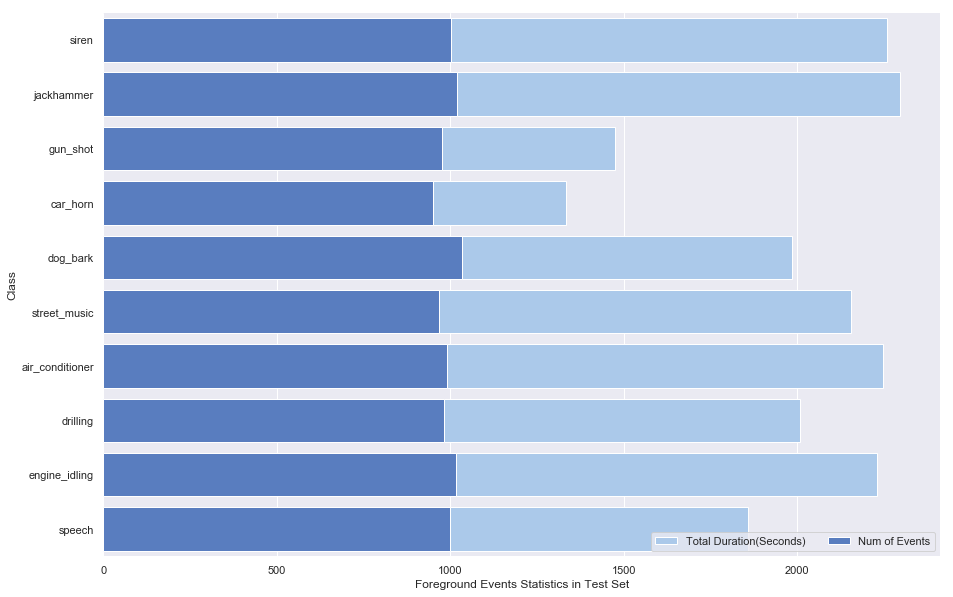

In [221]:
#ax = sns.countplot(x="Events_TotalDuration", hue="Num_Events", data=new_pdFrame)
sns.set(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total durations
sns.set_color_codes("pastel")
sns.barplot(x="Events_TotalDuration", y="Class", data=new_pdFrame,
            label="Total Duration(Seconds)", color="b")

# Plot the num of clips of each class
sns.set_color_codes("muted")
sns.barplot(x="Num_Events", y="Class", data=new_pdFrame,
            label="Num of Events", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Foreground Events Statistics in Test Set")
sns.despine(left=True, bottom=True)

plt.savefig('soundscape_statistic_testset.png',dpi = 1000)